In [ ]:
P# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Importing necessary libraries

In [ ]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
 
# Numerical libraries
import numpy as np   
 
# Importing Linear Regression ML library
from sklearn.linear_model import LinearRegression

# Importing KMeans Clustering ML Library
from sklearn.cluster import KMeans
 
# to handle data in form of rows and columns 
import pandas as pd    
 
# importing ploting libraries
import matplotlib.pyplot as plt   
 
#importing seaborn for statistical plots
import seaborn as sns

# Importing the data

In [ ]:
# Loading data from Datasets stored in Excel sheets
capstone_df = pd.read_excel('/content/drive/My Drive/Returns Data.xlsx', index_col='Date')
nifty_df = pd.read_excel('/content/drive/My Drive/NIFTY50.xlsx', index_col='Date')

In [ ]:
# Verifying Data
capstone_df.head()

AUTO_TR_OPEN  ...  Crude_12 months momentum
Date                      ...                          
2020-04-16   6635.130908  ...                  0.345409
2020-04-15   6917.457869  ...                  0.386317
2020-04-13   6991.502966  ...                  0.392865
2020-04-09   6496.130559  ...                  0.426402
2020-04-08   6083.470236  ...                  0.410538

[5 rows x 621 columns]

In [ ]:
# Removing Price Return columns
for col in capstone_df.columns:
  if 'PR' in col:
    capstone_df.drop(columns=col, axis=1, inplace=True)

capstone_df.head()

AUTO_TR_OPEN  ...  Crude_12 months momentum
Date                      ...                          
2020-04-16   6635.130908  ...                  0.345409
2020-04-15   6917.457869  ...                  0.386317
2020-04-13   6991.502966  ...                  0.392865
2020-04-09   6496.130559  ...                  0.426402
2020-04-08   6083.470236  ...                  0.410538

[5 rows x 533 columns]

In [ ]:
# Statistical summary of Data
capstone_df.describe(include='all')

AUTO_TR_OPEN  ...  Crude_12 months momentum
count   2111.000000  ...               3336.000000
mean    9140.073374  ...                  1.072792
std     3039.817664  ...                  0.337676
min     3824.246227  ...                  0.345409
25%     5993.088606  ...                  0.852819
50%     9822.726447  ...                  1.063114
75%    11281.759660  ...                  1.260501
max    14676.917140  ...                  2.214017

[8 rows x 533 columns]

In [ ]:
# Checking info about Data
capstone_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5047 entries, 2020-04-16 to 2000-01-01
Columns: 533 entries, AUTO_TR_OPEN to Crude_12 months momentum
dtypes: float64(532), int64(1)
memory usage: 20.6 MB


In [ ]:
# Removing METAL Index as it has data only from 12-Jul-2013 which is not sufficient for our purpose. Removing also BANK Index as we have inidividual indices representing Public Sector Undertaking Banks & Private Banks
for col in capstone_df.columns:
  if 'METAL' in col or 'BANK' in col:
    capstone_df.drop(columns=col, axis=1, inplace=True)

capstone_df.head()

AUTO_TR_OPEN  ...  Crude_12 months momentum
Date                      ...                          
2020-04-16   6635.130908  ...                  0.345409
2020-04-15   6917.457869  ...                  0.386317
2020-04-13   6991.502966  ...                  0.392865
2020-04-09   6496.130559  ...                  0.426402
2020-04-08   6083.470236  ...                  0.410538

[5 rows x 479 columns]

In [ ]:
# Statistical summary of new Data
capstone_df.describe(include='all')

AUTO_TR_OPEN  ...  Crude_12 months momentum
count   2111.000000  ...               3336.000000
mean    9140.073374  ...                  1.072792
std     3039.817664  ...                  0.337676
min     3824.246227  ...                  0.345409
25%     5993.088606  ...                  0.852819
50%     9822.726447  ...                  1.063114
75%    11281.759660  ...                  1.260501
max    14676.917140  ...                  2.214017

[8 rows x 479 columns]

In [ ]:
# Since, we have data for all indices from 03-Jan-2011, let's remove data before that
# In the Final Report submission, since we worked on individual Indices, we could use data older than 03-Jan-2011 if available which we had decided to take as the starting point in the Interim Report. Hence, commenting out below line of code
#capstone_df = capstone_df[:'2011-01-03']

In [ ]:
# Let's check if there are any missing values in Closing price data of any Indices
for col in capstone_df.columns:
  if 'CLOSE' in col:
    print(col, capstone_df[col].count())

AUTO_TR_CLOSE 4043
CD_TR_CLOSE 3728
FINSERV_TR_CLOSE 4043
FMCG_TR_CLOSE 5046
IT_TR_CLOSE 5046
MEDIA_TR_CLOSE 3539
OILGAS_TR_CLOSE 3728
PHARMA_TR_CLOSE 4796
PVTB_TR_CLOSE 3728
PSUB_TR_CLOSE 4043
REALTY_TR_CLOSE 3289
COMPGSEC_CLOSE 2298
GSEC_4_8_YR_CLOSE 2298
GSEC_8_13_YR_CLOSE 2298
Currencies_USDINR_CLOSE 5047
Currencies_EURINR_CLOSE 5047
Currencies_JPYINR_CLOSE 5047
Currencies_GBPINR_CLOSE 5047
Gold_CLOSE 5047
Crude_CLOSE 5047


In [ ]:
# Checking count of SHARES_TRADED & TURNOVER columns for Equity Indices
for col in capstone_df.columns:
  if 'SHARES_TRADED' in col or 'TURNOVER' in col:
    print(col,capstone_df[col].count())

AUTO_SHARES_TRADED 2158
AUTO_TURNOVER 2158
FINSERV_SHARES_TRADED 2114
FINSERV_TURNOVER 2114
FMCG_SHARES_TRADED 3657
FMCG_TURNOVER 3657
IT_SHARES_TRADED 5036
IT_TURNOVER 5036
MEDIA_SHARES_TRADED 2152
MEDIA_TURNOVER 2152
PHARMA_SHARES_TRADED 3656
PHARMA_TURNOVER 3656
PVTB_SHARES_TRADED 1043
PVTB_TURNOVER 1043
PSUB_SHARES_TRADED 3646
PSUB_TURNOVER 3646
REALTY_SHARES_TRADED 3277
REALTY_TURNOVER 3277


In [ ]:
#There are very less number of values available for PVTB_SHARES_TRADED & PVTB_TURNOVER. So, we will remove those columns
capstone_df.drop(columns=['PVTB_SHARES_TRADED','PVTB_TURNOVER'], axis=1, inplace=True)

capstone_df.head()

AUTO_TR_OPEN  ...  Crude_12 months momentum
Date                      ...                          
2020-04-16   6635.130908  ...                  0.345409
2020-04-15   6917.457869  ...                  0.386317
2020-04-13   6991.502966  ...                  0.392865
2020-04-09   6496.130559  ...                  0.426402
2020-04-08   6083.470236  ...                  0.410538

[5 rows x 477 columns]

In [ ]:
# Since, we have missing value for Y column for 16-Apr-2020 & missing values for Daily Log Returns & 52-week Low High range for COMPGSEC & other Debt indices, we will drop them off & create another DataFrame for basic models
temp_df = capstone_df['2020-04-15':'2011-01-04']

In [ ]:
# Let's try to impute missing values for other SHARES_TRADED & TURNOVER columns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

scaler = StandardScaler()
temp_df = scaler.fit_transform(temp_df)
imputer = KNNImputer(n_neighbors=5)
temp_df = imputer.fit_transform(temp_df)
temp_df = scaler.inverse_transform(temp_df)

In [ ]:
# Filling up missing data with Imputed values
capstone_df['2020-04-15':'2011-01-04'] = temp_df

In [ ]:
# Checking the SHARES_TRADED & TURNOVER counts after missing value imputation
for col in capstone_df.columns:
  if 'SHARES_TRADED' in col or 'TURNOVER' in col:
    print(col,capstone_df[col].count())

AUTO_SHARES_TRADED 2297
AUTO_TURNOVER 2297
FINSERV_SHARES_TRADED 2297
FINSERV_TURNOVER 2297
FMCG_SHARES_TRADED 3667
FMCG_TURNOVER 3667
IT_SHARES_TRADED 5046
IT_TURNOVER 5046
MEDIA_SHARES_TRADED 2297
MEDIA_TURNOVER 2297
PHARMA_SHARES_TRADED 3666
PHARMA_TURNOVER 3666
PSUB_SHARES_TRADED 3656
PSUB_TURNOVER 3656
REALTY_SHARES_TRADED 3287
REALTY_TURNOVER 3287


# Correlations

In [ ]:
# Extracting Log Returns columns for Correlation
data_df = capstone_df[['AUTO_TR_DAILY_LOG_RETURNS',
                       'CD_TR_DAILY_LOG_RETURNS',
                       'FINSERV_TR_DAILY_LOG_RETURNS',
                       'FMCG_TR_DAILY_LOG_RETURNS',
                       'IT_TR_DAILY_LOG_RETURNS',
                       'MEDIA_TR_DAILY_LOG_RETURNS',
                       'OILGAS_TR_DAILY_LOG_RETURNS',
                       'PHARMA_TR_DAILY_LOG_RETURNS',
                       'PVTB_TR_DAILY_LOG_RETURNS',
                       'PSUB_TR_DAILY_LOG_RETURNS',
                       'REALTY_TR_DAILY_LOG_RETURNS',
                       'COMPGSEC_DAILY_LOG_RETURNS',
                       'GSEC_4_8_YR_DAILY_LOG_RETURNS',
                       'GSEC_8_13_YR_DAILY_LOG_RETURNS',
                       'Currencies_USDINR_DAILY_LOG_RETURNS',
                       'Currencies_EURINR_DAILY_LOG_RETURNS',
                       'Currencies_JPYINR_DAILY_LOG_RETURNS',
                       'Currencies_GBPINR_DAILY_LOG_RETURNS',
                       'Gold_DAILY_LOG_RETURNS',
                       'Crude_DAILY_LOG_RETURNS']]

In [ ]:
# Renaming columns for better visual representation
data_df.rename(columns={'AUTO_TR_DAILY_LOG_RETURNS':'Auto',
                          'CD_TR_DAILY_LOG_RETURNS':'Cons Disc',
                          'FINSERV_TR_DAILY_LOG_RETURNS':'Finserv',
                          'FMCG_TR_DAILY_LOG_RETURNS':'FMCG',
                          'IT_TR_DAILY_LOG_RETURNS':'IT',
                          'MEDIA_TR_DAILY_LOG_RETURNS':'Media',
                          'OILGAS_TR_DAILY_LOG_RETURNS':'Oil & Gas',
                          'PHARMA_TR_DAILY_LOG_RETURNS':'Pharma',
                          'PVTB_TR_DAILY_LOG_RETURNS':'PVTB',
                          'PSUB_TR_DAILY_LOG_RETURNS':'PSUB',
                          'REALTY_TR_DAILY_LOG_RETURNS':'Realty',
                          'COMPGSEC_DAILY_LOG_RETURNS':'COMPGSEC',
                          'GSEC_4_8_YR_DAILY_LOG_RETURNS':'GSEC 4-8 Yr',
                          'GSEC_8_13_YR_DAILY_LOG_RETURNS':'GSEC 8-13 Yr',
                          'Currencies_USDINR_DAILY_LOG_RETURNS':'USDINR',
                          'Currencies_EURINR_DAILY_LOG_RETURNS':'EURINR',
                          'Currencies_JPYINR_DAILY_LOG_RETURNS':'JPYINR',
                          'Currencies_GBPINR_DAILY_LOG_RETURNS':'GBPINR',
                          'Gold_DAILY_LOG_RETURNS':'Gold',
                          'Crude_DAILY_LOG_RETURNS':'Crude'}, 
                 inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Checking the dataset for Correlation
data_df.head()

Auto  Cons Disc   Finserv  ...    GBPINR      Gold     Crude
Date                                       ...                              
2020-04-16  0.011402   0.010806  0.016453  ...  0.003672  0.006960 -0.121003
2020-04-15 -0.018407  -0.001330 -0.027891  ...  0.003270  0.024570 -0.016807
2020-04-13 -0.024791  -0.034012 -0.031326  ...  0.008002  0.035438 -0.092694
2020-04-09  0.098994   0.054681  0.058772  ...  0.007258  0.026186  0.063247
2020-04-08  0.018418  -0.002524 -0.003763  ...  0.006976  0.007223 -0.098754

[5 rows x 20 columns]

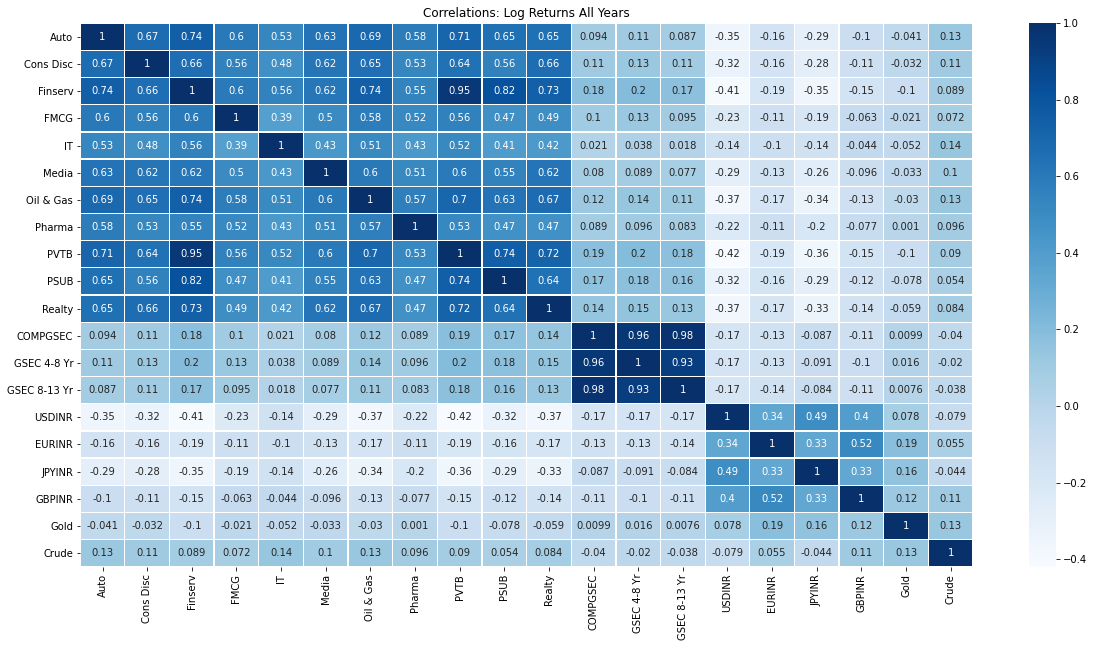

In [ ]:
# Plotting Correlation heatmap for All Years
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns All Years", fontsize =12)
sns.heatmap(data_df.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Merging Nifty 50 Data to performance of each Indices as compared to Nifty 50
all_df = capstone_df.merge(nifty_df, how='left', on='Date', sort=True)
all_df.head()

AUTO_TR_OPEN  ...  NIFTY_50_Y_LOG_RETURNS
Date                      ...                        
2000-01-01           NaN  ...                     NaN
2000-01-03           NaN  ...                     NaN
2000-01-04           NaN  ...                     NaN
2000-01-05           NaN  ...                     NaN
2000-01-06           NaN  ...                     NaN

[5 rows x 481 columns]

In [ ]:
# Extracting only Close columns for each Index
data_df = all_df[['AUTO_TR_CLOSE',
                       'CD_TR_CLOSE',
                       'FINSERV_TR_CLOSE',
                       'FMCG_TR_CLOSE',
                       'IT_TR_CLOSE',
                       'MEDIA_TR_CLOSE',
                       'OILGAS_TR_CLOSE',
                       'PHARMA_TR_CLOSE',
                       'PVTB_TR_CLOSE',
                       'PSUB_TR_CLOSE',
                       'REALTY_TR_CLOSE',
                       'COMPGSEC_CLOSE',
                       'GSEC_4_8_YR_CLOSE',
                       'GSEC_8_13_YR_CLOSE',
                       'Currencies_USDINR_CLOSE',
                       'Currencies_EURINR_CLOSE',
                       'Currencies_JPYINR_CLOSE',
                       'Currencies_GBPINR_CLOSE',
                       'Gold_CLOSE',
                       'Crude_CLOSE',
                  'NIFTY_50_TR']]

In [ ]:
# Resetting base price as 1000 for each Index for Base date of 03-Jan-2011
data_df = data_df.divide(np.array(data_df[data_df.index=='2011-01-03'])) * 1000

In [ ]:
# Checking Close price data as per new Base price of 1000
data_df.head()

AUTO_TR_CLOSE  CD_TR_CLOSE  ...  Crude_CLOSE  NIFTY_50_TR
Date                                    ...                          
2000-01-01            NaN          NaN  ...          0.0          NaN
2000-01-03            NaN          NaN  ...          0.0          NaN
2000-01-04            NaN          NaN  ...          0.0          NaN
2000-01-05            NaN          NaN  ...          0.0          NaN
2000-01-06            NaN          NaN  ...          0.0          NaN

[5 rows x 21 columns]

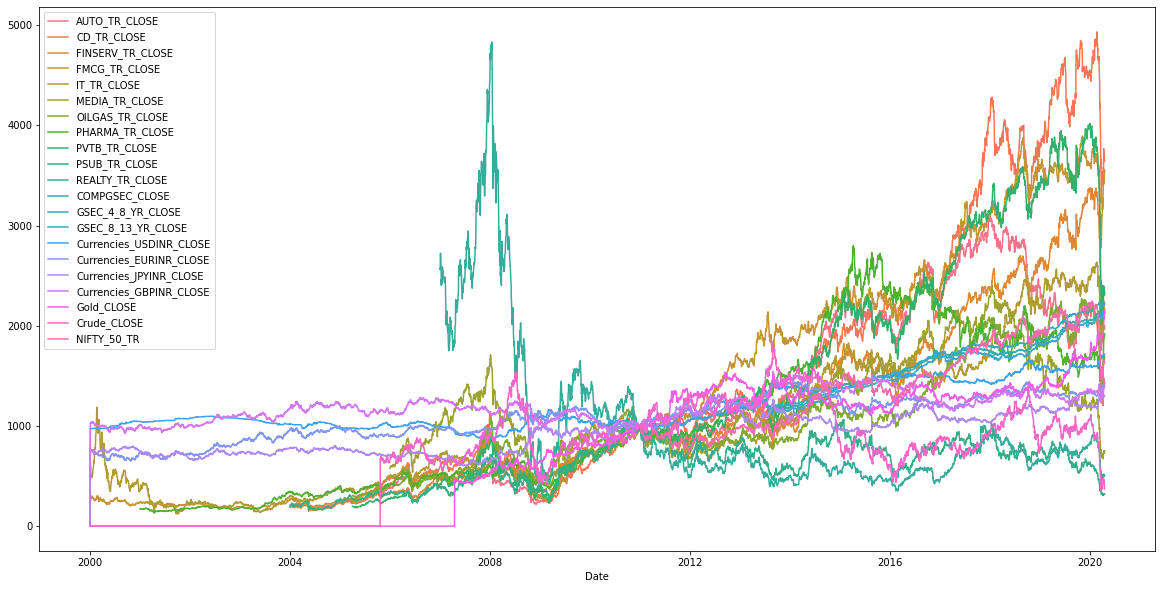

In [ ]:
# Plotting the performance for each Index alongwith Nifty 50 for comparison
plt.figure(figsize=(20,10))
sns.lineplot(data=data_df, dashes=False)

In [ ]:
# Taking Close prices only for the Year 2019
data_df_2019 = data_df.loc['2019']

In [ ]:
# Verifying data
data_df_2019.head()

AUTO_TR_CLOSE  CD_TR_CLOSE  ...  Crude_CLOSE  NIFTY_50_TR
Date                                    ...                          
2019-01-01    2380.052896  3828.141958  ...   773.870574  1956.036447
2019-01-02    2307.537735  3811.527555  ...   773.870574  1934.950196
2019-01-03    2272.461125  3793.905385  ...   791.208791  1913.392888
2019-01-04    2283.352647  3782.877463  ...   809.035409  1923.268252
2019-01-07    2286.109299  3828.051934  ...   818.315018  1931.237391

[5 rows x 21 columns]

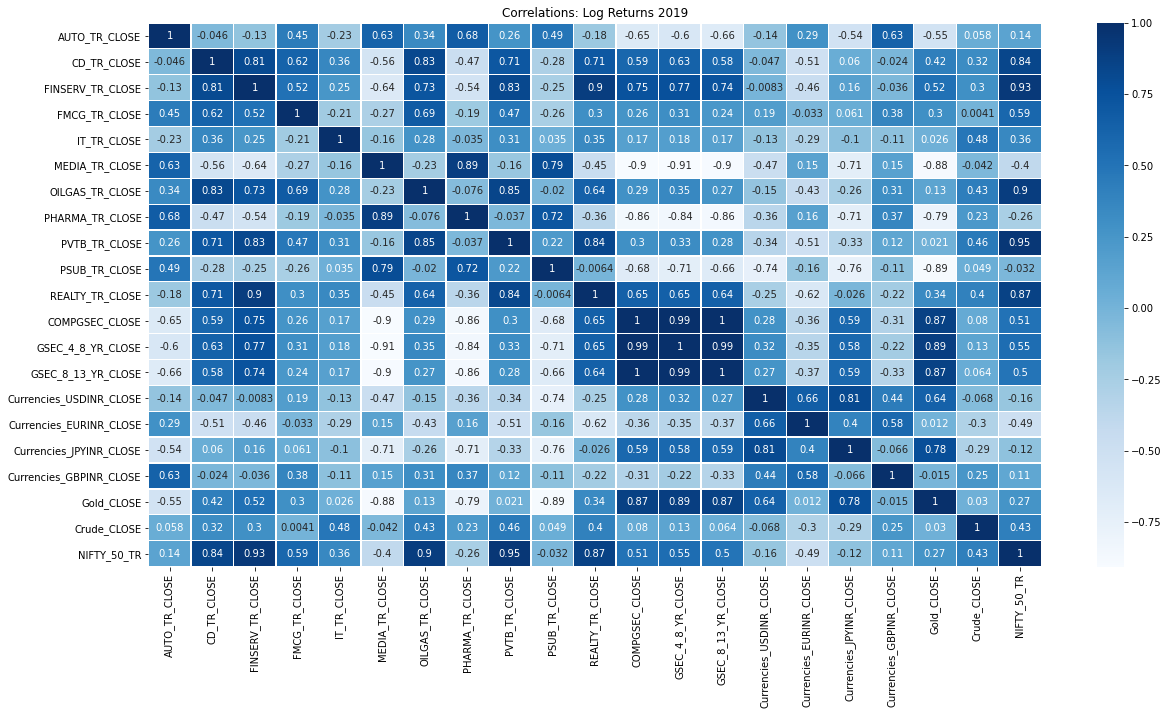

In [ ]:
# Plotting Correaltion heatmap for 2019
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns 2019", fontsize =12)
sns.heatmap(data_df_2019.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Taking Close prices only for the Year 2018
data_df_2018 = data_df.loc['2018']

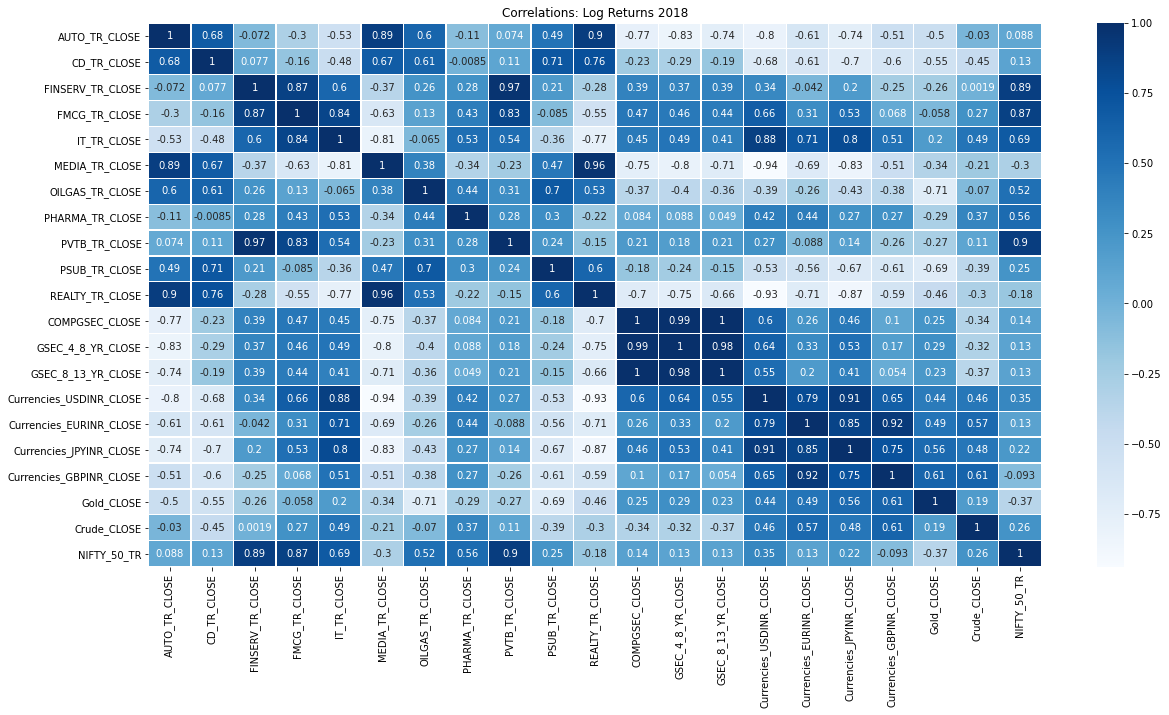

In [ ]:
# Plotting Correaltion heatmap for 2018
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns 2018", fontsize =12)
sns.heatmap(data_df_2018.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Taking Close prices only for the Year 2017
data_df_2017 = data_df.loc['2017']

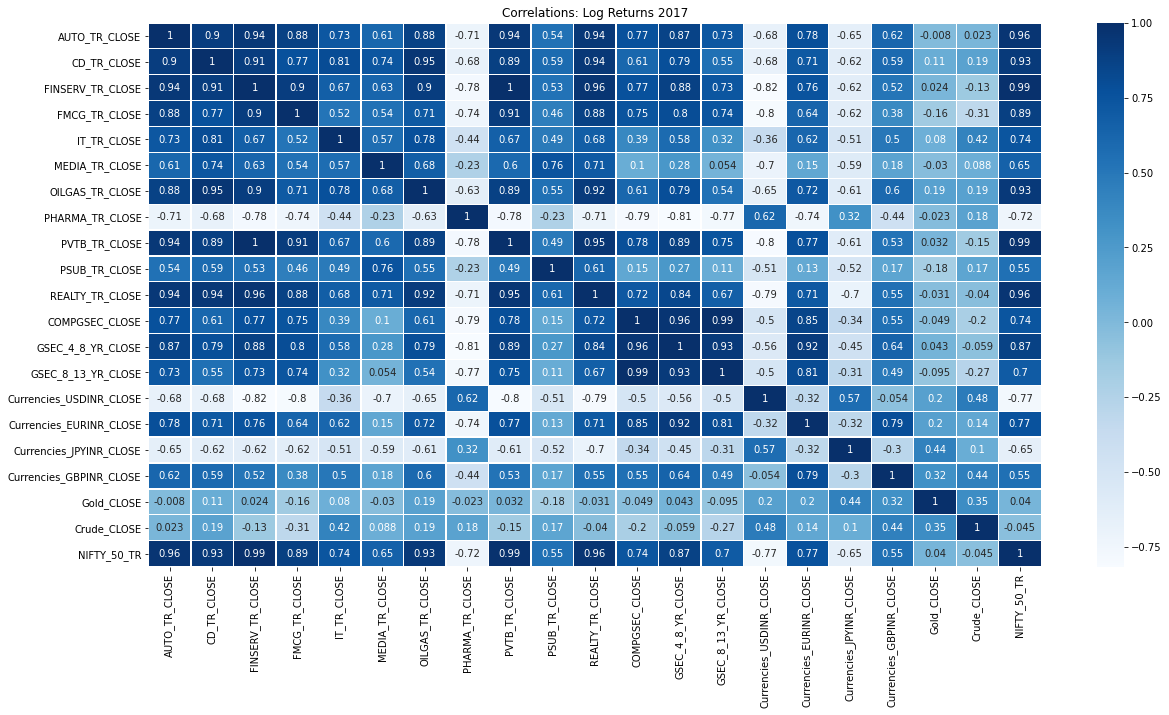

In [ ]:
# Plotting Correaltion heatmap for 2017
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns 2017", fontsize =12)
sns.heatmap(data_df_2017.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Taking Close prices only for the Year 2016
data_df_2016 = data_df.loc['2016']

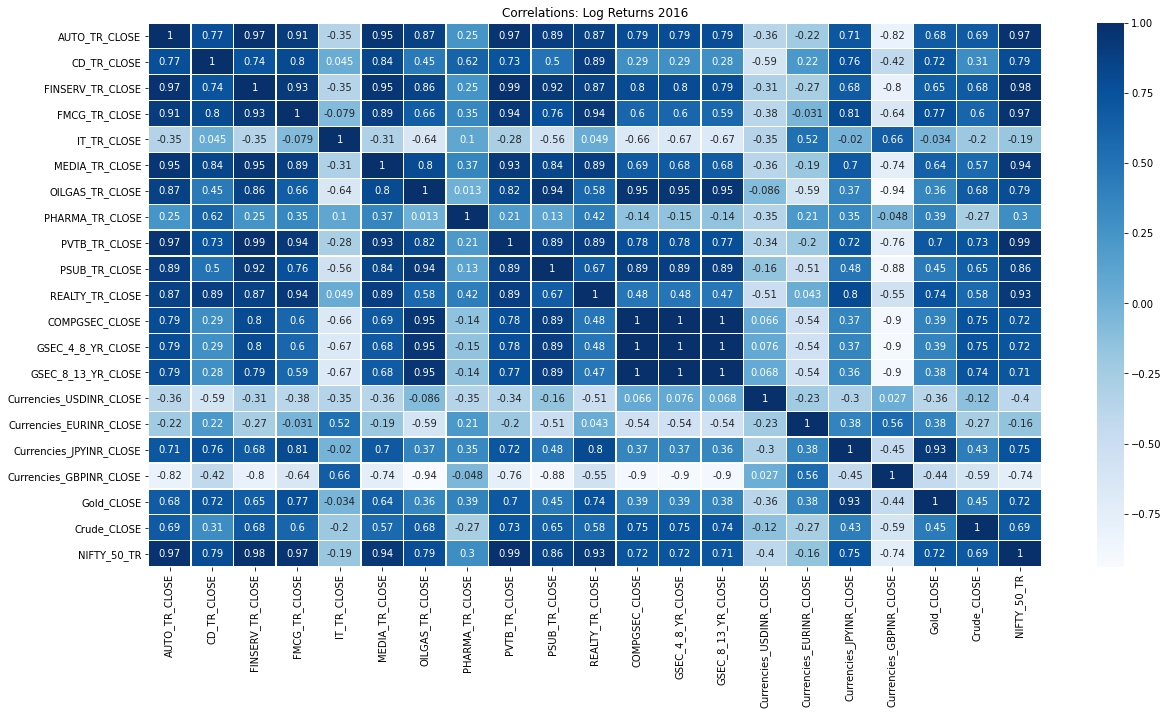

In [ ]:
# Plotting Correaltion heatmap for 2016
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns 2016", fontsize =12)
sns.heatmap(data_df_2016.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Taking Close prices only for the Year 2015
data_df_2015 = data_df.loc['2015']

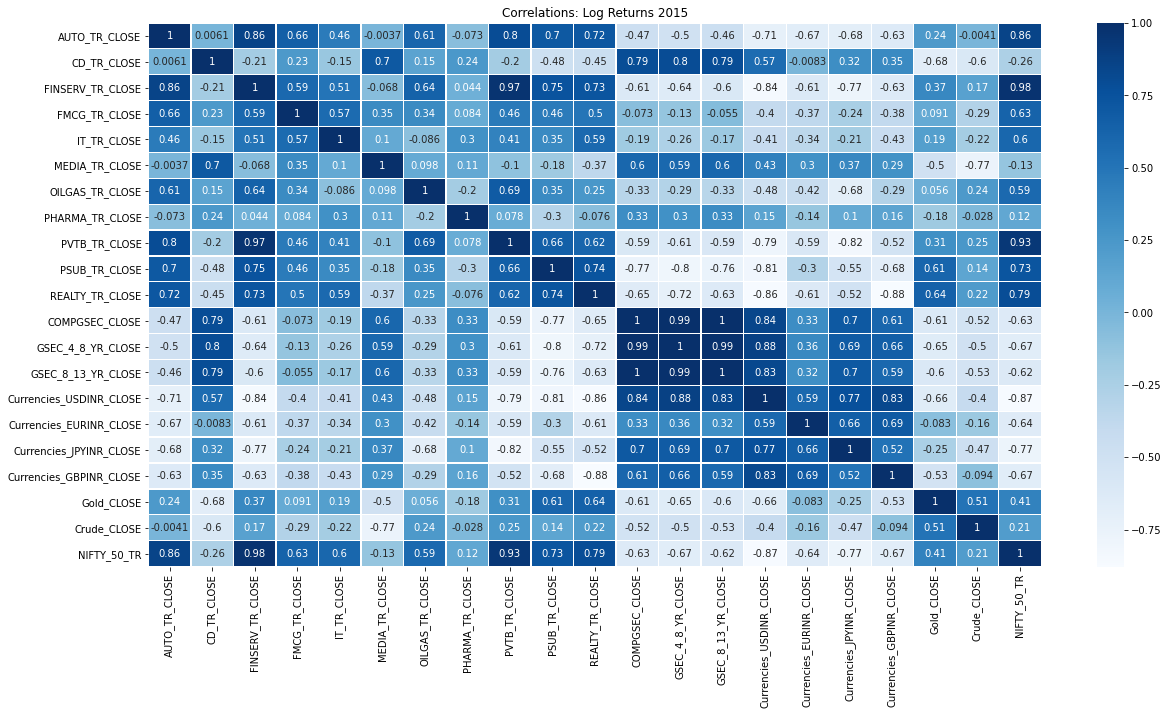

In [ ]:
# Plotting Correaltion heatmap for 2015
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns 2015", fontsize =12)
sns.heatmap(data_df_2015.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Taking Close prices only for the Year 2014
data_df_2014 = data_df.loc['2014']

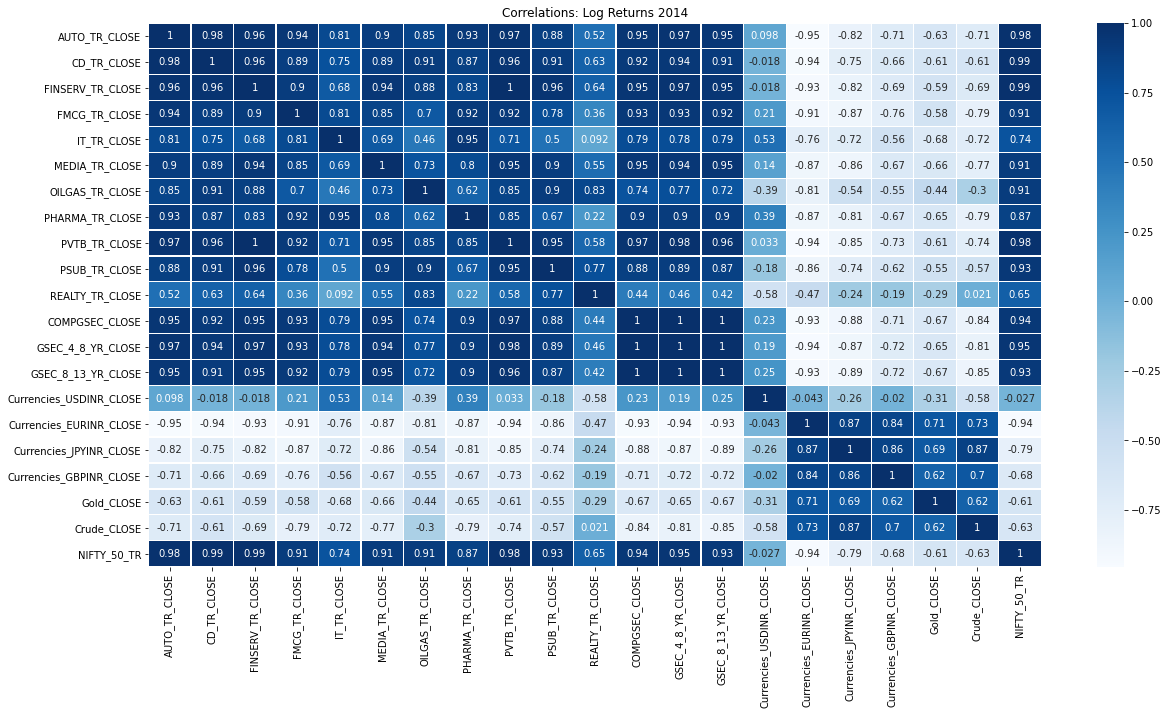

In [ ]:
# Plotting Correaltion heatmap for 2014
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns 2014", fontsize =12)
sns.heatmap(data_df_2014.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Taking Close prices only for the Year 2013
data_df_2013 = data_df.loc['2013']

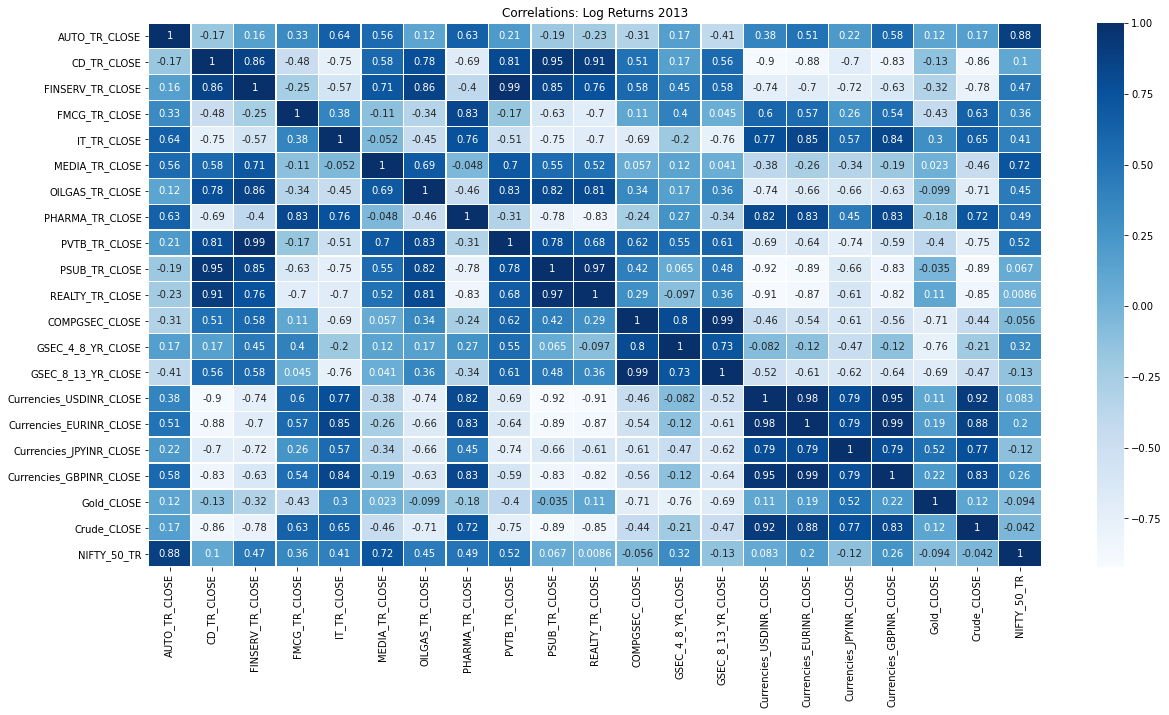

In [ ]:
# Plotting Correaltion heatmap for 2013
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns 2013", fontsize =12)
sns.heatmap(data_df_2013.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Taking Close prices only for the Year 2012
data_df_2012 = data_df.loc['2012']

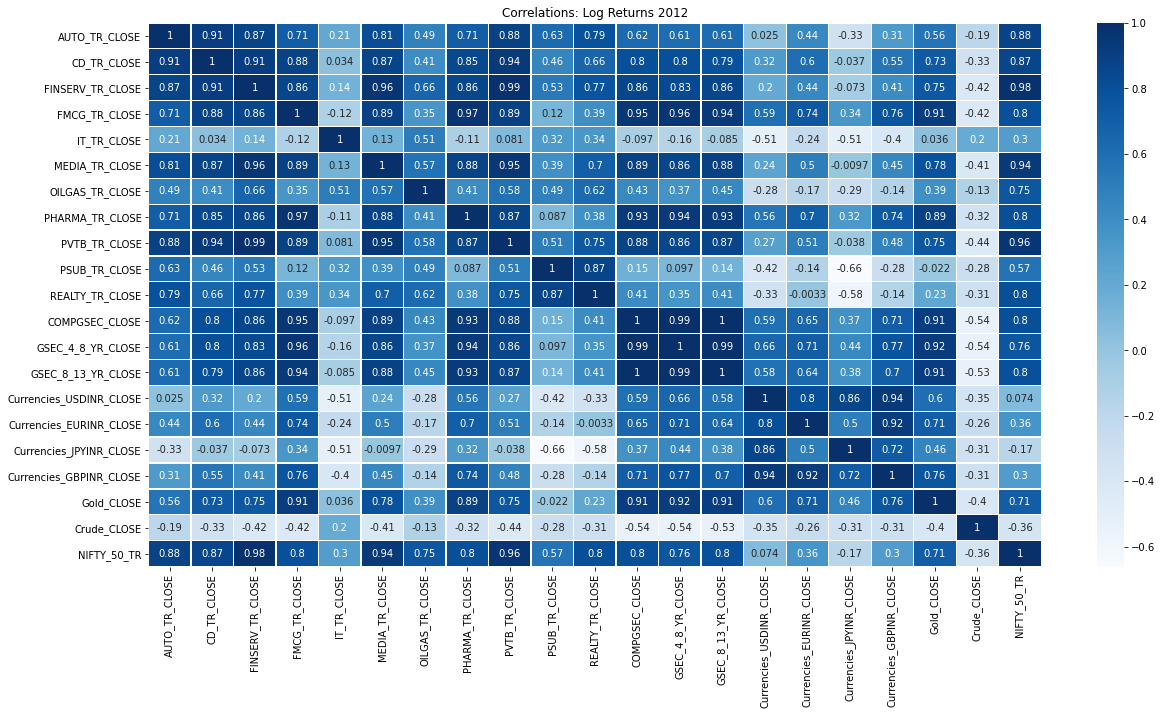

In [ ]:
# Plotting Correaltion heatmap for 2012
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns 2012", fontsize =12)
sns.heatmap(data_df_2012.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Taking Close prices only for the Year 2011
data_df_2011 = data_df.loc['2011']

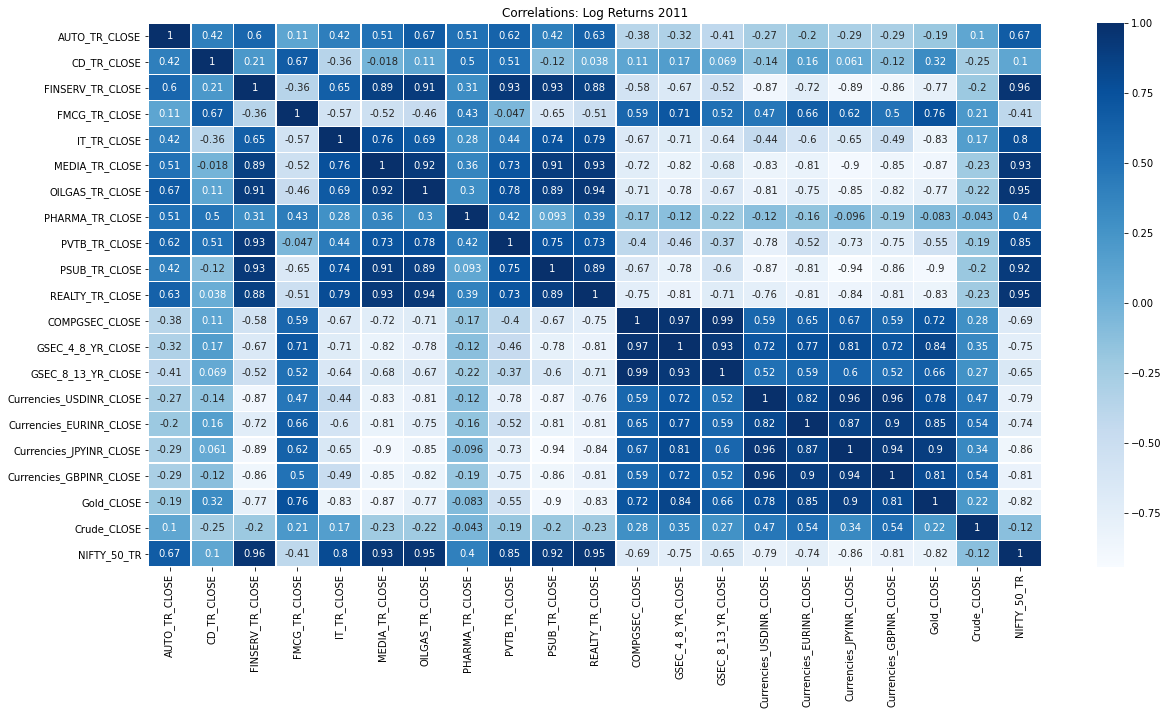

In [ ]:
# Plotting Correaltion heatmap for 2011
plt.figure(figsize=(20,10))
plt.title("Correlations: Log Returns 2011", fontsize =12)
sns.heatmap(data_df_2011.corr(), annot = True, linewidth = 0.3, cmap='Blues')

In [ ]:
# Taking copy of original data so that original data is not modified
svm_df=all_df.copy()

In [ ]:
# Checking new data
svm_df.head()

AUTO_TR_OPEN  ...  NIFTY_50_Y_LOG_RETURNS
Date                      ...                        
2000-01-01           NaN  ...                     NaN
2000-01-03           NaN  ...                     NaN
2000-01-04           NaN  ...                     NaN
2000-01-05           NaN  ...                     NaN
2000-01-06           NaN  ...                     NaN

[5 rows x 481 columns]

In [ ]:
# Removing OPEN, HIGH (& HIGH_ADJ), LOW (& LOW_ADJ), CLOSE & DAILY_RETURNS columns
for col in svm_df.columns:
   if 'OPEN' in col or 'HIGH' in col or 'LOW' in col or 'CLOSE' in col or 'DAILY_RETURNS' in col:
    svm_df.drop(columns=col, axis=1, inplace=True)

svm_df.head()

AUTO_TR_DAILY_LOG_RETURNS  ...  NIFTY_50_Y_LOG_RETURNS
Date                                   ...                        
2000-01-01                        NaN  ...                     NaN
2000-01-03                        NaN  ...                     NaN
2000-01-04                        NaN  ...                     NaN
2000-01-05                        NaN  ...                     NaN
2000-01-06                        NaN  ...                     NaN

[5 rows x 380 columns]

In [ ]:
# Splitting Data for training & testing
train_df = svm_df['2011-01-04':'2018-12-31']
test_df = svm_df['2019-01-01':'2020-04-15']

In [ ]:
# Verifying Training data
train_df

AUTO_TR_DAILY_LOG_RETURNS  ...  NIFTY_50_Y_LOG_RETURNS
Date                                   ...                        
2011-01-04                  -0.006214  ...               -0.010891
2011-01-05                  -0.019987  ...               -0.005200
2011-01-06                  -0.014191  ...               -0.024040
2011-01-07                  -0.033288  ...               -0.024299
2011-01-10                  -0.023542  ...               -0.001519
...                               ...  ...                     ...
2018-12-24                  -0.014073  ...                0.006199
2018-12-26                   0.002196  ...                0.004646
2018-12-27                  -0.004662  ...                0.007684
2018-12-28                   0.004315  ...                0.000242
2018-12-31                   0.001275  ...                0.004371

[1980 rows x 380 columns]

In [ ]:
# Verifying Testing data
test_df

AUTO_TR_DAILY_LOG_RETURNS  ...  NIFTY_50_Y_LOG_RETURNS
Date                                   ...                        
2019-01-01                  -0.005770  ...               -0.010839
2019-01-02                  -0.030942  ...               -0.011204
2019-01-03                  -0.015318  ...                0.005148
2019-01-04                   0.004781  ...                0.004135
2019-01-07                   0.001207  ...                0.002815
...                               ...  ...                     ...
2020-04-07                   0.091688  ...               -0.004954
2020-04-08                   0.018418  ...                0.040671
2020-04-09                   0.098994  ...               -0.013044
2020-04-13                  -0.024791  ...               -0.007646
2020-04-15                  -0.018407  ...                0.007530

[316 rows x 380 columns]

In [ ]:
# Splitting data into Features & Target variable for training data
X_train = train_df.copy()
y_train = train_df.copy()
for col in train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying X_train data
X_train

AUTO_TR_DAILY_LOG_RETURNS  ...  NIFTY_50_TR_DAILY_LOG_RETURNS
Date                                   ...                               
2011-01-04                  -0.006214  ...                      -0.001825
2011-01-05                  -0.019987  ...                      -0.010891
2011-01-06                  -0.014191  ...                      -0.005200
2011-01-07                  -0.033288  ...                      -0.024040
2011-01-10                  -0.023542  ...                      -0.024299
...                               ...  ...                            ...
2018-12-24                  -0.014073  ...                      -0.008447
2018-12-26                   0.002196  ...                       0.006199
2018-12-27                  -0.004662  ...                       0.004646
2018-12-28                   0.004315  ...                       0.007684
2018-12-31                   0.001275  ...                       0.000242

[1980 rows x 359 columns]

In [ ]:
# Verifying y_train data
y_train

AUTO_Y_LOG_RETURNS  ...  NIFTY_50_Y_LOG_RETURNS
Date                            ...                        
2011-01-04           -0.019987  ...               -0.010891
2011-01-05           -0.014191  ...               -0.005200
2011-01-06           -0.033288  ...               -0.024040
2011-01-07           -0.023542  ...               -0.024299
2011-01-10            0.003224  ...               -0.001519
...                        ...  ...                     ...
2018-12-24            0.002196  ...                0.006199
2018-12-26           -0.004662  ...                0.004646
2018-12-27            0.004315  ...                0.007684
2018-12-28            0.001275  ...                0.000242
2018-12-31           -0.005770  ...                0.004371

[1980 rows x 21 columns]

In [ ]:
# Splitting data into Features & Target variable for testing data
X_test = test_df.copy()
y_test = test_df.copy()
for col in test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying X_test data
X_test

AUTO_TR_DAILY_LOG_RETURNS  ...  NIFTY_50_TR_DAILY_LOG_RETURNS
Date                                   ...                               
2019-01-01                  -0.005770  ...                       0.004371
2019-01-02                  -0.030942  ...                      -0.010839
2019-01-03                  -0.015318  ...                      -0.011204
2019-01-04                   0.004781  ...                       0.005148
2019-01-07                   0.001207  ...                       0.004135
...                               ...  ...                            ...
2020-04-07                   0.091688  ...                       0.084000
2020-04-08                   0.018418  ...                      -0.004954
2020-04-09                   0.098994  ...                       0.040671
2020-04-13                  -0.024791  ...                      -0.013044
2020-04-15                  -0.018407  ...                      -0.007646

[316 rows x 359 columns]

In [ ]:
# Verifying y_test data
y_test

AUTO_Y_LOG_RETURNS  ...  NIFTY_50_Y_LOG_RETURNS
Date                            ...                        
2019-01-01           -0.030942  ...               -0.010839
2019-01-02           -0.015318  ...               -0.011204
2019-01-03            0.004781  ...                0.005148
2019-01-04            0.001207  ...                0.004135
2019-01-07            0.004486  ...                0.002815
...                        ...  ...                     ...
2020-04-07            0.018418  ...               -0.004954
2020-04-08            0.098994  ...                0.040671
2020-04-09           -0.024791  ...               -0.013044
2020-04-13           -0.018407  ...               -0.007646
2020-04-15            0.011402  ...                0.007530

[316 rows x 21 columns]

In [ ]:
# Performing Support Vector Regressor, Linear Regression, Random Forest Regressor & Polynomial Feature Regression for each Indices on entire Dataset
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

for i in range(y_train_scaled.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train_scaled[:,i])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test_scaled[:,i], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train_scaled[:,i])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test_scaled[:,i], y_pred))
  
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(X_train_scaled, y_train_scaled[:,i])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest: For", y_train.columns[i], "R square is:", r2_score(y_test_scaled[:,i], y_pred))

  scaler_poly = StandardScaler()
  poly = PolynomialFeatures(2)
  X_train_poly = scaler_poly.fit_transform(poly.fit_transform(X_train))
  X_test_poly = scaler_poly.transform(poly.transform(X_test))
  lr_poly = LinearRegression()
  lr_poly.fit(X_train_poly, y_train_scaled[:,i])
  y_pred = lr_poly.predict(X_test_poly)
  print("Polynomial Regression: For", y_train.columns[i], "R square is:", r2_score(y_test_scaled[:,i], y_pred))

SVM: For AUTO_Y_LOG_RETURNS R square is: -0.07742918139700317
Linear Regression: For AUTO_Y_LOG_RETURNS R square is: -6.578201310023126
Random Forest: For AUTO_Y_LOG_RETURNS R square is: -0.12146816238288127
Polynomial Regression: For AUTO_Y_LOG_RETURNS R square is: -37.76549266981309
SVM: For CD_Y_LOG_RETURNS R square is: -0.07797210406515576
Linear Regression: For CD_Y_LOG_RETURNS R square is: -17.3264119845872
Random Forest: For CD_Y_LOG_RETURNS R square is: -0.07687048559860421
Polynomial Regression: For CD_Y_LOG_RETURNS R square is: -36.5139446218621
SVM: For FINSERV_Y_LOG_RETURNS R square is: -0.041826500885252305
Linear Regression: For FINSERV_Y_LOG_RETURNS R square is: -5.933226117289845
Random Forest: For FINSERV_Y_LOG_RETURNS R square is: -0.1504697175623677
Polynomial Regression: For FINSERV_Y_LOG_RETURNS R square is: -29.380561707807356
SVM: For FMCG_Y_LOG_RETURNS R square is: -0.0793752616366008
Linear Regression: For FMCG_Y_LOG_RETURNS R square is: -21.108912836272367
Ran

# CLUSTERING

## 1. KMEANS

### Creating a dataframe with log returns of the various financial assets

In [ ]:
# Extracting Log Returns for all Indices into new DataFrame
kmeans_df = all_df[['AUTO_TR_DAILY_LOG_RETURNS',
                       'CD_TR_DAILY_LOG_RETURNS',
                       'FINSERV_TR_DAILY_LOG_RETURNS',
                       'FMCG_TR_DAILY_LOG_RETURNS',
                       'IT_TR_DAILY_LOG_RETURNS',
                       'MEDIA_TR_DAILY_LOG_RETURNS',
                       'OILGAS_TR_DAILY_LOG_RETURNS',
                       'PHARMA_TR_DAILY_LOG_RETURNS',
                       'PVTB_TR_DAILY_LOG_RETURNS',
                       'PSUB_TR_DAILY_LOG_RETURNS',
                       'REALTY_TR_DAILY_LOG_RETURNS',
                       'COMPGSEC_DAILY_LOG_RETURNS',
                       'GSEC_4_8_YR_DAILY_LOG_RETURNS',
                       'GSEC_8_13_YR_DAILY_LOG_RETURNS',
                       'Currencies_USDINR_DAILY_LOG_RETURNS',
                       'Currencies_EURINR_DAILY_LOG_RETURNS',
                       'Currencies_JPYINR_DAILY_LOG_RETURNS',
                       'Currencies_GBPINR_DAILY_LOG_RETURNS',
                       'Gold_DAILY_LOG_RETURNS',
                       'Crude_DAILY_LOG_RETURNS']]

### Checking for null values

In [ ]:
# Getting info to check for NULL values
kmeans_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5047 entries, 2000-01-01 to 2020-04-16
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   AUTO_TR_DAILY_LOG_RETURNS            4042 non-null   float64
 1   CD_TR_DAILY_LOG_RETURNS              3727 non-null   float64
 2   FINSERV_TR_DAILY_LOG_RETURNS         4042 non-null   float64
 3   FMCG_TR_DAILY_LOG_RETURNS            5045 non-null   float64
 4   IT_TR_DAILY_LOG_RETURNS              5045 non-null   float64
 5   MEDIA_TR_DAILY_LOG_RETURNS           3538 non-null   float64
 6   OILGAS_TR_DAILY_LOG_RETURNS          3727 non-null   float64
 7   PHARMA_TR_DAILY_LOG_RETURNS          4795 non-null   float64
 8   PVTB_TR_DAILY_LOG_RETURNS            3727 non-null   float64
 9   PSUB_TR_DAILY_LOG_RETURNS            4042 non-null   float64
 10  REALTY_TR_DAILY_LOG_RETURNS          3288 non-null   float64
 11  COMPGSEC_DAI

### Dropping the null values

In [ ]:
# Dropping records before 04-Jan-2011
kmeans_df = kmeans_df['2011-01-04':]

For no. of clusters = 2 , the average silhouette_score is : 0.22846274113678602


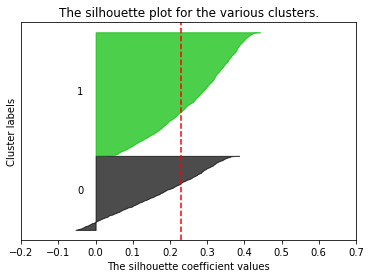

For no. of clusters = 3 , the average silhouette_score is : 0.16126511418438655


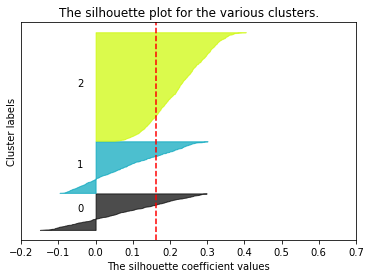

For no. of clusters = 4 , the average silhouette_score is : 0.11258706119714024


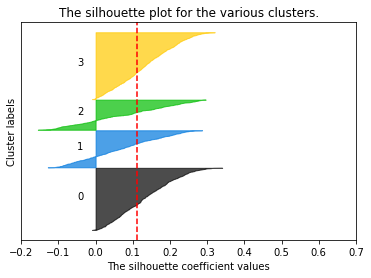

For no. of clusters = 5 , the average silhouette_score is : 0.12551366227464775


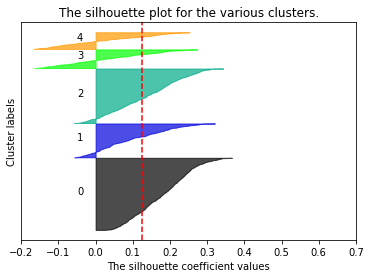

For no. of clusters = 6 , the average silhouette_score is : 0.11124895879075604


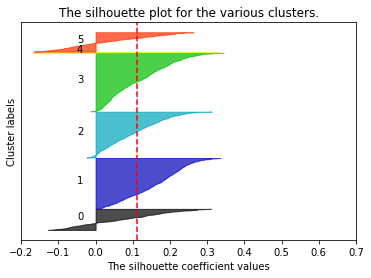

For no. of clusters = 7 , the average silhouette_score is : 0.12378456555281264


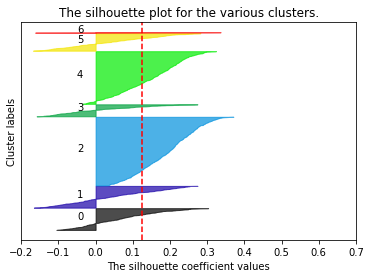

For no. of clusters = 8 , the average silhouette_score is : 0.09409152717679005


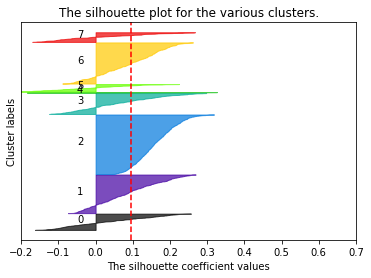

For no. of clusters = 9 , the average silhouette_score is : 0.09260801093104104


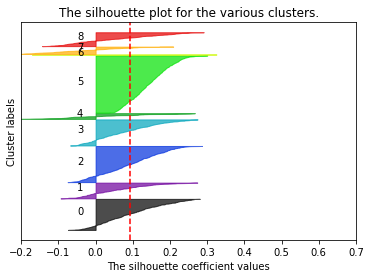

For no. of clusters = 10 , the average silhouette_score is : 0.08307876735274451


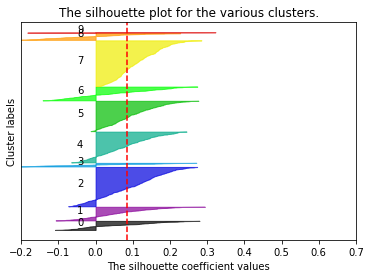

For no. of clusters = 11 , the average silhouette_score is : 0.07518000741760307


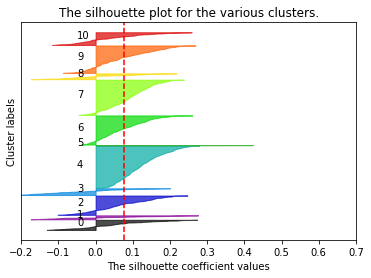

For no. of clusters = 12 , the average silhouette_score is : 0.07459324821260421


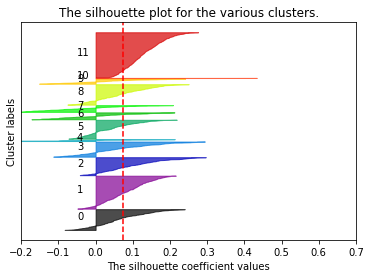

For no. of clusters = 13 , the average silhouette_score is : 0.06712971105815627


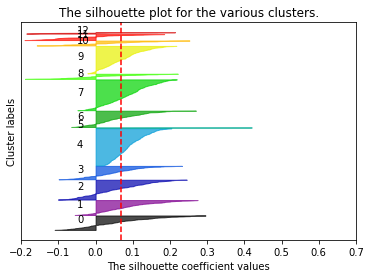

For no. of clusters = 14 , the average silhouette_score is : 0.06561280020278822


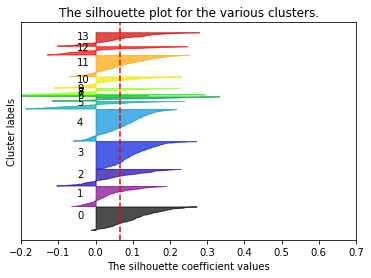

For no. of clusters = 15 , the average silhouette_score is : 0.06106051314912101


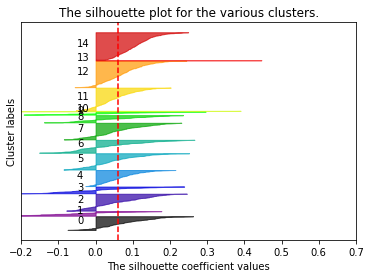

For no. of clusters = 16 , the average silhouette_score is : 0.06923918562259415


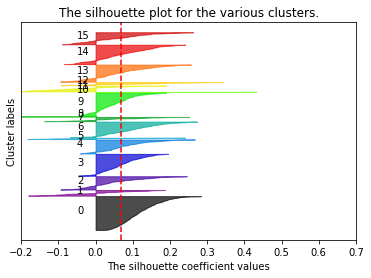

For no. of clusters = 17 , the average silhouette_score is : 0.06292081832356015


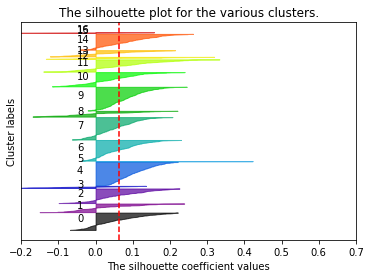

For no. of clusters = 18 , the average silhouette_score is : 0.06420561394218935


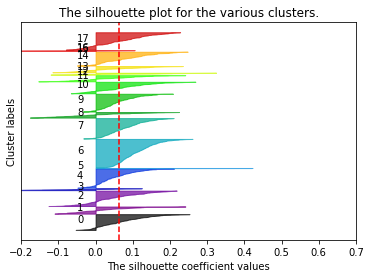

For no. of clusters = 19 , the average silhouette_score is : 0.06847378351623935


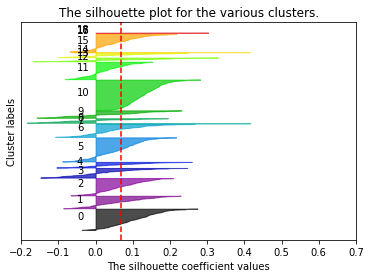

For no. of clusters = 20 , the average silhouette_score is : 0.06628470976154871


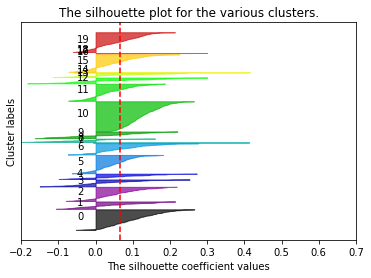

In [ ]:
# Let's try using K-means clustering which is most widely used Unsupervised model to see if there are any clusters

# Importing KMeans submodule from cluster module in sklearn library
from sklearn.cluster import KMeans

# Importing metrics module from sklearn library
from sklearn import metrics

# Importing cm module from matplotlib library for ColorMaps
import matplotlib.cm as cm

# Assigning a dummy arrays Cluster_error & cluster_sil_scores
Cluster_error = []
cluster_sil_scores = []

# Defining cluster range from 1 to 20 though the minimum clusters we should find is 3 as it will help visualize Elbow plot
cluster_range = range(1, 21)

# Fit model KMeans for each value of cluster in the range defined in cluster_range
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state = 5)
    clusters.fit(kmeans_df)
    Cluster_error.append(clusters.inertia_)
    labels = clusters.labels_

    # Silhouette score is meaningless for 1 Cluster
    if num_clusters == 1:
        cluster_sil_scores.append(np.NaN)
        continue
        
    cluster_sil_scores.append(metrics.silhouette_score(kmeans_df, labels, metric='euclidean'))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = metrics.silhouette_score(kmeans_df, labels)
    print("For no. of clusters =", num_clusters, ", the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(kmeans_df, labels)
    
    y_lower = 5
    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 5
    
    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster labels")
    plt.yticks([])
    plt.xlim([-0.2, 0.7])

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # Show the plot for each number of clusters
    plt.show()

# Kmeans Datewise

In [ ]:
# Computing Error for each no. of Clusters
cluster_range = range(2, 8)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(kmeans_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             2        5.922429
1             3        5.296308
2             4        4.913560
3             5        4.611335
4             6        4.348587
5             7        4.156563

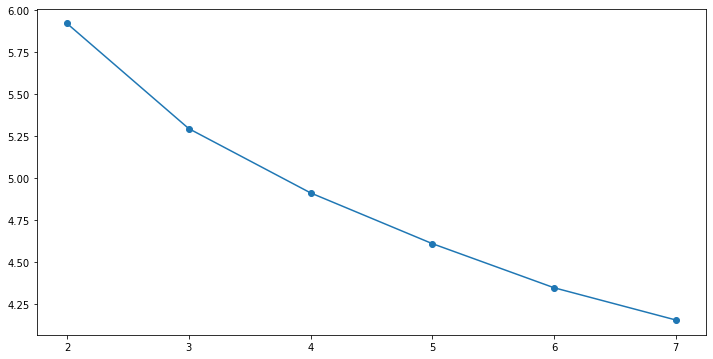

In [ ]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# Forming 2 Clusters
cluster = KMeans( n_clusters = 2, random_state = 2354 )
cluster.fit(kmeans_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [ ]:
# Get Centroids for each Clusters
centroids = cluster.cluster_centers_
centroids

array([[-1.00036168e-02, -8.06837311e-03, -1.10785906e-02,
        -5.10115905e-03, -4.53883398e-03, -1.03509592e-02,
        -8.71200019e-03, -6.23691681e-03, -1.13469628e-02,
        -1.74775229e-02, -1.80048020e-02, -1.20406516e-04,
         5.90411811e-07, -1.43629648e-04,  2.02720607e-03,
         1.48786992e-03,  3.03323984e-03,  1.33795348e-03,
         1.12797503e-03, -9.83344697e-04],
       [ 6.27127630e-03,  5.76394234e-03,  7.20389204e-03,
         3.95095774e-03,  3.20287561e-03,  6.03099317e-03,
         5.60844748e-03,  4.20919969e-03,  7.42235367e-03,
         9.72158205e-03,  1.03614338e-02,  6.00015620e-04,
         5.57558914e-04,  5.98862763e-04, -8.42862795e-04,
        -6.58385657e-04, -1.64100264e-03, -5.76225578e-04,
        -1.43374369e-04, -1.01161058e-04]])

In [ ]:
# Preparing Centroid DataFrame to compare it with Daily Log Returns for each Index
centroid_df = pd.DataFrame(centroids, columns = list(kmeans_df) )
centroid_df

AUTO_TR_DAILY_LOG_RETURNS  ...  Crude_DAILY_LOG_RETURNS
0                  -0.010004  ...                -0.000983
1                   0.006271  ...                -0.000101

[2 rows x 20 columns]

In [ ]:
# Predicting the Group for each Trading Date
prediction=cluster.predict(kmeans_df)
kmeans_df["GROUP"] = prediction

In [ ]:
# Verifying the DataFrame
kmeans_df.head(10)

AUTO_TR_DAILY_LOG_RETURNS  ...  GROUP
Date                                   ...       
2011-01-04                  -0.006214  ...      0
2011-01-05                  -0.019987  ...      0
2011-01-06                  -0.014191  ...      0
2011-01-07                  -0.033288  ...      0
2011-01-10                  -0.023542  ...      0
2011-01-11                   0.003224  ...      0
2011-01-12                   0.021401  ...      1
2011-01-13                  -0.002702  ...      0
2011-01-14                  -0.022758  ...      0
2011-01-17                  -0.002795  ...      0

[10 rows x 21 columns]

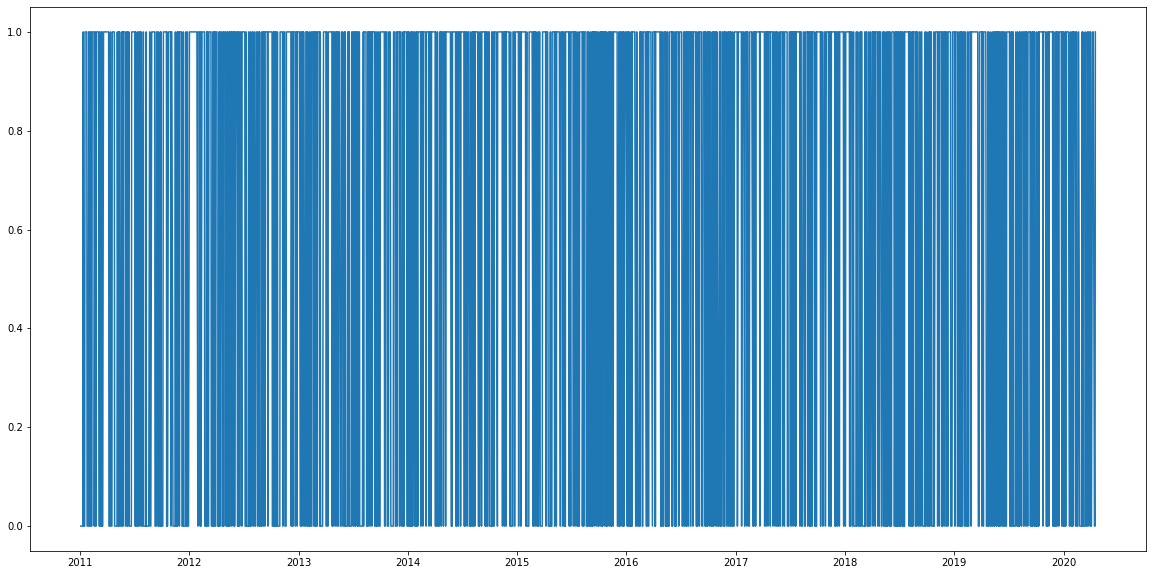

In [ ]:
# Plotting Date vs predicted Group
plt.figure(figsize=(20,10))
sns.lineplot(data=kmeans_df["GROUP"], dashes=False,hue='GROUP')

In [ ]:
# Taking Transpose to perform K-means on Assets
kmeans_T_df = kmeans_df.transpose()
kmeans_T_df.drop(['GROUP'], axis=0)

Date                                 2011-01-04  ...  2020-04-16
AUTO_TR_DAILY_LOG_RETURNS             -0.006214  ...    0.011402
CD_TR_DAILY_LOG_RETURNS               -0.000405  ...    0.010806
FINSERV_TR_DAILY_LOG_RETURNS          -0.018197  ...    0.016453
FMCG_TR_DAILY_LOG_RETURNS              0.014306  ...   -0.005900
IT_TR_DAILY_LOG_RETURNS                0.002646  ...   -0.018994
MEDIA_TR_DAILY_LOG_RETURNS            -0.003347  ...    0.025944
OILGAS_TR_DAILY_LOG_RETURNS            0.006357  ...    0.018263
PHARMA_TR_DAILY_LOG_RETURNS            0.011404  ...    0.017597
PVTB_TR_DAILY_LOG_RETURNS             -0.021062  ...    0.015804
PSUB_TR_DAILY_LOG_RETURNS             -0.024595  ...    0.014189
REALTY_TR_DAILY_LOG_RETURNS           -0.013271  ...    0.007622
COMPGSEC_DAILY_LOG_RETURNS            -0.000930  ...    0.000718
GSEC_4_8_YR_DAILY_LOG_RETURNS          0.001758  ...    0.000913
GSEC_8_13_YR_DAILY_LOG_RETURNS        -0.004570  ...    0.001080
Currencies_USDINR_DAILY_LOG_RETURNS    0.006020  ...    0.004534
Currencies_EURINR_DAILY_LOG_RETURNS    0.011892  ...    0.000609
Currencies_JPYINR_DAILY_LOG_RETURNS    0.002012  ...   -0.001404
Currencies_GBPINR_DAILY_LOG_RETURNS    0.012498  ...    0.003672
Gold_DAILY_LOG_RETURNS                -0.003173  ...    0.006960
Crude_DAILY_LOG_RETURNS               -0.001222  ...   -0.121003

[20 rows x 2297 columns]

In [ ]:
# Verifying DataFrame
kmeans_T_df.head(21)

Date                                 2011-01-04  ...  2020-04-16
AUTO_TR_DAILY_LOG_RETURNS             -0.006214  ...    0.011402
CD_TR_DAILY_LOG_RETURNS               -0.000405  ...    0.010806
FINSERV_TR_DAILY_LOG_RETURNS          -0.018197  ...    0.016453
FMCG_TR_DAILY_LOG_RETURNS              0.014306  ...   -0.005900
IT_TR_DAILY_LOG_RETURNS                0.002646  ...   -0.018994
MEDIA_TR_DAILY_LOG_RETURNS            -0.003347  ...    0.025944
OILGAS_TR_DAILY_LOG_RETURNS            0.006357  ...    0.018263
PHARMA_TR_DAILY_LOG_RETURNS            0.011404  ...    0.017597
PVTB_TR_DAILY_LOG_RETURNS             -0.021062  ...    0.015804
PSUB_TR_DAILY_LOG_RETURNS             -0.024595  ...    0.014189
REALTY_TR_DAILY_LOG_RETURNS           -0.013271  ...    0.007622
COMPGSEC_DAILY_LOG_RETURNS            -0.000930  ...    0.000718
GSEC_4_8_YR_DAILY_LOG_RETURNS          0.001758  ...    0.000913
GSEC_8_13_YR_DAILY_LOG_RETURNS        -0.004570  ...    0.001080
Currencies_USDINR_DAILY_LOG_RETURNS    0.006020  ...    0.004534
Currencies_EURINR_DAILY_LOG_RETURNS    0.011892  ...    0.000609
Currencies_JPYINR_DAILY_LOG_RETURNS    0.002012  ...   -0.001404
Currencies_GBPINR_DAILY_LOG_RETURNS    0.012498  ...    0.003672
Gold_DAILY_LOG_RETURNS                -0.003173  ...    0.006960
Crude_DAILY_LOG_RETURNS               -0.001222  ...   -0.121003
GROUP                                  0.000000  ...    1.000000

[21 rows x 2297 columns]

For no. of clusters = 2 , the average silhouette_score is : 0.9335306187731541


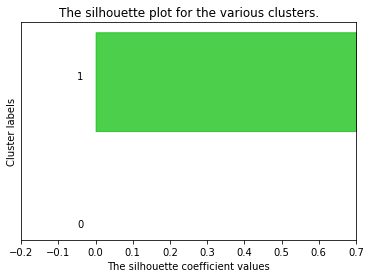

For no. of clusters = 3 , the average silhouette_score is : 0.2456970053988157


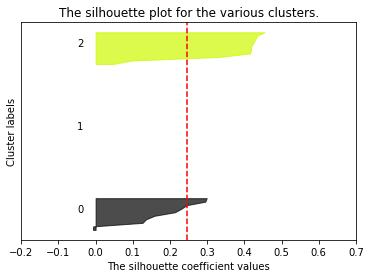

For no. of clusters = 4 , the average silhouette_score is : 0.2623794593702391


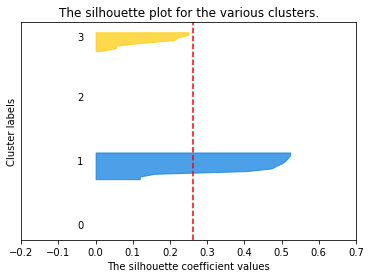

For no. of clusters = 5 , the average silhouette_score is : 0.24325392300901014


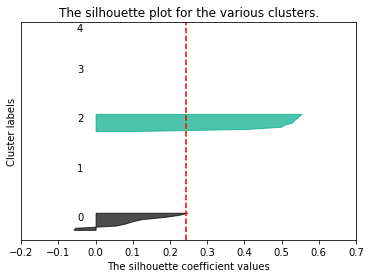

For no. of clusters = 6 , the average silhouette_score is : 0.24148696849812912


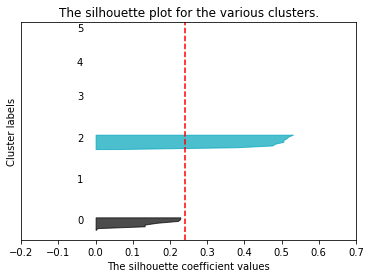

For no. of clusters = 7 , the average silhouette_score is : 0.23683721311149436


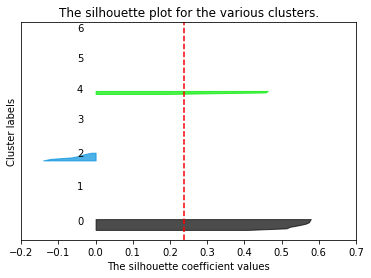

For no. of clusters = 8 , the average silhouette_score is : 0.22365447317523698


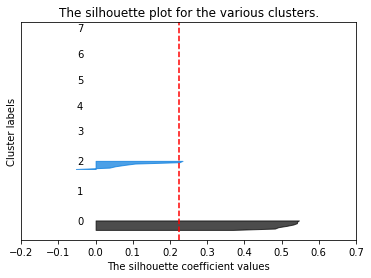

For no. of clusters = 9 , the average silhouette_score is : 0.2326274099346522


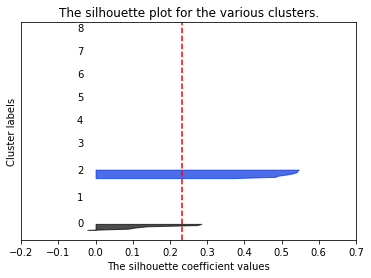

For no. of clusters = 10 , the average silhouette_score is : 0.2163098236018476


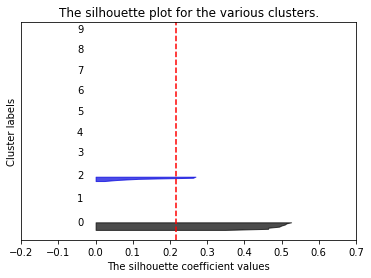

For no. of clusters = 11 , the average silhouette_score is : 0.21147110556917056


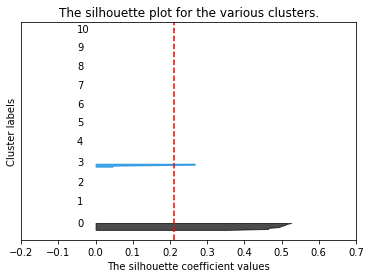

For no. of clusters = 12 , the average silhouette_score is : 0.2399480307800659


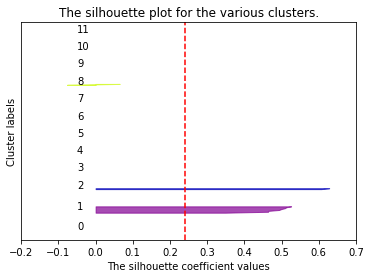

For no. of clusters = 13 , the average silhouette_score is : 0.2376467914143665


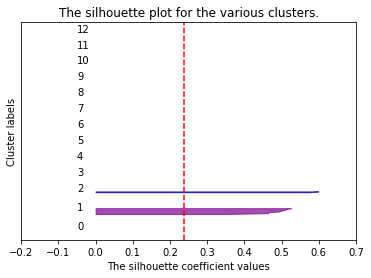

For no. of clusters = 14 , the average silhouette_score is : 0.1790767354985307


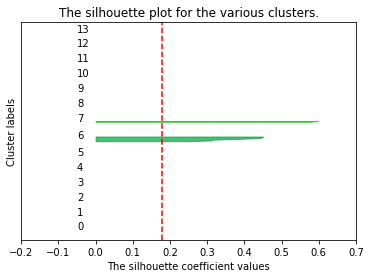

For no. of clusters = 15 , the average silhouette_score is : 0.1965131384709149


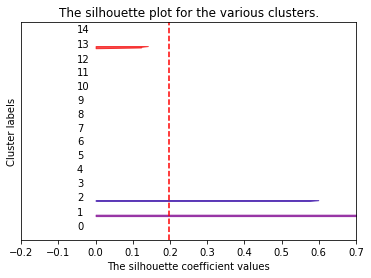

For no. of clusters = 16 , the average silhouette_score is : 0.2003711011958321


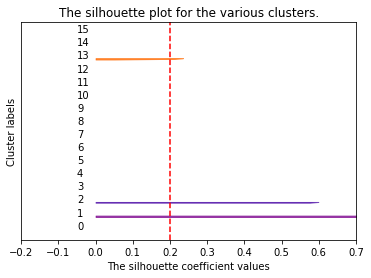

For no. of clusters = 17 , the average silhouette_score is : 0.17632016757580152


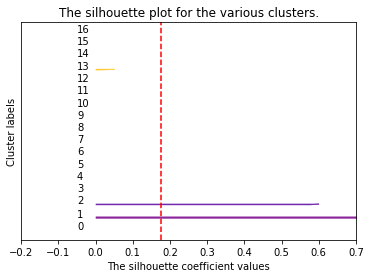

For no. of clusters = 18 , the average silhouette_score is : 0.17362693869884038


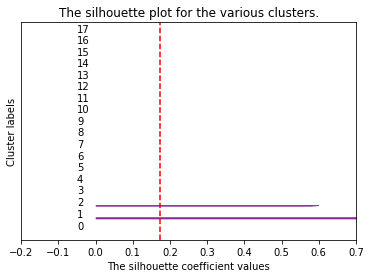

In [ ]:
# Let's try using K-means clustering which is most widely used Unsupervised model to see if there are any clusters

# Importing KMeans submodule from cluster module in sklearn library
from sklearn.cluster import KMeans

# Importing metrics module from sklearn library
from sklearn import metrics

# Importing cm module from matplotlib library for ColorMaps
import matplotlib.cm as cm

# Assigning a dummy arrays Cluster_error & cluster_sil_scores
Cluster_error = []
cluster_sil_scores = []

# Defining cluster range from 1 to 18 though the minimum clusters we should find is 3 as it will help visualize Elbow plot
cluster_range = range(1, 19)

# Fit model KMeans for each value of cluster in the range defined in cluster_range
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state = 5)
    clusters.fit(kmeans_T_df)
    Cluster_error.append(clusters.inertia_)
    labels = clusters.labels_

    # Sillhouette core for 1 Cluster is meaningless
    if num_clusters == 1:
        cluster_sil_scores.append(np.NaN)
        continue
        
    cluster_sil_scores.append(metrics.silhouette_score(kmeans_T_df, labels, metric='euclidean'))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = metrics.silhouette_score(kmeans_T_df, labels)
    print("For no. of clusters =", num_clusters, ", the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(kmeans_T_df, labels)
    
    y_lower = 18
    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 18
    
    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster labels")
    plt.yticks([])
    plt.xlim([-0.2, 0.7])

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # Show the plot for each number of clusters
    plt.show()

In [ ]:
# Computing Error for each number of Clusters
cluster_range = range(2, 21)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(kmeans_T_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              2        6.029559
1              3        4.332617
2              4        3.816890
3              5        2.484612
4              6        2.234328
5              7        1.886897
6              8        1.549014
7              9        1.194741
8             10        0.972476
9             11        0.754504
10            12        0.587805
11            13        0.462710
12            14        0.303020
13            15        0.163102
14            16        0.091874

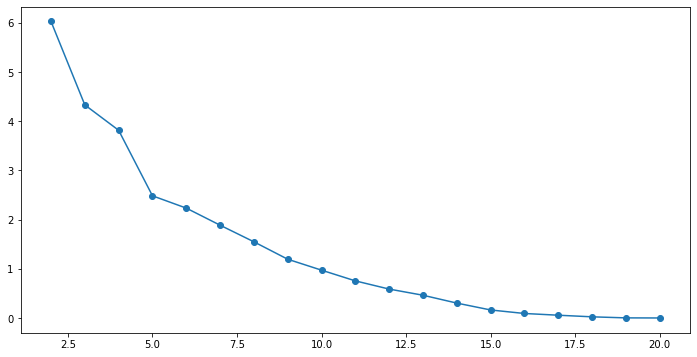

In [ ]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### From the plot given above we can see that 17 clusters seem to be appropriate

In [ ]:
# Forming 17 Clusters
cluster = KMeans( n_clusters = 17, random_state = 2354 )
cluster.fit(kmeans_T_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [ ]:
# Getting Centroids for each Clusters
centroids = cluster.cluster_centers_
centroids

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.24746941e-03,  7.14476671e-04, -4.24067304e-03, ...,
         2.23075621e-03,  6.18008741e-03,  9.03488281e-04],
       [-1.96297591e-02, -2.59258117e-02, -8.36799080e-03, ...,
        -2.48194648e-02, -2.46283894e-02,  1.61286558e-02],
       ...,
       [-3.17263868e-03, -1.08076780e-02, -5.08215550e-03, ...,
         3.54380137e-02,  2.45703403e-02,  6.95983635e-03],
       [ 2.01152120e-03, -5.31185423e-03, -4.04858853e-03, ...,
         6.37802460e-03,  6.89900660e-03, -1.40410020e-03],
       [ 1.21950609e-02, -6.01385891e-04, -7.97467068e-03, ...,
         6.66804842e-03,  2.86528310e-03,  2.14045204e-03]])

In [ ]:
# Preparing Centroid DataFrame to compare it with average Daily Log Returns for each Date
centroid_df = pd.DataFrame(centroids, columns = list(kmeans_T_df) )
centroid_df

2011-01-04  2011-01-05  2011-01-06  ...  2020-04-13  2020-04-15  2020-04-16
0     0.000000    0.000000    0.000000  ...    0.000000    0.000000    1.000000
1    -0.001247    0.000714   -0.004241  ...    0.002231    0.006180    0.000903
2    -0.019630   -0.025926   -0.008368  ...   -0.024819   -0.024628    0.016129
3    -0.001222   -0.020253    0.018295  ...   -0.092694   -0.016807   -0.121003
4    -0.013271   -0.021064   -0.024995  ...   -0.050048    0.018273    0.007622
5    -0.024595   -0.017903   -0.018790  ...   -0.019709   -0.004796    0.014189
6    -0.003347   -0.008854   -0.012629  ...   -0.033933    0.009371    0.025944
7     0.011404    0.001164   -0.001046  ...    0.027335   -0.000611    0.017597
8     0.002646   -0.000568    0.005038  ...   -0.009907    0.007863   -0.018994
9    -0.000405   -0.003812   -0.012900  ...   -0.034012   -0.001330    0.010806
10    0.006357   -0.005569   -0.008174  ...   -0.014865   -0.009876    0.018263
11    0.006020    0.007640   -0.001711  ...    0.000049    0.002243    0.004534
12    0.014306    0.006767   -0.008243  ...   -0.015430    0.040457   -0.005900
13   -0.006214   -0.019987   -0.014191  ...   -0.024791   -0.018407    0.011402
14   -0.003173   -0.010808   -0.005082  ...    0.035438    0.024570    0.006960
15    0.002012   -0.005312   -0.004049  ...    0.006378    0.006899   -0.001404
16    0.012195   -0.000601   -0.007975  ...    0.006668    0.002865    0.002140

[17 rows x 2297 columns]

In [ ]:
# Predicting Group for each Assets
prediction=cluster.predict(kmeans_T_df)
kmeans_T_df["GROUP"] = prediction

In [ ]:
# Verifying DataFrame
kmeans_T_df.head()

Date                          2011-01-04 00:00:00  ...  GROUP
AUTO_TR_DAILY_LOG_RETURNS               -0.006214  ...     13
CD_TR_DAILY_LOG_RETURNS                 -0.000405  ...      9
FINSERV_TR_DAILY_LOG_RETURNS            -0.018197  ...      2
FMCG_TR_DAILY_LOG_RETURNS                0.014306  ...     12
IT_TR_DAILY_LOG_RETURNS                  0.002646  ...      8

[5 rows x 2298 columns]

In [ ]:
# Printing Groups
print(kmeans_T_df.GROUP)

AUTO_TR_DAILY_LOG_RETURNS              13
CD_TR_DAILY_LOG_RETURNS                 9
FINSERV_TR_DAILY_LOG_RETURNS            2
FMCG_TR_DAILY_LOG_RETURNS              12
IT_TR_DAILY_LOG_RETURNS                 8
MEDIA_TR_DAILY_LOG_RETURNS              6
OILGAS_TR_DAILY_LOG_RETURNS            10
PHARMA_TR_DAILY_LOG_RETURNS             7
PVTB_TR_DAILY_LOG_RETURNS               2
PSUB_TR_DAILY_LOG_RETURNS               5
REALTY_TR_DAILY_LOG_RETURNS             4
COMPGSEC_DAILY_LOG_RETURNS              1
GSEC_4_8_YR_DAILY_LOG_RETURNS           1
GSEC_8_13_YR_DAILY_LOG_RETURNS          1
Currencies_USDINR_DAILY_LOG_RETURNS    11
Currencies_EURINR_DAILY_LOG_RETURNS    16
Currencies_JPYINR_DAILY_LOG_RETURNS    15
Currencies_GBPINR_DAILY_LOG_RETURNS    16
Gold_DAILY_LOG_RETURNS                 14
Crude_DAILY_LOG_RETURNS                 3
GROUP                                   0
Name: GROUP, dtype: int32


## OBSERVATION: Finserv and PVTB seem to cluster together so should we consider only one of the? COMPGSEC, GSEC 4-8 Yr and GSEC 8-13 Yr seem to cluster together so we should probably go with COMPGSEC?

## 2. PCA

In [ ]:
# Importing PCA
from sklearn.decomposition import PCA

# Transforming Data based on 20 Principal Components
pcamodel = PCA(20)
pca = pcamodel.fit_transform(kmeans_df)
print(pca.shape)


# number of components
n_pcs= pcamodel.components_.shape[0]

# get the index of the most important feature of each component
most_important = [np.abs(pcamodel.components_[i]).argmax() for i in range(n_pcs)]

# extract the column names frmo the dataframe
initial_feature_names = kmeans_df.columns.values

# get the names based on the principal component analysis
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# pack the result into a dataframe
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())

print('variance ratio of each feature:', pcamodel.explained_variance_ratio_)
print('features:', most_important_names)
print(df)

(2297, 20)
variance ratio of each feature: [9.89174337e-01 3.19732545e-03 2.42574678e-03 8.88290567e-04
 7.13962404e-04 5.62065797e-04 4.94122865e-04 4.14467740e-04
 3.82315524e-04 3.24281770e-04 2.98617207e-04 2.85922145e-04
 2.54881476e-04 2.24788212e-04 1.29329313e-04 9.32288053e-05
 5.76300222e-05 4.07869659e-05 3.52245096e-05 2.17036592e-06]
features: ['GROUP', 'Crude_DAILY_LOG_RETURNS', 'Crude_DAILY_LOG_RETURNS', 'PSUB_TR_DAILY_LOG_RETURNS', 'REALTY_TR_DAILY_LOG_RETURNS', 'MEDIA_TR_DAILY_LOG_RETURNS', 'IT_TR_DAILY_LOG_RETURNS', 'PHARMA_TR_DAILY_LOG_RETURNS', 'Gold_DAILY_LOG_RETURNS', 'CD_TR_DAILY_LOG_RETURNS', 'OILGAS_TR_DAILY_LOG_RETURNS', 'FMCG_TR_DAILY_LOG_RETURNS', 'Gold_DAILY_LOG_RETURNS', 'AUTO_TR_DAILY_LOG_RETURNS', 'Currencies_JPYINR_DAILY_LOG_RETURNS', 'GSEC_8_13_YR_DAILY_LOG_RETURNS', 'Currencies_EURINR_DAILY_LOG_RETURNS', 'Currencies_USDINR_DAILY_LOG_RETURNS', 'FINSERV_TR_DAILY_LOG_RETURNS', 'GSEC_4_8_YR_DAILY_LOG_RETURNS']
       0                                    1

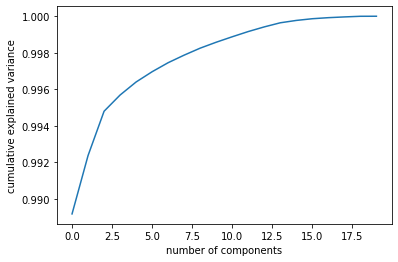

In [ ]:
# Plotting explained variance for each Principal Components
plt.plot(np.cumsum(pcamodel.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# Printing columns in the DataFrame
for col in capstone_df.columns: 
    print(col)

AUTO_TR_OPEN
AUTO_TR_HIGH
AUTO_TR_LOW
AUTO_TR_CLOSE
AUTO_TR_DAILY_RETURNS
AUTO_TR_DAILY_LOG_RETURNS
AUTO_TR_HIGH_ADJ
AUTO_TR_LOW_ADJ
AUTO_TR_52-week Low High Range
AUTO_TR_Momentum
AUTO_TR_5-day SMA
AUTO_TR_10-day SMA
AUTO_TR_15-day SMA
AUTO_TR_20-day SMA
AUTO_TR_30-day SMA
AUTO_TR_50-day SMA
AUTO_TR_100-day-SMA
AUTO_TR_150-day-SMA
AUTO_TR_200-day SMA
AUTO_Y_LOG_RETURNS
AUTO_SHARES_TRADED
AUTO_TURNOVER
AUTO_1 month momentum
AUTO_3 months momentum
AUTO_6 months momentum
AUTO_9 months momentum
AUTO_12 months momentum
CD_TR_CLOSE
CD_TR_DAILY_RETURNS
CD_TR_DAILY_LOG_RETURNS
CD_TR_52-week Low High Range
CD_TR_Momentum
CD_TR_5-day SMA
CD_TR_10-day SMA
CD_TR_15-day SMA
CD_TR_20-day SMA
CD_TR_30-day SMA
CD_TR_50-day SMA
CD_TR_100-day-SMA
CD_TR_150-day-SMA
CD_TR_200-day SMA
CD_Y_LOG_RETURNS
CD_1 month momentum
CD_3 months momentum
CD_6 months momentum
CD_9 months momentum
CD_12 months momentum
FINSERV_TR_OPEN
FINSERV_TR_HIGH
FINSERV_TR_LOW
FINSERV_TR_CLOSE
FINSERV_TR_DAILY_RETURNS
FINSERV_TR_DA

In [ ]:
# Removing OPEN, HIGH (& HIGH_ADJ), LOW (& LOW_ADJ), CLOSE & DAILY_RETURNS columns

cap_df = capstone_df.copy()
for col in cap_df.columns:
   if 'OPEN' in col or 'HIGH' in col or 'LOW' in col or 'CLOSE' in col or 'DAILY_RETURNS' in col:
    cap_df.drop(columns=col, axis=1, inplace=True)

cap_df.head()

AUTO_TR_DAILY_LOG_RETURNS  ...  Crude_12 months momentum
Date                                   ...                          
2020-04-16                   0.011402  ...                  0.345409
2020-04-15                  -0.018407  ...                  0.386317
2020-04-13                  -0.024791  ...                  0.392865
2020-04-09                   0.098994  ...                  0.426402
2020-04-08                   0.018418  ...                  0.410538

[5 rows x 377 columns]

# Checking performance of Basic Models on Individual Indices Dataset

In [ ]:
# Getting Training & testing Datasets for checking performance of Basic models on Individual Indices Dataset
train_df = cap_df['2018-12-31':'2011-01-04']
test_df = cap_df['2020-04-15':'2019-01-01']

**AUTO**

In [ ]:
# Extracting Dataset for AUTO
AUTO_train_df = train_df.copy()
AUTO_test_df = test_df.copy()
for col in AUTO_train_df.columns:
  if 'AUTO' not in col:
    AUTO_train_df.drop(columns=col, axis=1, inplace=True)
    AUTO_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
AUTO_train_df

AUTO_TR_DAILY_LOG_RETURNS  ...  AUTO_12 months momentum
Date                                   ...                         
2018-12-31                   0.001275  ...                 0.784301
2018-12-28                   0.004315  ...                 0.785473
2018-12-27                  -0.004662  ...                 0.778947
2018-12-26                   0.002196  ...                 0.779077
2018-12-24                  -0.014073  ...                 0.777368
...                               ...  ...                      ...
2011-01-10                  -0.023542  ...                 1.243156
2011-01-07                  -0.033288  ...                 1.288668
2011-01-06                  -0.014191  ...                 1.312825
2011-01-05                  -0.019987  ...                 1.320070
2011-01-04                  -0.006214  ...                 1.343626

[1980 rows x 20 columns]

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = AUTO_train_df.copy()
y_train = AUTO_train_df.copy()
for col in AUTO_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = AUTO_test_df.copy()
y_test = AUTO_test_df.copy()
for col in AUTO_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

SVM: For AUTO_Y_LOG_RETURNS R square is: -0.11530860751819594
Linear Regression: For AUTO_Y_LOG_RETURNS R square is: -0.09127800117421958
Random Forest Regression: For AUTO_Y_LOG_RETURNS R square is: -0.07098233555336719
                           Feature     Value
0        AUTO_TR_DAILY_LOG_RETURNS  0.088636
3                AUTO_TR_5-day SMA  0.072185
12              AUTO_SHARES_TRADED  0.064216
4               AUTO_TR_10-day SMA  0.061305
14           AUTO_1 month momentum  0.060656
13                   AUTO_TURNOVER  0.058130
15          AUTO_3 months momentum  0.057639
16          AUTO_6 months momentum  0.052824
8               AUTO_TR_50-day SMA  0.051635
17          AUTO_9 months momentum  0.051082
5               AUTO_TR_15-day SMA  0.049601
1   AUTO_TR_52-week Low High Range  0.049041
18         AUTO_12 months momentum  0.044913
9              AUTO_TR_100-day-SMA  0.043000
7               AUTO_TR_30-day SMA  0.042680
2                 AUTO_TR_Momentum  0.042618
6             

**CD**

In [ ]:
# Extracting Dataset for CD
CD_train_df = train_df.copy()
CD_test_df = test_df.copy()
for col in CD_train_df.columns:
  if 'CD' not in col:
    CD_train_df.drop(columns=col, axis=1, inplace=True)
    CD_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
CD_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = CD_train_df.copy()
y_train = CD_train_df.copy()
for col in CD_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = CD_test_df.copy()
y_test = CD_test_df.copy()
for col in CD_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**FINSERV**

In [ ]:
# Extracting Dataset for FINSERV
FINSERV_train_df = train_df.copy()
FINSERV_test_df = test_df.copy()
for col in FINSERV_train_df.columns:
  if 'FINSERV' not in col:
    FINSERV_train_df.drop(columns=col, axis=1, inplace=True)
    FINSERV_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
FINSERV_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = FINSERV_train_df.copy()
y_train = FINSERV_train_df.copy()
for col in FINSERV_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = FINSERV_test_df.copy()
y_test = FINSERV_test_df.copy()
for col in FINSERV_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**FMCG**

In [ ]:
# Extracting Dataset for FMCG
FMCG_train_df = train_df.copy()
FMCG_test_df = test_df.copy()
for col in FMCG_train_df.columns:
  if 'FMCG' not in col:
    FMCG_train_df.drop(columns=col, axis=1, inplace=True)
    FMCG_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
FMCG_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = FMCG_train_df.copy()
y_train = FMCG_train_df.copy()
for col in FMCG_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = FMCG_test_df.copy()
y_test = FMCG_test_df.copy()
for col in FMCG_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**IT**

In [ ]:
# Extracting Dataset for IT
IT_train_df = train_df.copy()
IT_test_df = test_df.copy()
for col in IT_train_df.columns:
  if 'IT' not in col:
    IT_train_df.drop(columns=col, axis=1, inplace=True)
    IT_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
IT_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = IT_train_df.copy()
y_train = IT_train_df.copy()
for col in IT_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = IT_test_df.copy()
y_test = IT_test_df.copy()
for col in IT_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**MEDIA**

In [ ]:
# Extracting Dataset for MEDIA
MEDIA_train_df = train_df.copy()
MEDIA_test_df = test_df.copy()
for col in MEDIA_train_df.columns:
  if 'MEDIA' not in col:
    MEDIA_train_df.drop(columns=col, axis=1, inplace=True)
    MEDIA_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
MEDIA_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = MEDIA_train_df.copy()
y_train = MEDIA_train_df.copy()
for col in MEDIA_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = MEDIA_test_df.copy()
y_test = MEDIA_test_df.copy()
for col in MEDIA_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**OILGAS**

In [ ]:
# Extracting Dataset for OILGAS
OILGAS_train_df = train_df.copy()
OILGAS_test_df = test_df.copy()
for col in OILGAS_train_df.columns:
  if 'OILGAS' not in col:
    OILGAS_train_df.drop(columns=col, axis=1, inplace=True)
    OILGAS_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
OILGAS_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = OILGAS_train_df.copy()
y_train = OILGAS_train_df.copy()
for col in OILGAS_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = OILGAS_test_df.copy()
y_test = OILGAS_test_df.copy()
for col in OILGAS_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**PHARMA**

In [ ]:
# Extracting Dataset for Crude
PHARMA_train_df = train_df.copy()
PHARMA_test_df = test_df.copy()
for col in PHARMA_train_df.columns:
  if 'PHARMA' not in col:
    PHARMA_train_df.drop(columns=col, axis=1, inplace=True)
    PHARMA_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
PHARMA_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = PHARMA_train_df.copy()
y_train = PHARMA_train_df.copy()
for col in PHARMA_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = PHARMA_test_df.copy()
y_test = PHARMA_test_df.copy()
for col in PHARMA_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**PVTB**

In [ ]:
# Extracting Dataset for Crude
PVTB_train_df = train_df.copy()
PVTB_test_df = test_df.copy()
for col in PVTB_train_df.columns:
  if 'PVTB' not in col:
    PVTB_train_df.drop(columns=col, axis=1, inplace=True)
    PVTB_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
PVTB_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = PVTB_train_df.copy()
y_train = PVTB_train_df.copy()
for col in PVTB_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = PVTB_test_df.copy()
y_test = PVTB_test_df.copy()
for col in PVTB_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**PSUB**

In [ ]:
# Extracting Dataset for PSUB
PSUB_train_df = train_df.copy()
PSUB_test_df = test_df.copy()
for col in PSUB_train_df.columns:
  if 'PSUB' not in col:
    PSUB_train_df.drop(columns=col, axis=1, inplace=True)
    PSUB_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
PSUB_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = PSUB_train_df.copy()
y_train = PSUB_train_df.copy()
for col in PSUB_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = PSUB_test_df.copy()
y_test = PSUB_test_df.copy()
for col in PSUB_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**REALTY**

In [ ]:
# Extracting Dataset for REALTY
REALTY_train_df = train_df.copy()
REALTY_test_df = test_df.copy()
for col in REALTY_train_df.columns:
  if 'REALTY' not in col:
    REALTY_train_df.drop(columns=col, axis=1, inplace=True)
    REALTY_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
REALTY_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = REALTY_train_df.copy()
y_train = REALTY_train_df.copy()
for col in REALTY_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = REALTY_test_df.copy()
y_test = REALTY_test_df.copy()
for col in REALTY_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**COMPGSEC**

In [ ]:
# Extracting Dataset for COMPGSEC
COMPGSEC_train_df = train_df.copy()
COMPGSEC_test_df = test_df.copy()
for col in COMPGSEC_train_df.columns:
  if 'COMPGSEC' not in col:
    COMPGSEC_train_df.drop(columns=col, axis=1, inplace=True)
    COMPGSEC_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
COMPGSEC_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = COMPGSEC_train_df.copy()
y_train = COMPGSEC_train_df.copy()
for col in COMPGSEC_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = COMPGSEC_test_df.copy()
y_test = COMPGSEC_test_df.copy()
for col in COMPGSEC_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**GSEC_4_8_YR**

In [ ]:
# Extracting Dataset for GSEC_4_8_YR
GSEC_4_8_YR_train_df = train_df.copy()
GSEC_4_8_YR_test_df = test_df.copy()
for col in GSEC_4_8_YR_train_df.columns:
  if 'GSEC_4_8_YR' not in col:
    GSEC_4_8_YR_train_df.drop(columns=col, axis=1, inplace=True)
    GSEC_4_8_YR_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
GSEC_4_8_YR_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = GSEC_4_8_YR_train_df.copy()
y_train = GSEC_4_8_YR_train_df.copy()
for col in GSEC_4_8_YR_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = GSEC_4_8_YR_test_df.copy()
y_test = GSEC_4_8_YR_test_df.copy()
for col in GSEC_4_8_YR_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**GSEC_8_13_YR**

In [ ]:
# Extracting Dataset for GSEC_8_13_YR
GSEC_8_13_YR_train_df = train_df.copy()
GSEC_8_13_YR_test_df = test_df.copy()
for col in GSEC_8_13_YR_train_df.columns:
  if 'GSEC_8_13_YR' not in col:
    GSEC_8_13_YR_train_df.drop(columns=col, axis=1, inplace=True)
    GSEC_8_13_YR_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
GSEC_8_13_YR_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = GSEC_8_13_YR_train_df.copy()
y_train = GSEC_8_13_YR_train_df.copy()
for col in GSEC_8_13_YR_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = GSEC_8_13_YR_test_df.copy()
y_test = GSEC_8_13_YR_test_df.copy()
for col in GSEC_8_13_YR_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**Currencies_USDINR**

In [ ]:
# Extracting Dataset for Currencies_USDINR
Currencies_USDINR_train_df = train_df.copy()
Currencies_USDINR_test_df = test_df.copy()
for col in Currencies_USDINR_train_df.columns:
  if 'Currencies_USDINR' not in col:
    Currencies_USDINR_train_df.drop(columns=col, axis=1, inplace=True)
    Currencies_USDINR_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
Currencies_USDINR_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = Currencies_USDINR_train_df.copy()
y_train = Currencies_USDINR_train_df.copy()
for col in Currencies_USDINR_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = Currencies_USDINR_test_df.copy()
y_test = Currencies_USDINR_test_df.copy()
for col in Currencies_USDINR_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**Currencies_EURINR**

In [ ]:
# Extracting Dataset for Currencies_EURINR
Currencies_EURINR_train_df = train_df.copy()
Currencies_EURINR_test_df = test_df.copy()
for col in Currencies_EURINR_train_df.columns:
  if 'Currencies_EURINR' not in col:
    Currencies_EURINR_train_df.drop(columns=col, axis=1, inplace=True)
    Currencies_EURINR_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
Currencies_EURINR_train_df

In [ ]:
# Verifying testing DataFrame
Currencies_EURINR_test_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = Currencies_EURINR_train_df.copy()
y_train = Currencies_EURINR_train_df.copy()
for col in Currencies_EURINR_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = Currencies_EURINR_test_df.copy()
y_test = Currencies_EURINR_test_df.copy()
for col in Currencies_EURINR_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**Currencies_JPYINR**

In [ ]:
# Extracting Dataset for Currencies_JPYINR
Currencies_JPYINR_train_df = train_df.copy()
Currencies_JPYINR_test_df = test_df.copy()
for col in Currencies_JPYINR_train_df.columns:
  if 'Currencies_JPYINR' not in col:
    Currencies_JPYINR_train_df.drop(columns=col, axis=1, inplace=True)
    Currencies_JPYINR_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
Currencies_JPYINR_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = Currencies_JPYINR_train_df.copy()
y_train = Currencies_JPYINR_train_df.copy()
for col in Currencies_JPYINR_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = Currencies_JPYINR_test_df.copy()
y_test = Currencies_JPYINR_test_df.copy()
for col in Currencies_JPYINR_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**Currencies_GBPINR**

In [ ]:
# Extracting Dataset for Currencies_GBPINR
Currencies_GBPINR_train_df = train_df.copy()
Currencies_GBPINR_test_df = test_df.copy()
for col in Currencies_GBPINR_train_df.columns:
  if 'Currencies_GBPINR' not in col:
    Currencies_GBPINR_train_df.drop(columns=col, axis=1, inplace=True)
    Currencies_GBPINR_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
Currencies_GBPINR_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = Currencies_GBPINR_train_df.copy()
y_train = Currencies_GBPINR_train_df.copy()
for col in Currencies_GBPINR_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = Currencies_GBPINR_test_df.copy()
y_test = Currencies_GBPINR_test_df.copy()
for col in Currencies_GBPINR_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**Gold**

In [ ]:
# Extracting Dataset for Gold
Gold_train_df = train_df.copy()
Gold_test_df = test_df.copy()
for col in Gold_train_df.columns:
  if 'Gold' not in col:
    Gold_train_df.drop(columns=col, axis=1, inplace=True)
    Gold_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
Gold_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = Gold_train_df.copy()
y_train = Gold_train_df.copy()
for col in Gold_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = Gold_test_df.copy()
y_test = Gold_test_df.copy()
for col in Gold_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

**Crude**

In [ ]:
# Extracting Dataset for Crude
Crude_train_df = train_df.copy()
Crude_test_df = test_df.copy()
for col in Crude_train_df.columns:
  if 'Crude' not in col:
    Crude_train_df.drop(columns=col, axis=1, inplace=True)
    Crude_test_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Verifying training DataFrame
Crude_train_df

In [ ]:
# Splitting Features & Target column for Training Dataset
X_train = Crude_train_df.copy()
y_train = Crude_train_df.copy()
for col in Crude_train_df.columns:
  if '_Y_' in col:
    X_train.drop(columns = col, axis=1, inplace=True)
  else:
    y_train.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Splitting Features & Target column for Testing Dataset
X_test = Crude_test_df.copy()
y_test = Crude_test_df.copy()
for col in Crude_test_df.columns:
  if '_Y_' in col:
    X_test.drop(columns = col, axis=1, inplace=True)
  else:
    y_test.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Performing SVR, Linear Regression, Random Forest & extracting important Features from Random Forest
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  feature_score =  [(item, score)
                 for item, score in zip(X_train.columns, rf.feature_importances_)]

  feature_imp_df = pd.DataFrame(feature_score)
  feature_imp_df.columns = ['Feature','Value']
  feature_imp_df.sort_values('Value',ascending=False,inplace=True)
  print(feature_imp_df)

# PCA for Basic Models & Q-learning

In [ ]:
# Getting Features & Target variables
X = all_df.copy()
y = all_df.copy()
for col in all_df.columns:
  if '_Y_LOG_RETURNS' in col:
    X.drop(col, axis=1, inplace=True)
  else:
    y.drop(col, axis=1, inplace=True)

In [ ]:
# Training up to 2018, Testing on 2019
X_train = X['2011-01-04':'2018-12-31']
X_test = X['2019-01-01':'2019-12-31']
y_train = y['2011-01-04':'2018-12-31']
y_test = y['2019-01-01':'2019-12-31']

In [ ]:
# Constructing Covariance Matrix
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.12148834e+07 1.12479109e+07 1.11307304e+07 ... 9.14864286e+06
  1.11667838e-01 1.68760661e-01]
 [1.12479109e+07 1.12841151e+07 1.11650196e+07 ... 9.17925849e+06
  3.15611096e-01 3.72160936e-01]
 [1.11307304e+07 1.11650196e+07 1.10515629e+07 ... 9.07880018e+06
  4.12606050e-01 4.70481582e-01]
 ...
 [9.14864286e+06 9.17925849e+06 9.07880018e+06 ... 7.94581546e+06
  6.95507459e-01 7.42494430e-01]
 [1.11667838e-01 3.15611096e-01 4.12606050e-01 ... 6.95507459e-01
  9.43980706e-05 9.44396983e-05]
 [1.68760661e-01 3.72160936e-01 4.70481582e-01 ... 7.42494430e-01
  9.44396983e-05 9.44898231e-05]]


In [ ]:
# Calculating Eigen vectors & Eigen values from covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.84212262e-05+0.j  7.06703367e-06+0.j -1.53890762e-06+0.j ...
  -1.07214563e-15+0.j -1.12352295e-15+0.j  9.44366205e-16+0.j]
 [-3.86163301e-05+0.j  7.17860120e-06+0.j -1.22756206e-06+0.j ...
   2.08772586e-13+0.j  1.09190302e-13+0.j -1.04999014e-13+0.j]
 [-3.79688599e-05+0.j  6.94526046e-06+0.j -2.11311651e-06+0.j ...
  -2.15980320e-13+0.j -1.11476096e-13+0.j  1.07447479e-13+0.j]
 ...
 [-3.44771368e-05+0.j  2.54166464e-06+0.j  5.57515581e-06+0.j ...
   1.71739453e-14+0.j  9.92378739e-15+0.j -9.43677051e-15+0.j]
 [ 1.53589003e-12+0.j -1.46312500e-12+0.j -2.28804000e-12+0.j ...
  -5.05111886e-08+0.j -2.55676252e-08+0.j  2.47330011e-08+0.j]
 [ 1.50272374e-12+0.j -1.45692524e-12+0.j -3.01209510e-12+0.j ...
   5.04605728e-08+0.j  2.55457335e-08+0.j -2.47103175e-08+0.j]]

 Eigen Values 
%s [ 3.38757718e+15+0.00000000e+00j  1.84166065e+15+0.00000000e+00j
  3.66691039e+14+0.00000000e+00j  2.05870843e+14+0.00000000e+00j
  1.10404739e+14+0.00000000e+00j  7.62914186e+13+0.00

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


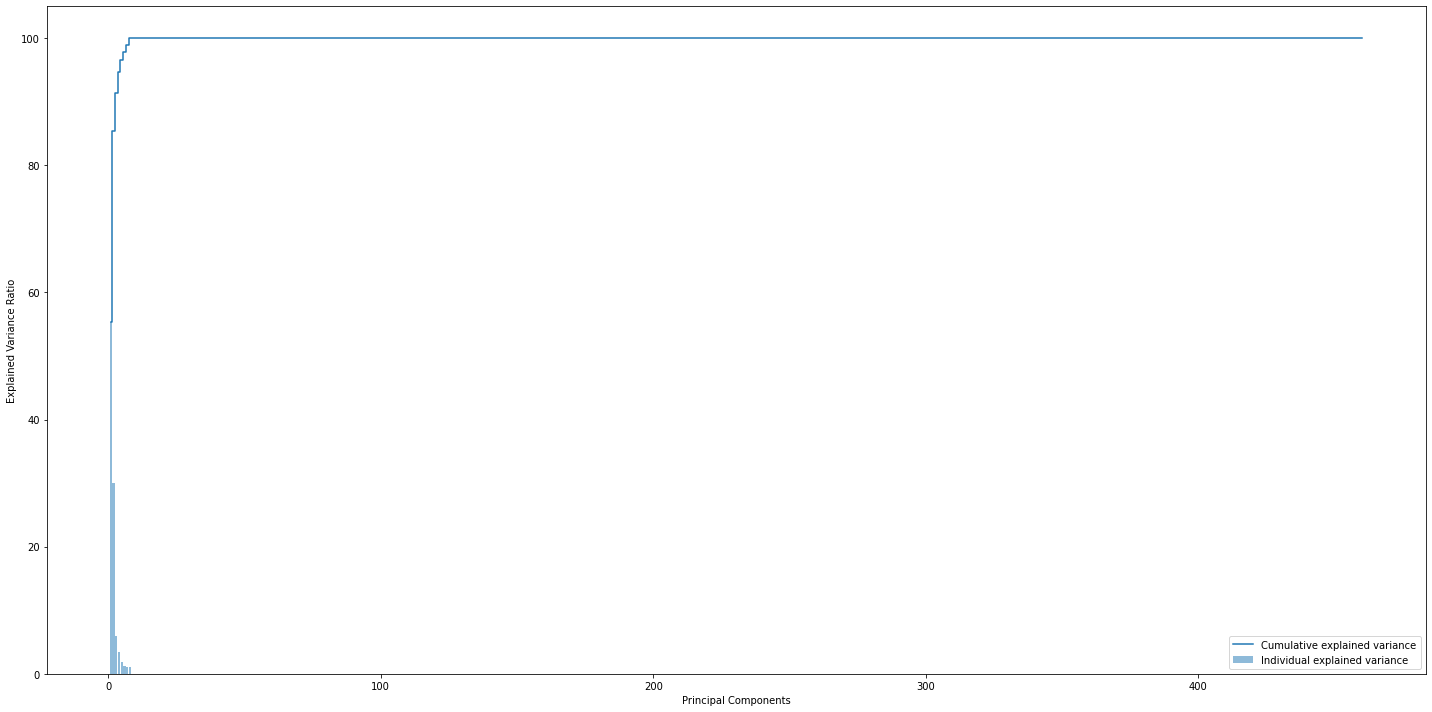

In [ ]:
# Capturing Total of all Eigen values
tot = sum(eig_vals)

# Calculating explained variance for each Principal Components after sorting each PCs by decreasing values of Eigen values
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]

# Calculating the cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# Plotting both explained variance & cumulative variance
plt.figure(figsize=(20 , 10))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
# Getting no. of Principal Components explaining 95% of the explained variance
for i in range(len(cum_var_exp)):
  if cum_var_exp[i] >= 95:
    break
print(i)

4


In [ ]:
# Importing PCA submodule from decomposition module in sklearn library
from sklearn.decomposition import PCA

# Trying with 5 Principal Components
pca = PCA(n_components=5)
X_reduced = pd.DataFrame(pca.fit_transform(X_train))

# Checking the new Training Dataset with reduced feature
X_reduced.head()

0             1             2             3             4
0 -4.999268e+07 -3.876137e+07 -7.576144e+06  5.726778e+06  6.670540e+06
1 -4.252347e+07 -4.485094e+07 -7.098531e+05  1.055685e+07  3.589344e+06
2 -3.799036e+07 -3.184472e+07 -7.242123e+05  9.796576e+06 -3.305747e+06
3 -3.639707e+07 -3.148909e+07  1.550385e+06  8.026881e+06 -2.013302e+06
4 -3.952363e+07 -3.630383e+07  4.106558e+06  6.229875e+06  9.156412e+05

In [ ]:
# Setting index of Reduced DataFrame
X_reduced.index = X_train.index

In [ ]:
# Getting Testing Reduced DataFrame
X_reduced_test = pd.DataFrame(pca.transform(X_test))
X_reduced_test.index = X_test.index

# Evaluating basic models with PCA

In [ ]:
# Performing SVR, Linear Regression, Random Forest Regressor & Polynomial Featues Regression with PCA

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_reduced)
X_test_scaled = scaler.transform(X_reduced_test)

for i in range(y_train.shape[1]):
  svr = SVR()
  svr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = svr.predict(X_test_scaled)
  print("SVM: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = lr.predict(X_test_scaled)
  print("Linear Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))
  
  rf = RandomForestRegressor()
  rf.fit(X_train_scaled, y_train[y_train.columns[i]])
  y_pred = rf.predict(X_test_scaled)
  print("Random Forest: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

  scaler_poly = StandardScaler()
  poly = PolynomialFeatures(2)
  X_train_poly = scaler_poly.fit_transform(poly.fit_transform(X_reduced))
  X_test_poly = scaler_poly.transform(poly.transform(X_reduced_test))
  lr_poly = LinearRegression()
  lr_poly.fit(X_train_poly, y_train[y_train.columns[i]])
  y_pred = lr_poly.predict(X_test_poly)
  print("Polynomial Regression: For", y_train.columns[i], "R square is:", r2_score(y_test[y_test.columns[i]], y_pred))

SVM: For AUTO_Y_LOG_RETURNS R square is: -0.2935781233934194
Linear Regression: For AUTO_Y_LOG_RETURNS R square is: -0.0030145558500322966
Random Forest: For AUTO_Y_LOG_RETURNS R square is: -0.06602709295018627
Polynomial Regression: For AUTO_Y_LOG_RETURNS R square is: -0.12017023874360899
SVM: For CD_Y_LOG_RETURNS R square is: -0.3928342036728365
Linear Regression: For CD_Y_LOG_RETURNS R square is: -0.01229586351946299
Random Forest: For CD_Y_LOG_RETURNS R square is: -0.24212013429703094
Polynomial Regression: For CD_Y_LOG_RETURNS R square is: -0.26522805843626873
SVM: For FINSERV_Y_LOG_RETURNS R square is: -0.06292341003301227
Linear Regression: For FINSERV_Y_LOG_RETURNS R square is: -0.01436592097208278
Random Forest: For FINSERV_Y_LOG_RETURNS R square is: -0.12341031095934318
Polynomial Regression: For FINSERV_Y_LOG_RETURNS R square is: -0.14407864771564838
SVM: For FMCG_Y_LOG_RETURNS R square is: -1.1708834647579311
Linear Regression: For FMCG_Y_LOG_RETURNS R square is: -0.0433409

# PCA for Q-learning

In [ ]:
# Discretizing State-space with quartiles

q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in X_reduced.columns:
  q1 = X_reduced[col].quantile(.25)
  q2 = X_reduced[col].quantile(.5)
  q3 = X_reduced[col].quantile(.75)
  X_reduced[str(col) + '_D'] = X_reduced[col].apply(quartiles)
  X_reduced_test[str(col) + '_D'] = X_reduced_test[col].apply(quartiles)

X_reduced_test.head()

0             1             2  ...  2_D  3_D  4_D
Date                                                  ...               
2019-01-01  3.454225e+07 -5.723656e+07 -1.897950e+07  ...  0.0  2.0  0.0
2019-01-02  9.387215e+07 -5.545762e+07  4.061578e+06  ...  2.0  0.0  0.0
2019-01-03  7.417260e+07 -5.811730e+07  2.521155e+06  ...  2.0  0.0  0.0
2019-01-04  8.856251e+07 -5.807662e+07 -1.728364e+06  ...  2.0  0.0  1.0
2019-01-07  4.868193e+07 -4.871271e+07  1.228034e+07  ...  3.0  0.0  0.0

[5 rows x 10 columns]

In [ ]:
# Removing raw data
X_reduced = X_reduced[['0_D','1_D','2_D','3_D','4_D']]
X_reduced_test = X_reduced_test[['0_D','1_D','2_D','3_D','4_D']]
X_reduced.columns = [0,1,2,3,4]
X_reduced_test.columns = [0,1,2,3,4]

In [ ]:
# Defining charges
BROKERAGE = 0
TRANSACTION_CHARGE = 0.5
GST = 18
STT_BUY = 0
STT_SELL = 0.001
STAMP_DUTY = 0.01
SEBI_TURNOVER_TAX = 0.00015
DAILY_EXPENSE_RATIO = 0.5 / 250   #250 is approximate Yearly sessions

In [ ]:
# Setting Action-space & state-space sizes
action_space_size = 5
state_space_size = 4**5 * action_space_size

In [ ]:
# Initializing Q-table
Q_table = np.zeros((state_space_size, action_space_size))

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3) + s[4] * (4**4)

X_reduced['state'] = X_reduced.apply(get_state, axis=1)
X_reduced_test['state'] = X_reduced_test.apply(get_state, axis=1)

X_reduced_test.head()

0    1    2    3    4  state
Date                                      
2019-01-01  3.0  0.0  0.0  2.0  0.0  131.0
2019-01-02  3.0  0.0  2.0  0.0  0.0   35.0
2019-01-03  3.0  0.0  2.0  0.0  0.0   35.0
2019-01-04  3.0  0.0  2.0  0.0  1.0  291.0
2019-01-07  3.0  0.0  3.0  0.0  0.0   51.0

In [ ]:
# Setting hyperparameters
episodes = 1000
gamma = 0.9
learning_rate = 0.2

In [ ]:
# Training Q-learning on PCA
epsilon = 1
for episode in range(episodes):
  epsilon -= 1.0/episodes
  total_reward = 0
  cash = 100000
  fund = 0
  total_fund = cash + fund
  prev_action = 0
  for i in range(len(X_reduced)):
    if np.random.rand() < epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(Q_table[prev_action * 4**5 + int(X_reduced.iloc[i,-1])])   #Exploit
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(y_train.iloc[0,1]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(X_reduced):
      Q_table[prev_action * 4**5 + int(X_reduced.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**5 + int(X_reduced.iloc[i,-1])][next_action])
    else:
      Q_table[prev_action * 4**5 + int(X_reduced.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**5 + int(X_reduced.iloc[i+1,-1])]) - Q_table[prev_action * 4**5 + int(X_reduced.iloc[i,-1])][next_action])
    prev_action = next_action
  print("At episode", episode + 1, "Fund value is", total_fund)
print(Q_table)

At episode 1 Fund value is 23.65435285755315
At episode 2 Fund value is 17.28288575468699
At episode 3 Fund value is 21.995168576693125
At episode 4 Fund value is 18.407347674526402
At episode 5 Fund value is 21.239420389931286
At episode 6 Fund value is 16.955844160995802
At episode 7 Fund value is 20.18783752737957
At episode 8 Fund value is 22.64567675775327
At episode 9 Fund value is 19.501473344976823
At episode 10 Fund value is 19.027457080029944
At episode 11 Fund value is 18.70946053362082
At episode 12 Fund value is 20.4521068129119
At episode 13 Fund value is 20.298439985780657
At episode 14 Fund value is 21.856849187884613
At episode 15 Fund value is 18.516955536957624
At episode 16 Fund value is 20.427407348344868
At episode 17 Fund value is 19.30613795106011
At episode 18 Fund value is 20.299104702203067
At episode 19 Fund value is 20.28416092636874
At episode 20 Fund value is 21.072204341114983
At episode 21 Fund value is 19.822354960207047
At episode 22 Fund value is 18.

In [ ]:
# Testing Q-learning on PCA
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(X_reduced_test)):
  next_action = np.argmax(Q_table[prev_action * 4**5 + int(X_reduced_test.iloc[i,-1])])   #Exploit
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(y_test.iloc[i,1]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)

Fund value is 100000.0


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for CD is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for CD is 0.0 %


# Q-learning with 5 features from individual Index

In [ ]:
# Selecting 5 Features for Media based on EDA
media_df = all_df[['MEDIA_TR_5-day SMA', 'MEDIA_TR_20-day SMA', 'MEDIA_TR_52-week Low High Range', 'MEDIA_1 month momentum', 'MEDIA_6 months momentum', 'MEDIA_Y_LOG_RETURNS']]
media_df.columns = [0, 1, 2, 3, 4, 'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018 & testing on 2019
train_df = media_df['2007-01-03':'2018-12-31']
test_df = media_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing State-space with quartiles

q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0         1         2         3  ...  1_D  2_D  3_D  4_D
Date                                                ...                    
2019-01-01  1.015866  1.023787  0.195818  1.018735  ...  2.0  0.0  2.0  0.0
2019-01-02  0.996682  1.010439  0.170717  1.005422  ...  2.0  0.0  1.0  0.0
2019-01-03  0.978773  0.991179  0.134293  0.986104  ...  1.0  0.0  1.0  0.0
2019-01-04  0.992442  1.001194  0.154784  0.991003  ...  1.0  0.0  1.0  0.0
2019-01-07  0.998679  1.003798  0.160784  1.011869  ...  1.0  0.0  2.0  0.0

[5 rows x 11 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','4_D','MEDIA_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','4_D','MEDIA_Y_LOG_RETURNS']]
train_df.columns = [0,1,2,3,4,'MEDIA_Y_LOG_RETURNS']
test_df.columns = [0,1,2,3,4,'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Defining charges
BROKERAGE = 0
TRANSACTION_CHARGE = 0.5
GST = 18
STT_BUY = 0
STT_SELL = 0.001
STAMP_DUTY = 0.01
SEBI_TURNOVER_TAX = 0.00015
DAILY_EXPENSE_RATIO = 0.5 / 250   #250 is approximate Yearly sessions

In [ ]:
# Setting Action-space & state-space sizes
action_space_size = 5
state_space_size = 4**5 * action_space_size

In [ ]:
# Initializing Q-table
Q_table = np.zeros((state_space_size, action_space_size))

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3) + s[4] * (4**4)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3    4  MEDIA_Y_LOG_RETURNS  state
Date                                                           
2019-01-01  3.0  2.0  0.0  2.0  0.0            -0.013154  139.0
2019-01-02  1.0  2.0  0.0  1.0  0.0            -0.019401   73.0
2019-01-03  0.0  1.0  0.0  1.0  0.0             0.010961   68.0
2019-01-04  1.0  1.0  0.0  1.0  0.0             0.003187   69.0
2019-01-07  1.0  1.0  0.0  2.0  0.0            -0.012463  133.0

In [ ]:
# Setting hyperparameters
episodes = 1000
gamma = 0.9
learning_rate = 0.2

In [ ]:
# Training Q-learning on MEDIA
epsilon = 1
for episode in range(episodes):
  epsilon -= 1.0/episodes
  total_reward = 0
  cash = 100000
  fund = 0
  total_fund = cash + fund
  prev_action = 0
  for i in range(len(train_df)):
    if np.random.rand() < epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(Q_table[prev_action * 4**5 + int(train_df.iloc[i,-1])])   #Exploit
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(y_train.iloc[0,1]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      Q_table[prev_action * 4**5 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**5 + int(train_df.iloc[i,-1])][next_action])
    else:
      Q_table[prev_action * 4**5 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**5 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**5 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("At episode", episode + 1, "Fund value is", total_fund)
print(Q_table)

At episode 1 Fund value is 0.22747895485475747
At episode 2 Fund value is 0.2758983492673578
At episode 3 Fund value is 0.23043962845263843
At episode 4 Fund value is 0.23987134777561558
At episode 5 Fund value is 0.2563284279736629
At episode 6 Fund value is 0.35478398099020103
At episode 7 Fund value is 0.26836832015898276
At episode 8 Fund value is 0.2202815908585141
At episode 9 Fund value is 0.24544463948683942
At episode 10 Fund value is 0.33017147961372184
At episode 11 Fund value is 0.2752116849220862
At episode 12 Fund value is 0.22598897304542065
At episode 13 Fund value is 0.3051271156253497
At episode 14 Fund value is 0.24960114404258288
At episode 15 Fund value is 0.26775833370268115
At episode 16 Fund value is 0.27270951837025337
At episode 17 Fund value is 0.2728440720615334
At episode 18 Fund value is 0.25644602096908886
At episode 19 Fund value is 0.29995154818036773
At episode 20 Fund value is 0.2908342939877101
At episode 21 Fund value is 0.37537117331965714
At episo

In [ ]:
# Testing Q-learning on MEDIA
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(Q_table[prev_action * 4**5 + int(test_df.iloc[i,-1])])   #Exploit
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(y_test.iloc[i,1]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)

Fund value is 100000.0


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for MEDIA is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for MEDIA is 0.0 %


# Q-learning with 4 features from individual Index

In [ ]:
# Selecting 4 Features for Media based on EDA
media_df = all_df[['MEDIA_TR_5-day SMA', 'MEDIA_TR_20-day SMA', 'MEDIA_TR_52-week Low High Range', 'MEDIA_1 month momentum', 'MEDIA_Y_LOG_RETURNS']]
media_df.columns = [0, 1, 2, 3, 'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018 & testing on 2019
train_df = media_df['2007-01-03':'2018-12-31']
test_df = media_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing State-space with quartiles

q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.015866  1.023787  0.195818  1.018735  ...  3.0  2.0  0.0  2.0
2019-01-02  0.996682  1.010439  0.170717  1.005422  ...  1.0  2.0  0.0  1.0
2019-01-03  0.978773  0.991179  0.134293  0.986104  ...  0.0  1.0  0.0  1.0
2019-01-04  0.992442  1.001194  0.154784  0.991003  ...  1.0  1.0  0.0  1.0
2019-01-07  0.998679  1.003798  0.160784  1.011869  ...  1.0  1.0  0.0  2.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','MEDIA_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','MEDIA_Y_LOG_RETURNS']]
train_df.columns = [0,1,2,3,'MEDIA_Y_LOG_RETURNS']
test_df.columns = [0,1,2,3,'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Defining charges
BROKERAGE = 0
TRANSACTION_CHARGE = 0.5
GST = 18
STT_BUY = 0
STT_SELL = 0.001
STAMP_DUTY = 0.01
SEBI_TURNOVER_TAX = 0.00015
DAILY_EXPENSE_RATIO = 0.5 / 250   #250 is approximate Yearly sessions

In [ ]:
# Setting Action-space & state-space sizes
action_space_size = 5
state_space_size = 4**4 * action_space_size

In [ ]:
# Initializing Q-table
Q_table = np.zeros((state_space_size, action_space_size))

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  MEDIA_Y_LOG_RETURNS  state
Date                                                      
2019-01-01  3.0  2.0  0.0  2.0            -0.013154  139.0
2019-01-02  1.0  2.0  0.0  1.0            -0.019401   73.0
2019-01-03  0.0  1.0  0.0  1.0             0.010961   68.0
2019-01-04  1.0  1.0  0.0  1.0             0.003187   69.0
2019-01-07  1.0  1.0  0.0  2.0            -0.012463  133.0

In [ ]:
# Setting hyperparameters
episodes = 1000
gamma = 0.9
learning_rate = 0.2

In [ ]:
# Training Q-learning on MEDIA
epsilon = 1
for episode in range(episodes):
  epsilon -= 1.0/episodes
  total_reward = 0
  cash = 100000
  fund = 0
  total_fund = cash + fund
  prev_action = 0
  for i in range(len(train_df)):
    if np.random.rand() < epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(y_train.iloc[0,1]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("At episode", episode + 1, "Fund value is", total_fund)
print(Q_table)

At episode 1 Fund value is 0.2517029203033049
At episode 2 Fund value is 0.25355223936481885
At episode 3 Fund value is 0.2831171121150996
At episode 4 Fund value is 0.2704622671732056
At episode 5 Fund value is 0.24261831641611692
At episode 6 Fund value is 0.2943495705532625
At episode 7 Fund value is 0.27378549564354987
At episode 8 Fund value is 0.273993134908349
At episode 9 Fund value is 0.3077738641043316
At episode 10 Fund value is 0.2939233370761585
At episode 11 Fund value is 0.3315815506337599
At episode 12 Fund value is 0.30977229819474406
At episode 13 Fund value is 0.26647258175892863
At episode 14 Fund value is 0.3090219473100789
At episode 15 Fund value is 0.3068048548085947
At episode 16 Fund value is 0.24438752150665194
At episode 17 Fund value is 0.30596862818333304
At episode 18 Fund value is 0.26651978816968536
At episode 19 Fund value is 0.21322498392831943
At episode 20 Fund value is 0.3523423169609371
At episode 21 Fund value is 0.3846073595130888
At episode 22 

In [ ]:
# Testing Q-learning on MEDIA
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(y_test.iloc[i,1]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)

Fund value is 100000.0


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for MEDIA is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for MEDIA is 0.0 %


# Q-learning with 3 features from individual Index

In [ ]:
# Selecting 3 Features for Media based on EDA
media_df = all_df[['MEDIA_TR_5-day SMA', 'MEDIA_TR_52-week Low High Range', 'MEDIA_1 month momentum', 'MEDIA_Y_LOG_RETURNS']]
media_df.columns = [0, 1, 2, 'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018 & testing on 2019
train_df = media_df['2007-01-03':'2018-12-31']
test_df = media_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing State-space with quartiles

q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0         1         2  MEDIA_Y_LOG_RETURNS  0_D  1_D  2_D
Date                                                                        
2019-01-01  1.015866  0.195818  1.018735            -0.013154  3.0  0.0  2.0
2019-01-02  0.996682  0.170717  1.005422            -0.019401  1.0  0.0  1.0
2019-01-03  0.978773  0.134293  0.986104             0.010961  0.0  0.0  1.0
2019-01-04  0.992442  0.154784  0.991003             0.003187  1.0  0.0  1.0
2019-01-07  0.998679  0.160784  1.011869            -0.012463  1.0  0.0  2.0

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','MEDIA_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','MEDIA_Y_LOG_RETURNS']]
train_df.columns = [0,1,2,'MEDIA_Y_LOG_RETURNS']
test_df.columns = [0,1,2,'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Defining charges
BROKERAGE = 0
TRANSACTION_CHARGE = 0.5
GST = 18
STT_BUY = 0
STT_SELL = 0.001
STAMP_DUTY = 0.01
SEBI_TURNOVER_TAX = 0.00015
DAILY_EXPENSE_RATIO = 0.5 / 250   #250 is approximate Yearly sessions

In [ ]:
# Setting Action-space & state-space sizes
action_space_size = 5
state_space_size = 4**3 * action_space_size

In [ ]:
# Initializing Q-table
Q_table = np.zeros((state_space_size, action_space_size))

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2  MEDIA_Y_LOG_RETURNS  state
Date                                                 
2019-01-01  3.0  0.0  2.0            -0.013154   35.0
2019-01-02  1.0  0.0  1.0            -0.019401   17.0
2019-01-03  0.0  0.0  1.0             0.010961   16.0
2019-01-04  1.0  0.0  1.0             0.003187   17.0
2019-01-07  1.0  0.0  2.0            -0.012463   33.0

In [ ]:
# Setting hyperparameters
episodes = 1000
gamma = 0.9
learning_rate = 0.2

In [ ]:
# Training Q-learning on MEDIA
epsilon = 1
for episode in range(episodes):
  epsilon -= 1.0/episodes
  total_reward = 0
  cash = 100000
  fund = 0
  total_fund = cash + fund
  prev_action = 0
  for i in range(len(train_df)):
    if np.random.rand() < epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(Q_table[prev_action * 4**3 + int(train_df.iloc[i,-1])])   #Exploit
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(y_train.iloc[0,1]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      Q_table[prev_action * 4**3 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**3 + int(train_df.iloc[i,-1])][next_action])
    else:
      Q_table[prev_action * 4**3 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**3 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**3 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("At episode", episode + 1, "Fund value is", total_fund)
print(Q_table)

At episode 1 Fund value is 0.23395728173790137
At episode 2 Fund value is 0.23494166501862196
At episode 3 Fund value is 0.23615779051109273
At episode 4 Fund value is 0.2719504128854617
At episode 5 Fund value is 0.26765801283943014
At episode 6 Fund value is 0.29685089526707087
At episode 7 Fund value is 0.22070861074758913
At episode 8 Fund value is 0.26886829252813776
At episode 9 Fund value is 0.25938913989040147
At episode 10 Fund value is 0.31079907018532493
At episode 11 Fund value is 0.30048458587182497
At episode 12 Fund value is 0.2871152063009159
At episode 13 Fund value is 0.24920515194237547
At episode 14 Fund value is 0.22972751567726896
At episode 15 Fund value is 0.2709945749665557
At episode 16 Fund value is 0.3174673059799051
At episode 17 Fund value is 0.2731401106159248
At episode 18 Fund value is 0.3529732217170577
At episode 19 Fund value is 0.3267780782612453
At episode 20 Fund value is 0.2499320581423877
At episode 21 Fund value is 0.2365666939201129
At episode

In [ ]:
# Testing Q-learning on MEDIA
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(Q_table[prev_action * 4**3 + int(test_df.iloc[i,-1])])   #Exploit
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(y_test.iloc[i,1]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)

Fund value is 100000.0


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for MEDIA is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for MEDIA is 0.0 %


# Continuing with 4 features as observations are better with 4 features

In [ ]:
# Selecting 4 Features for Media based on EDA
media_df = all_df[['MEDIA_TR_5-day SMA', 'MEDIA_TR_20-day SMA', 'MEDIA_TR_52-week Low High Range', 'MEDIA_1 month momentum', 'MEDIA_Y_LOG_RETURNS']]
media_df.columns = [0, 1, 2, 3, 'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Training up to 2017, validation 2018 & testing 2019
train_df = media_df['2007-01-03':'2017-12-31']
val_df = media_df['2018-01-01':'2018-12-31']
test_df = media_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing State-space with quartiles

q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    val_df[str(col) + '_D'] = val_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.015866  1.023787  0.195818  1.018735  ...  3.0  2.0  0.0  2.0
2019-01-02  0.996682  1.010439  0.170717  1.005422  ...  1.0  2.0  0.0  1.0
2019-01-03  0.978773  0.991179  0.134293  0.986104  ...  0.0  1.0  0.0  1.0
2019-01-04  0.992442  1.001194  0.154784  0.991003  ...  1.0  1.0  0.0  1.0
2019-01-07  0.998679  1.003798  0.160784  1.011869  ...  1.0  1.0  0.0  1.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','MEDIA_Y_LOG_RETURNS']]
val_df = val_df[['0_D','1_D','2_D','3_D','MEDIA_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','MEDIA_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'MEDIA_Y_LOG_RETURNS']
val_df.columns = [0, 1, 2, 3, 'MEDIA_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Defining Charges
BROKERAGE = 0
TRANSACTION_CHARGE = 0.5
GST = 18
STT_BUY = 0
STT_SELL = 0.001
STAMP_DUTY = 0.01
SEBI_TURNOVER_TAX = 0.00015
DAILY_EXPENSE_RATIO = 0.5 / 250   #250 is approximate Yearly sessions

In [ ]:
# Setting Action-space & State-space size
action_space_size = 5
state_space_size = 4**4 * action_space_size

In [ ]:
# Getting State for each Trading Date
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
val_df['state'] = val_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    1    2    3  MEDIA_Y_LOG_RETURNS  state
Date                                                      
2019-01-01  3.0  2.0  0.0  2.0            -0.013154  139.0
2019-01-02  1.0  2.0  0.0  1.0            -0.019401   73.0
2019-01-03  0.0  1.0  0.0  1.0             0.010961   68.0
2019-01-04  1.0  1.0  0.0  1.0             0.003187   69.0
2019-01-07  1.0  1.0  0.0  1.0            -0.012463   69.0

In [ ]:
# Hyper-parameter Tuning for Equity Assets for Q-learning

episodes = 100
best_eq_gamma = 0.0
best_eq_learning_rate = 0.0
best_eq_epsilon = 0.0
best_performance = 0.0

for gamma in range(0, 12, 2):
  gamma /= 10
  for l in range(0, 12, 2):
    l /= 10
    for e in range(0, 12, 2):
      e /= 10
      Q_table = np.zeros((state_space_size, action_space_size))

      if e == 0:
        epsilon = 1
      else:
        epsilon = e
      if l == 0:
        learning_rate = 1
      else:
        learning_rate = l
      for episode in range(episodes):
        if e == 0:
          epsilon -= 1.0/episodes
        if l == 0:
          learning_rate -= 1.0/episodes
        total_reward = 0
        fund = 100000 * (episode % 5) / 4
        cash = 100000 - fund
        total_fund = cash + fund
        prev_action = episode % 5
        for i in range(len(train_df)):
          if np.random.rand() < epsilon:
            next_action = np.random.randint(5)  #Explore
          else:
            next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
            if next_action == 0 and Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
              next_action = prev_action
          transaction = total_fund * next_action / 4 - fund
          cash = cash - transaction
          brokerage = np.absolute(transaction) * BROKERAGE / 100
          transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
          gst = (brokerage + transaction_charge) * GST / 100
          if transaction > 0:
            stt = np.absolute(transaction) * STT_BUY / 100
          else:
            stt = np.absolute(transaction) * STT_SELL / 100
          stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
          sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
          fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
          reward = np.log((cash + fund)/total_fund)
          total_fund = cash + fund
          total_reward += reward
          if (i+1) == len(train_df):
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          else:
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          prev_action = next_action
      
      # Checking performance on validation data
      total_reward = 0
      cash = 100000
      fund = 0
      total_fund = cash + fund
      prev_action = 0
      for i in range(len(val_df)):
        next_action = np.argmax(Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])])   #Exploit
        if next_action == 0 and Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])][1] == 0:
          next_action = prev_action
        transaction = total_fund * next_action / 4 - fund
        cash = cash - transaction
        brokerage = np.absolute(transaction) * BROKERAGE / 100
        transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
        gst = (brokerage + transaction_charge) * GST / 100
        if transaction > 0:
          stt = np.absolute(transaction) * STT_BUY / 100
        else:
          stt = np.absolute(transaction) * STT_SELL / 100
        stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
        sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
        fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(val_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
        reward = np.log((cash + fund)/total_fund)
        total_fund = cash + fund
        total_reward += reward
        prev_action = next_action
      print("With gamma", gamma, "Learning rate", l, "epsilon", e, "we have Fund value =", total_fund)
      if total_fund > best_performance:
        best_eq_epsilon = e
        best_eq_learning_rate = l
        best_eq_gamma = gamma
        best_performance = total_fund
        print("and it is best so far")
print("Best performance is", best_performance, "when gamma", best_eq_gamma, "Learning rate", best_eq_learning_rate, "epsilon", best_eq_epsilon)

With gamma 0.0 Learning rate 0.0 epsilon 0.0 we have Fund value = 94449.5689133872
and it is best so far
With gamma 0.0 Learning rate 0.0 epsilon 0.2 we have Fund value = 86349.00656739174
With gamma 0.0 Learning rate 0.0 epsilon 0.4 we have Fund value = 89171.30968637706
With gamma 0.0 Learning rate 0.0 epsilon 0.6 we have Fund value = 77527.36361554556
With gamma 0.0 Learning rate 0.0 epsilon 0.8 we have Fund value = 77696.3394003361
With gamma 0.0 Learning rate 0.0 epsilon 1.0 we have Fund value = 72602.87320251521
With gamma 0.0 Learning rate 0.2 epsilon 0.0 we have Fund value = 86615.35100119142
With gamma 0.0 Learning rate 0.2 epsilon 0.2 we have Fund value = 91520.15124959618
With gamma 0.0 Learning rate 0.2 epsilon 0.4 we have Fund value = 78653.21651833586
With gamma 0.0 Learning rate 0.2 epsilon 0.6 we have Fund value = 74230.76093543746
With gamma 0.0 Learning rate 0.2 epsilon 0.8 we have Fund value = 69396.50118071784
With gamma 0.0 Learning rate 0.2 epsilon 1.0 we have Fun

In [ ]:
# Fine tuning hyperparameters further
episodes = 100
best_eq_gamma = 0.0
best_eq_epsilon = 0.0
best_performance = 0.0

for gamma in range(30, 52, 2):
  gamma /= 100
  for epsilon in range(30, 52, 2):
    epsilon /= 100
    Q_table = np.zeros((state_space_size, action_space_size))

    learning_rate = 1
    for episode in range(episodes):
      learning_rate -= 1.0/episodes
      total_reward = 0
      fund = 100000 * (episode % 5) / 4
      cash = 100000 - fund
      total_fund = cash + fund
      prev_action = episode % 5
      for i in range(len(train_df)):
        if np.random.rand() < epsilon:
          next_action = np.random.randint(5)  #Explore
        else:
          next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
          if next_action == 0 and Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
            next_action = prev_action
        transaction = total_fund * next_action / 4 - fund
        cash = cash - transaction
        brokerage = np.absolute(transaction) * BROKERAGE / 100
        transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
        gst = (brokerage + transaction_charge) * GST / 100
        if transaction > 0:
          stt = np.absolute(transaction) * STT_BUY / 100
        else:
          stt = np.absolute(transaction) * STT_SELL / 100
        stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
        sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
        fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
        reward = np.log((cash + fund)/total_fund)
        total_fund = cash + fund
        total_reward += reward
        if (i+1) == len(train_df):
          Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
        else:
          Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
        prev_action = next_action
    
    # Checking performance on training data
    total_reward = 0
    cash = 100000
    fund = 0
    total_fund = cash + fund
    prev_action = 0
    for i in range(len(val_df)):
      next_action = np.argmax(Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])][1] == 0:
        next_action = prev_action
      transaction = total_fund * next_action / 4 - fund
      cash = cash - transaction
      brokerage = np.absolute(transaction) * BROKERAGE / 100
      transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
      gst = (brokerage + transaction_charge) * GST / 100
      if transaction > 0:
        stt = np.absolute(transaction) * STT_BUY / 100
      else:
        stt = np.absolute(transaction) * STT_SELL / 100
      stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
      sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
      fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
      reward = np.log((cash + fund)/total_fund)
      total_fund = cash + fund
      total_reward += reward
      prev_action = next_action
    print("With gamma", gamma, "epsilon", epsilon, "we have Fund value =", total_fund)
    if total_fund > best_performance:
      best_eq_epsilon = epsilon
      best_eq_gamma = gamma
      best_performance = total_fund
      print("and it is best so far")
print("Best performance is", best_performance, "when gamma", best_eq_gamma, "Learning rate", best_eq_learning_rate, "epsilon", best_eq_epsilon)

With gamma 0.3 epsilon 0.3 we have Fund value = 89396.74188783046
and it is best so far
With gamma 0.3 epsilon 0.32 we have Fund value = 86899.31436545475
With gamma 0.3 epsilon 0.34 we have Fund value = 81347.1226410925
With gamma 0.3 epsilon 0.36 we have Fund value = 85749.04782595369
With gamma 0.3 epsilon 0.38 we have Fund value = 87514.05748727356
With gamma 0.3 epsilon 0.4 we have Fund value = 87078.42550442732
With gamma 0.3 epsilon 0.42 we have Fund value = 84002.6046653386
With gamma 0.3 epsilon 0.44 we have Fund value = 86673.96341004773
With gamma 0.3 epsilon 0.46 we have Fund value = 90777.24430636484
and it is best so far
With gamma 0.3 epsilon 0.48 we have Fund value = 93966.36680747483
and it is best so far
With gamma 0.3 epsilon 0.5 we have Fund value = 77758.8130591095
With gamma 0.32 epsilon 0.3 we have Fund value = 81154.92894448788
With gamma 0.32 epsilon 0.32 we have Fund value = 93732.37743382147
With gamma 0.32 epsilon 0.34 we have Fund value = 92010.63564796133


In [ ]:
# Fine tuning hyperparameters further
episodes = 100
best_eq_gamma = 0.0
best_eq_epsilon = 0.0
best_performance = 0.0

for gamma in range(33, 36, 1):
  gamma /= 100
  for epsilon in range(47, 50, 1):
    epsilon /= 100
    Q_table = np.zeros((state_space_size, action_space_size))

    learning_rate = 1
    for episode in range(episodes):
      learning_rate -= 1.0/episodes
      total_reward = 0
      fund = 100000 * (episode % 5) / 4
      cash = 100000 - fund
      total_fund = cash + fund
      prev_action = episode % 5
      for i in range(len(train_df)):
        if np.random.rand() < epsilon:
          next_action = np.random.randint(5)  #Explore
        else:
          next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
          if next_action == 0 and Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
            next_action = prev_action
        transaction = total_fund * next_action / 4 - fund
        cash = cash - transaction
        brokerage = np.absolute(transaction) * BROKERAGE / 100
        transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
        gst = (brokerage + transaction_charge) * GST / 100
        if transaction > 0:
          stt = np.absolute(transaction) * STT_BUY / 100
        else:
          stt = np.absolute(transaction) * STT_SELL / 100
        stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
        sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
        fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
        reward = np.log((cash + fund)/total_fund)
        total_fund = cash + fund
        total_reward += reward
        if (i+1) == len(train_df):
          Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
        else:
          Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
        prev_action = next_action
    
    # Checking performance on training data
    total_reward = 0
    cash = 100000
    fund = 0
    total_fund = cash + fund
    prev_action = 0
    for i in range(len(val_df)):
      next_action = np.argmax(Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])][1] == 0:
        next_action = prev_action
      transaction = total_fund * next_action / 4 - fund
      cash = cash - transaction
      brokerage = np.absolute(transaction) * BROKERAGE / 100
      transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
      gst = (brokerage + transaction_charge) * GST / 100
      if transaction > 0:
        stt = np.absolute(transaction) * STT_BUY / 100
      else:
        stt = np.absolute(transaction) * STT_SELL / 100
      stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
      sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
      fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
      reward = np.log((cash + fund)/total_fund)
      total_fund = cash + fund
      total_reward += reward
      prev_action = next_action
    print("With gamma", gamma, "epsilon", epsilon, "we have Fund value =", total_fund)
    if total_fund > best_performance:
      best_eq_epsilon = epsilon
      best_eq_gamma = gamma
      best_performance = total_fund
      print("and it is best so far")
print("Best performance is", best_performance, "when gamma", best_eq_gamma, "Learning rate", best_eq_learning_rate, "epsilon", best_eq_epsilon)

With gamma 0.33 epsilon 0.47 we have Fund value = 92772.88316656408
and it is best so far
With gamma 0.33 epsilon 0.48 we have Fund value = 93503.9957789762
and it is best so far
With gamma 0.33 epsilon 0.49 we have Fund value = 87198.79303637946
With gamma 0.34 epsilon 0.47 we have Fund value = 91190.57073737984
With gamma 0.34 epsilon 0.48 we have Fund value = 88051.06652571447
With gamma 0.34 epsilon 0.49 we have Fund value = 87864.98400623714
With gamma 0.35 epsilon 0.47 we have Fund value = 77752.64424738871
With gamma 0.35 epsilon 0.48 we have Fund value = 87636.19437222119
With gamma 0.35 epsilon 0.49 we have Fund value = 87514.93745439629
Best performance is 93503.9957789762 when gamma 0.33 Learning rate 0.0 epsilon 0.48


In [ ]:
# Selecting 4 Features for AUTO based on EDA
auto_df = all_df[['AUTO_TR_5-day SMA', 'AUTO_TR_15-day SMA', 'AUTO_TR_52-week Low High Range', 'AUTO_1 month momentum', 'AUTO_Y_LOG_RETURNS']]
auto_df.columns = [0, 1, 2, 3, 'AUTO_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = auto_df['2005-01-04':'2018-12-31']
test_df = auto_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing Features with Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  0.996944  0.991571  0.201677  0.991560  ...  1.0  1.0  0.0  1.0
2019-01-02  0.973425  0.960973  0.119743  0.961349  ...  0.0  0.0  0.0  0.0
2019-01-03  0.967445  0.949090  0.080110  0.946736  ...  0.0  0.0  0.0  0.0
2019-01-04  0.981055  0.956710  0.092416  0.956273  ...  0.0  0.0  0.0  0.0
2019-01-07  0.991416  0.961006  0.095531  0.994386  ...  0.0  0.0  0.0  1.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','AUTO_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','AUTO_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'AUTO_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'AUTO_Y_LOG_RETURNS']

In [ ]:
# Getting States
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  AUTO_Y_LOG_RETURNS  state
Date                                                     
2019-01-01  1.0  1.0  0.0  1.0           -0.030942   69.0
2019-01-02  0.0  0.0  0.0  0.0           -0.015318    0.0
2019-01-03  0.0  0.0  0.0  0.0            0.004781    0.0
2019-01-04  0.0  0.0  0.0  0.0            0.001207    0.0
2019-01-07  0.0  0.0  0.0  1.0            0.004486   64.0

In [ ]:
# Defining number of Episodes
episodes = 1000

In [ ]:
# Training Q-learning

AUTO_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(AUTO_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and AUTO_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      AUTO_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - AUTO_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      AUTO_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(AUTO_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - AUTO_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(AUTO_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and AUTO_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning on 2019

AUTO_Total_Fund = pd.DataFrame(index=test_df.index)
AUTO_Total_Fund['Cash'] = 0
AUTO_Total_Fund['Fund'] = 0
AUTO_Total_Fund['Transaction'] = 0
AUTO_Total_Fund['Transaction Charges'] = 0
AUTO_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(AUTO_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and AUTO_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  AUTO_Total_Fund.iloc[i,0] = cash
  AUTO_Total_Fund.iloc[i,1] = fund
  AUTO_Total_Fund.iloc[i,2] = transaction
  AUTO_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  AUTO_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
AUTO_Total_Fund.reset_index()
AUTO_Total_Fund.to_excel('AUTO_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Fund value is 76993.24417999457


In [ ]:
# Printing performance for 2019
print("Performance for the Year 2019 for AUTO is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for AUTO is -23.00675582000544 %


In [ ]:
# Selecting 4 features for CD based on EDA
cd_df = all_df[['CD_TR_5-day SMA', 'CD_TR_10-day SMA', 'CD_TR_52-week Low High Range', 'CD_1 month momentum', 'CD_Y_LOG_RETURNS']]
cd_df.columns = [0, 1, 2, 3, 'CD_Y_LOG_RETURNS']

In [ ]:
# trainign up to 2018, Testing on 2019
train_df = cd_df['2006-04-02':'2018-12-31']
test_df = cd_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing Features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.014977  1.013142  0.548350  1.012931  ...  3.0  2.0  0.0  1.0
2019-01-02  1.004922  1.009304  0.560047  1.008534  ...  2.0  2.0  0.0  1.0
2019-01-03  0.996326  1.005774  0.543921  1.003871  ...  1.0  2.0  0.0  1.0
2019-01-04  0.993792  1.003886  0.526815  1.003353  ...  1.0  1.0  0.0  1.0
2019-01-07  1.005028  1.013788  0.516111  1.030112  ...  2.0  2.0  0.0  2.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','CD_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','CD_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'CD_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'CD_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  CD_Y_LOG_RETURNS  state
Date                                                   
2019-01-01  3.0  2.0  0.0  1.0         -0.004350   75.0
2019-01-02  2.0  2.0  0.0  1.0         -0.004634   74.0
2019-01-03  1.0  2.0  0.0  1.0         -0.002911   73.0
2019-01-04  1.0  1.0  0.0  1.0          0.011871   69.0
2019-01-07  2.0  2.0  0.0  2.0         -0.006357  138.0

In [ ]:
# Training for CD with Q-learning

CD_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(CD_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and CD_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      CD_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - CD_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      CD_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(CD_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - CD_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(CD_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and CD_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning
CD_Total_Fund = pd.DataFrame(index=test_df.index)
CD_Total_Fund['Cash'] = 0
CD_Total_Fund['Fund'] = 0
CD_Total_Fund['Transaction'] = 0
CD_Total_Fund['Transaction Charges'] = 0
CD_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(CD_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and CD_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  CD_Total_Fund.iloc[i,0] = cash
  CD_Total_Fund.iloc[i,1] = fund
  CD_Total_Fund.iloc[i,2] = transaction
  CD_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  CD_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
CD_Total_Fund.reset_index()
CD_Total_Fund.to_excel('CD_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Fund value is 99187.51803404848


In [ ]:
# Printing performance for 2019
print("Performance for the Year 2019 for CD is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for CD is -0.8124819659514726 %


In [ ]:
# Selcting 5 features for FINSERV based on EDA
finserv_df = all_df[['FINSERV_TR_5-day SMA', 'FINSERV_TR_30-day SMA', 'FINSERV_TR_52-week Low High Range', 'FINSERV_1 month momentum', 'FINSERV_Y_LOG_RETURNS']]
finserv_df.columns = [0, 1, 2, 3, 'FINSERV_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = finserv_df['2005-01-04':'2018-12-31']
test_df = finserv_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.012132  1.032325  0.929064  1.023902  ...  3.0  2.0  3.0  2.0
2019-01-02  1.000199  1.020733  0.869956  1.013767  ...  1.0  2.0  2.0  2.0
2019-01-03  0.989217  1.008293  0.805036  1.002634  ...  0.0  1.0  2.0  1.0
2019-01-04  0.999250  1.016831  0.862929  1.019478  ...  1.0  2.0  2.0  2.0
2019-01-07  1.000809  1.016738  0.872721  1.024317  ...  1.0  2.0  2.0  2.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','FINSERV_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','FINSERV_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'FINSERV_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'FINSERV_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  FINSERV_Y_LOG_RETURNS  state
Date                                                        
2019-01-01  3.0  2.0  3.0  2.0              -0.009948  187.0
2019-01-02  1.0  2.0  2.0  2.0              -0.011042  169.0
2019-01-03  0.0  1.0  2.0  1.0               0.009852  100.0
2019-01-04  1.0  2.0  2.0  2.0               0.001657  169.0
2019-01-07  1.0  2.0  2.0  2.0               0.003776  169.0

In [ ]:
# Training Q-learning for FINSERV

FINSERV_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(FINSERV_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and FINSERV_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      FINSERV_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - FINSERV_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      FINSERV_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(FINSERV_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - FINSERV_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(FINSERV_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and FINSERV_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing wit

In [ ]:
# Tesing Q-learning for FINSERV
FINSERV_Total_Fund = pd.DataFrame(index=test_df.index)
FINSERV_Total_Fund['Cash'] = 0
FINSERV_Total_Fund['Fund'] = 0
FINSERV_Total_Fund['Transaction'] = 0
FINSERV_Total_Fund['Transaction Charges'] = 0
FINSERV_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(FINSERV_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and FINSERV_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  FINSERV_Total_Fund.iloc[i,0] = cash
  FINSERV_Total_Fund.iloc[i,1] = fund
  FINSERV_Total_Fund.iloc[i,2] = transaction
  FINSERV_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  FINSERV_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
FINSERV_Total_Fund.reset_index()
FINSERV_Total_Fund.to_excel('FINSERV_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 0
Fund value is 90875.29121719925


In [ ]:
# Printing performance for 2019
print("Performance for the Year 2019 for FINSERV is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for AUTO is -23.00675582000544 %


In [ ]:
# Selecting 4 features for FMCG based on EDA
fmcg_df = all_df[['FMCG_TR_10-day SMA', 'FMCG_TR_20-day SMA', 'FMCG_TR_52-week Low High Range', 'FMCG_9 months momentum', 'FMCG_Y_LOG_RETURNS']]
fmcg_df.columns = [0, 1, 2, 3, 'FMCG_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = fmcg_df['2001-01-03':'2018-12-31']
test_df = fmcg_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing Features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  0.998930  1.007061  0.651964  1.163113  ...  1.0  2.0  1.0  2.0
2019-01-02  0.993537  1.000253  0.625759  1.155336  ...  1.0  1.0  1.0  2.0
2019-01-03  0.995923  0.999636  0.624989  1.154889  ...  1.0  1.0  1.0  2.0
2019-01-04  0.997830  0.998509  0.625113  1.157476  ...  1.0  1.0  1.0  2.0
2019-01-07  1.000612  1.000559  0.637030  1.132768  ...  1.0  1.0  1.0  2.0

[5 rows x 9 columns]

In [ ]:
# Removing Raw data
train_df = train_df[['0_D','1_D','2_D','3_D','FMCG_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','FMCG_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'FMCG_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'FMCG_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  FMCG_Y_LOG_RETURNS  state
Date                                                     
2019-01-01  1.0  2.0  1.0  2.0           -0.006710  153.0
2019-01-02  1.0  1.0  1.0  2.0           -0.000198  149.0
2019-01-03  1.0  1.0  1.0  2.0            0.000032  149.0
2019-01-04  1.0  1.0  1.0  2.0            0.003057  149.0
2019-01-07  1.0  1.0  1.0  2.0           -0.000351  149.0

In [ ]:
# Training Q-learning for FMCG

FMCG_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(FMCG_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and FMCG_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      FMCG_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - FMCG_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      FMCG_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(FMCG_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - FMCG_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(FMCG_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and FMCG_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for FMCG
FMCG_Total_Fund = pd.DataFrame(index=test_df.index)
FMCG_Total_Fund['Cash'] = 0
FMCG_Total_Fund['Fund'] = 0
FMCG_Total_Fund['Transaction'] = 0
FMCG_Total_Fund['Transaction Charges'] = 0
FMCG_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(FMCG_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and FMCG_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  FMCG_Total_Fund.iloc[i,0] = cash
  FMCG_Total_Fund.iloc[i,1] = fund
  FMCG_Total_Fund.iloc[i,2] = transaction
  FMCG_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  FMCG_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
FMCG_Total_Fund.reset_index()
FMCG_Total_Fund.to_excel('FMCG_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Fund value is 92418.58798700437


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for FMCG is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for FMCG is -7.581412012995637 %


In [ ]:
# Selecting 4 features for IT based on EDA
it_df = all_df[['IT_TR_5-day SMA', 'IT_TR_30-day SMA', 'IT_TR_52-week Low High Range', 'IT_12 months momentum', 'IT_Y_LOG_RETURNS']]
it_df.columns = [0, 1, 2, 3, 'IT_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = it_df['2001-01-03':'2018-12-31']
test_df = it_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing Features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.006466  0.996362  0.630418  1.272921  ...  2.0  1.0  1.0  2.0
2019-01-02  1.002176  0.996449  0.629655  1.268569  ...  2.0  1.0  1.0  2.0
2019-01-03  0.993955  0.987747  0.604671  1.259297  ...  1.0  1.0  1.0  2.0
2019-01-04  0.985018  0.975011  0.566809  1.243385  ...  0.0  0.0  1.0  2.0
2019-01-07  0.997205  0.983998  0.586271  1.236312  ...  1.0  1.0  1.0  2.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','IT_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','IT_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'IT_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'IT_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  IT_Y_LOG_RETURNS  state
Date                                                   
2019-01-01  2.0  1.0  1.0  2.0         -0.000264  150.0
2019-01-02  2.0  1.0  1.0  2.0         -0.008686  150.0
2019-01-03  1.0  1.0  1.0  2.0         -0.012364  149.0
2019-01-04  0.0  0.0  1.0  2.0          0.010223  144.0
2019-01-07  1.0  1.0  1.0  2.0         -0.000408  149.0

In [ ]:
# Training Q-learning for IT

IT_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(IT_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and IT_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      IT_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - IT_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      IT_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(IT_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - IT_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(IT_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and IT_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for IT
IT_Total_Fund = pd.DataFrame(index=test_df.index)
IT_Total_Fund['Cash'] = 0
IT_Total_Fund['Fund'] = 0
IT_Total_Fund['Transaction'] = 0
IT_Total_Fund['Transaction Charges'] = 0
IT_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(IT_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and IT_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  IT_Total_Fund.iloc[i,0] = cash
  IT_Total_Fund.iloc[i,1] = fund
  IT_Total_Fund.iloc[i,2] = transaction
  IT_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  IT_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
IT_Total_Fund.reset_index()
IT_Total_Fund.to_excel('IT_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Fund value is 97805.07067256843


In [ ]:
# Printing performance for 2019
print("Performance for the Year 2019 for IT is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for IT is -2.1949293274316606 %


In [ ]:
# Selecting 4 features for MEDIA based on EDA
media_df = all_df[['MEDIA_TR_5-day SMA', 'MEDIA_TR_20-day SMA', 'MEDIA_TR_52-week Low High Range', 'MEDIA_1 month momentum', 'MEDIA_Y_LOG_RETURNS']]
media_df.columns = [0, 1, 2, 3, 'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Tesing on 2019
train_df = media_df['2007-01-03':'2018-12-31']
test_df = media_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.015866  1.023787  0.195818  1.018735  ...  3.0  2.0  0.0  2.0
2019-01-02  0.996682  1.010439  0.170717  1.005422  ...  1.0  2.0  0.0  1.0
2019-01-03  0.978773  0.991179  0.134293  0.986104  ...  0.0  1.0  0.0  1.0
2019-01-04  0.992442  1.001194  0.154784  0.991003  ...  1.0  1.0  0.0  1.0
2019-01-07  0.998679  1.003798  0.160784  1.011869  ...  1.0  1.0  0.0  2.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','MEDIA_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','MEDIA_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'MEDIA_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'MEDIA_Y_LOG_RETURNS']

In [ ]:
# Getting States
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  MEDIA_Y_LOG_RETURNS  state
Date                                                      
2019-01-01  3.0  2.0  0.0  2.0            -0.013154  139.0
2019-01-02  1.0  2.0  0.0  1.0            -0.019401   73.0
2019-01-03  0.0  1.0  0.0  1.0             0.010961   68.0
2019-01-04  1.0  1.0  0.0  1.0             0.003187   69.0
2019-01-07  1.0  1.0  0.0  2.0            -0.012463  133.0

In [ ]:
# Training Q-learning for MEDIA

MEDIA_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(MEDIA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and MEDIA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      MEDIA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - MEDIA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      MEDIA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(MEDIA_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - MEDIA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(MEDIA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and MEDIA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for MEDIA
MEDIA_Total_Fund = pd.DataFrame(index=test_df.index)
MEDIA_Total_Fund['Cash'] = 0
MEDIA_Total_Fund['Fund'] = 0
MEDIA_Total_Fund['Transaction'] = 0
MEDIA_Total_Fund['Transaction Charges'] = 0
MEDIA_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(MEDIA_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and MEDIA_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  MEDIA_Total_Fund.iloc[i,0] = cash
  MEDIA_Total_Fund.iloc[i,1] = fund
  MEDIA_Total_Fund.iloc[i,2] = transaction
  MEDIA_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  MEDIA_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
MEDIA_Total_Fund.reset_index()
MEDIA_Total_Fund.to_excel('MEDIA_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing wit

In [ ]:
# Printing performance for 2019
print("Performance for the Year 2019 for MEDIA is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for MEDIA is -15.157115321907389 %


In [ ]:
# Selecting 4 features for OILGAS based on EDA
oilgas_df = all_df[['OILGAS_TR_5-day SMA', 'OILGAS_TR_30-day SMA', 'OILGAS_TR_52-week Low High Range', 'OILGAS_1 month momentum', 'OILGAS_Y_LOG_RETURNS']]
oilgas_df.columns = [0, 1, 2, 3, 'OILGAS_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = oilgas_df['2006-04-04':'2018-12-31']
test_df = oilgas_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.006231  1.024605  0.531124  1.028568  ...  2.0  2.0  1.0  2.0
2019-01-02  0.992528  1.011915  0.545859  1.015797  ...  1.0  2.0  1.0  2.0
2019-01-03  0.980217  0.995678  0.486270  0.999056  ...  0.0  1.0  1.0  1.0
2019-01-04  0.991888  1.003538  0.408160  1.000415  ...  0.0  1.0  1.0  1.0
2019-01-07  0.998213  1.006531  0.444823  1.034555  ...  1.0  2.0  1.0  2.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','OILGAS_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','OILGAS_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'OILGAS_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'OILGAS_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  OILGAS_Y_LOG_RETURNS  state
Date                                                       
2019-01-01  2.0  2.0  1.0  2.0             -0.012494  154.0
2019-01-02  1.0  2.0  1.0  2.0             -0.016617  153.0
2019-01-03  0.0  1.0  1.0  1.0              0.007834   84.0
2019-01-04  0.0  1.0  1.0  1.0              0.003380   84.0
2019-01-07  1.0  2.0  1.0  2.0             -0.001799  153.0

In [ ]:
# Training Q-learning for OILGAS

OILGAS_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(OILGAS_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and OILGAS_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      OILGAS_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - OILGAS_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      OILGAS_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(OILGAS_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - OILGAS_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(OILGAS_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and OILGAS_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for OILGAS
OILGAS_Total_Fund = pd.DataFrame(index=test_df.index)
OILGAS_Total_Fund['Cash'] = 0
OILGAS_Total_Fund['Fund'] = 0
OILGAS_Total_Fund['Transaction'] = 0
OILGAS_Total_Fund['Transaction Charges'] = 0
OILGAS_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(OILGAS_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and OILGAS_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  OILGAS_Total_Fund.iloc[i,0] = cash
  OILGAS_Total_Fund.iloc[i,1] = fund
  OILGAS_Total_Fund.iloc[i,2] = transaction
  OILGAS_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  OILGAS_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
OILGAS_Total_Fund.reset_index()
OILGAS_Total_Fund.to_excel('OILGAS_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 2
Fund value is 93994.5761257152


In [ ]:
# Printing performance for 2019
print("Performance for the Year 2019 for OILGAS is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for OILGAS is -6.00542387428481 %


In [ ]:
# Selecting 4 features for PHRAMA based on EDA
pharma_df = all_df[['PHARMA_TR_5-day SMA', 'PHARMA_TR_10-day SMA', 'PHARMA_TR_52-week Low High Range', 'PHARMA_1 month momentum', 'PHARMA_Y_LOG_RETURNS']]
pharma_df.columns = [0, 1, 2, 3, 'PHARMA_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = pharma_df['2002-01-01':'2018-12-31']
test_df = pharma_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.011256  1.010075  0.351240  0.981064  ...  3.0  2.0  0.0  1.0
2019-01-02  1.002931  1.005303  0.336840  0.976425  ...  2.0  2.0  0.0  1.0
2019-01-03  0.988314  0.993066  0.296503  0.963429  ...  0.0  1.0  0.0  0.0
2019-01-04  0.996356  1.001303  0.319048  0.969512  ...  1.0  1.0  0.0  0.0
2019-01-07  0.993139  0.995460  0.300053  1.005766  ...  0.0  1.0  0.0  1.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','PHARMA_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','PHARMA_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'PHARMA_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'PHARMA_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  PHARMA_Y_LOG_RETURNS  state
Date                                                       
2019-01-01  3.0  2.0  0.0  1.0             -0.004740   75.0
2019-01-02  2.0  2.0  0.0  1.0             -0.013399   74.0
2019-01-03  0.0  1.0  0.0  0.0              0.007511    4.0
2019-01-04  1.0  1.0  0.0  0.0             -0.006324    5.0
2019-01-07  0.0  1.0  0.0  1.0              0.015016   68.0

In [ ]:
# Training Q-learning for PHRAMA

PHARMA_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(PHARMA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and PHARMA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      PHARMA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - PHARMA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      PHARMA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(PHARMA_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - PHARMA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(PHARMA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and PHARMA_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for PHRAMA
PHARMA_Total_Fund = pd.DataFrame(index=test_df.index)
PHARMA_Total_Fund['Cash'] = 0
PHARMA_Total_Fund['Fund'] = 0
PHARMA_Total_Fund['Transaction'] = 0
PHARMA_Total_Fund['Transaction Charges'] = 0
PHARMA_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(PHARMA_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and PHARMA_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  PHARMA_Total_Fund.iloc[i,0] = cash
  PHARMA_Total_Fund.iloc[i,1] = fund
  PHARMA_Total_Fund.iloc[i,2] = transaction
  PHARMA_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  PHARMA_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
PHARMA_Total_Fund.reset_index()
PHARMA_Total_Fund.to_excel('PHARMA_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 0
Fund value is 90002.50491355071


In [ ]:
# Printing performance for 2019
print("Performance for the Year 2019 for PHARMA is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for PHARMA is -9.997495086449359 %


In [ ]:
# Selecting 4 features for PVTB based on EDA
pvtb_df = all_df[['PVTB_TR_5-day SMA', 'PVTB_TR_30-day SMA', 'PVTB_TR_52-week Low High Range', 'PVTB_1 month momentum', 'PVTB_Y_LOG_RETURNS']]
pvtb_df.columns = [0, 1, 2, 3, 'PVTB_Y_LOG_RETURNS']

In [ ]:
# Testing up to 2018, Testing on 2019
train_df = pvtb_df['2006-04-04':'2018-12-31']
test_df = pvtb_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.009322  1.022246  0.731108  1.015236  ...  2.0  2.0  1.0  1.0
2019-01-02  1.001605  1.015242  0.698968  1.009239  ...  1.0  2.0  1.0  1.0
2019-01-03  0.992985  1.006261  0.656001  1.001221  ...  1.0  1.0  1.0  1.0
2019-01-04  1.000630  1.013445  0.699762  1.012762  ...  1.0  2.0  1.0  1.0
2019-01-07  1.005114  1.017748  0.731061  1.023244  ...  2.0  2.0  1.0  2.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','PVTB_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','PVTB_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'PVTB_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'PVTB_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  PVTB_Y_LOG_RETURNS  state
Date                                                     
2019-01-01  2.0  2.0  1.0  1.0           -0.005925   90.0
2019-01-02  1.0  2.0  1.0  1.0           -0.007976   89.0
2019-01-03  1.0  1.0  1.0  1.0            0.008123   85.0
2019-01-04  1.0  2.0  1.0  1.0            0.005770   89.0
2019-01-07  2.0  2.0  1.0  2.0            0.008358  154.0

In [ ]:
# Training Q-learning for PVTB

PVTB_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(PVTB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and PVTB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      PVTB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - PVTB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      PVTB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(PVTB_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - PVTB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(PVTB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and PVTB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for PVTB
PVTB_Total_Fund = pd.DataFrame(index=test_df.index)
PVTB_Total_Fund['Cash'] = 0
PVTB_Total_Fund['Fund'] = 0
PVTB_Total_Fund['Transaction'] = 0
PVTB_Total_Fund['Transaction Charges'] = 0
PVTB_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(PVTB_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and PVTB_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  PVTB_Total_Fund.iloc[i,0] = cash
  PVTB_Total_Fund.iloc[i,1] = fund
  PVTB_Total_Fund.iloc[i,2] = transaction
  PVTB_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  PVTB_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
PVTB_Total_Fund.reset_index()
PVTB_Total_Fund.to_excel('PVTB_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Fund value is 100035.25740877906


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for PVTB is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for PVTB is 0.03525740877901029 %


In [ ]:
# Selecting 4 features for PSUB based on EDA
psub_df = all_df[['PSUB_TR_5-day SMA', 'PSUB_TR_20-day SMA', 'PSUB_TR_52-week Low High Range', 'PSUB_1 month momentum', 'PSUB_Y_LOG_RETURNS']]
psub_df.columns = [0, 1, 2, 3, 'PSUB_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = psub_df['2005-01-04':'2018-12-31']
test_df = psub_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.017520  1.051546  0.396293  1.065586  ...  3.0  3.0  2.0  3.0
2019-01-02  0.997149  1.028544  0.354954  1.045293  ...  1.0  2.0  1.0  2.0
2019-01-03  0.989248  1.017784  0.338821  1.037374  ...  1.0  2.0  1.0  2.0
2019-01-04  1.009265  1.036252  0.387891  1.075836  ...  2.0  3.0  1.0  3.0
2019-01-07  1.002734  1.026109  0.376821  1.100685  ...  2.0  2.0  1.0  3.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','PSUB_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','PSUB_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'PSUB_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'PSUB_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  PSUB_Y_LOG_RETURNS  state
Date                                                     
2019-01-01  3.0  3.0  2.0  3.0           -0.019228  239.0
2019-01-02  1.0  2.0  1.0  2.0           -0.007605  153.0
2019-01-03  1.0  2.0  1.0  2.0            0.022955  153.0
2019-01-04  2.0  3.0  1.0  3.0           -0.005132  222.0
2019-01-07  2.0  2.0  1.0  3.0            0.027350  218.0

In [ ]:
# Training Q-learning for PSUB

PSUB_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(PSUB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and PSUB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      PSUB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - PSUB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      PSUB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(PSUB_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - PSUB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(PSUB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and PSUB_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for PSUB
PSUB_Total_Fund = pd.DataFrame(index=test_df.index)
PSUB_Total_Fund['Cash'] = 0
PSUB_Total_Fund['Fund'] = 0
PSUB_Total_Fund['Transaction'] = 0
PSUB_Total_Fund['Transaction Charges'] = 0
PSUB_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(PSUB_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and PSUB_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  PSUB_Total_Fund.iloc[i,0] = cash
  PSUB_Total_Fund.iloc[i,1] = fund
  PSUB_Total_Fund.iloc[i,2] = transaction
  PSUB_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  PSUB_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
PSUB_Total_Fund.reset_index()
PSUB_Total_Fund.to_excel('PSUB_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Fund value is 79172.22370786175


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for PSUB is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for PSUB is -20.827776292138267 %


In [ ]:
# Selecting 4 features for REALTY based on EDA
realty_df = all_df[['REALTY_TR_5-day SMA', 'REALTY_TR_20-day SMA', 'REALTY_TR_52-week Low High Range', 'REALTY_1 month momentum', 'REALTY_Y_LOG_RETURNS']]
realty_df.columns = [0, 1, 2, 3, 'REALTY_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = realty_df['2008-01-01':'2018-12-31']
test_df = realty_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.015407  1.013256  0.224537  0.999688  ...  3.0  2.0  1.0  1.0
2019-01-02  1.000720  0.999326  0.205122  0.985393  ...  1.0  1.0  1.0  1.0
2019-01-03  0.998894  0.998868  0.204222  0.984730  ...  1.0  1.0  1.0  1.0
2019-01-04  1.004754  1.005638  0.215173  0.996325  ...  2.0  2.0  1.0  1.0
2019-01-07  1.012512  1.017343  0.233371  1.037390  ...  2.0  2.0  1.0  2.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','REALTY_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','REALTY_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'REALTY_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'REALTY_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  REALTY_Y_LOG_RETURNS  state
Date                                                       
2019-01-01  3.0  2.0  1.0  1.0             -0.014403   91.0
2019-01-02  1.0  1.0  1.0  1.0             -0.000672   85.0
2019-01-03  1.0  1.0  1.0  1.0              0.008155   85.0
2019-01-04  2.0  2.0  1.0  1.0              0.013407   90.0
2019-01-07  2.0  2.0  1.0  2.0             -0.000271  154.0

In [ ]:
# Training Q-learning for REALTY

REALTY_Q_table = np.zeros((state_space_size, action_space_size))

learning_rate = 1
for episode in range(episodes):
  learning_rate -= 1.0/episodes
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_eq_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(REALTY_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and REALTY_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      REALTY_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - REALTY_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      REALTY_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + best_eq_gamma * np.max(REALTY_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - REALTY_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(REALTY_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and REALTY_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for REALTY
REALTY_Total_Fund = pd.DataFrame(index=test_df.index)
REALTY_Total_Fund['Cash'] = 0
REALTY_Total_Fund['Fund'] = 0
REALTY_Total_Fund['Transaction'] = 0
REALTY_Total_Fund['Transaction Charges'] = 0
REALTY_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(REALTY_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and REALTY_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  REALTY_Total_Fund.iloc[i,0] = cash
  REALTY_Total_Fund.iloc[i,1] = fund
  REALTY_Total_Fund.iloc[i,2] = transaction
  REALTY_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  REALTY_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
REALTY_Total_Fund.reset_index()
REALTY_Total_Fund.to_excel('REALTY_Total_Fund.xlsx')

Fund value is 100704.67725789738


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for REALTY is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for REALTY is 0.704677257897357 %


In [ ]:
# Selecting 4 features for COMPGSEC based on EDA
compgsec_df = all_df[['COMPGSEC_10-day SMA', 'COMPGSEC_200-day SMA', 'COMPGSEC_52-week Low High Range', 'COMPGSEC_1 month momentum', 'COMPGSEC_Y_LOG_RETURNS']]
compgsec_df.columns = [0, 1, 2, 3, 'COMPGSEC_Y_LOG_RETURNS']

In [ ]:
# Testing up to 2017, Validation on 2018, Testing on 2019
train_df = compgsec_df['2012-01-03':'2017-12-31']
val_df = compgsec_df['2018-01-01':'2018-12-31']
test_df = compgsec_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    val_df[str(col) + '_D'] = val_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  0.995926  1.052024  0.909631  1.016225  ...  0.0  3.0  1.0  3.0
2019-01-02  0.998843  1.054980  0.944696  1.019487  ...  0.0  3.0  1.0  3.0
2019-01-03  0.996116  1.050923  0.906748  1.015957  ...  0.0  3.0  1.0  3.0
2019-01-04  0.995531  1.049209  0.893099  1.012079  ...  0.0  3.0  1.0  2.0
2019-01-07  0.993674  1.045915  0.862682  1.003294  ...  0.0  3.0  1.0  1.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','COMPGSEC_Y_LOG_RETURNS']]
val_df = val_df[['0_D','1_D','2_D','3_D','COMPGSEC_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','COMPGSEC_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'COMPGSEC_Y_LOG_RETURNS']
val_df.columns = [0, 1, 2, 3, 'COMPGSEC_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'COMPGSEC_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
val_df['state'] = val_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  COMPGSEC_Y_LOG_RETURNS  state
Date                                                         
2019-01-01  0.0  3.0  1.0  3.0                0.003204  220.0
2019-01-02  0.0  3.0  1.0  3.0               -0.003468  220.0
2019-01-03  0.0  3.0  1.0  3.0               -0.001250  220.0
2019-01-04  0.0  3.0  1.0  2.0               -0.002792  156.0
2019-01-07  0.0  3.0  1.0  1.0                0.004925   92.0

In [ ]:
# Hyperparameter tuning for Debt Indices for Q-learning

episodes = 100
best_db_gamma = 0.0
best_db_learning_rate = 0.0
best_db_epsilon = 0.0
best_performance = 0.0
STT_BUY = 0 #For Debt

for gamma in range(0, 12, 2):
  gamma /= 10
  for l in range(0, 12, 2):
    l /= 10
    for e in range(0, 12, 2):
      e /= 10
      Q_table = np.zeros((state_space_size, action_space_size))

      if e == 0:
        epsilon = 1
      else:
        epsilon = e
      if l == 0:
        learning_rate = 1
      else:
        learning_rate = l
      for episode in range(episodes):
        if e == 0:
          epsilon -= 1.0/episodes
        if l == 0:
          learning_rate -= 1.0/episodes
        total_reward = 0
        fund = 100000 * (episode % 5) / 4
        cash = 100000 - fund
        total_fund = cash + fund
        prev_action = episode % 5
        for i in range(len(train_df)):
          if np.random.rand() < epsilon:
            next_action = np.random.randint(5)  #Explore
          else:
            next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
            if next_action == 0 and Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
              next_action = prev_action
          transaction = total_fund * next_action / 4 - fund
          cash = cash - transaction
          brokerage = np.absolute(transaction) * BROKERAGE / 100
          transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
          gst = (brokerage + transaction_charge) * GST / 100
          if transaction > 0:
            stt = np.absolute(transaction) * STT_BUY / 100
          else:
            stt = np.absolute(transaction) * STT_SELL / 100
          stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
          sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
          fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
          reward = np.log((cash + fund)/total_fund)
          total_fund = cash + fund
          total_reward += reward
          if (i+1) == len(train_df):
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          else:
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          prev_action = next_action
      
      # Checking performance on validation data
      total_reward = 0
      cash = 100000
      fund = 0
      total_fund = cash + fund
      prev_action = 0
      for i in range(len(val_df)):
        next_action = np.argmax(Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])])   #Exploit
        if next_action == 0 and Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])][1] == 0:
          next_action = prev_action
        transaction = total_fund * next_action / 4 - fund
        cash = cash - transaction
        brokerage = np.absolute(transaction) * BROKERAGE / 100
        transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
        gst = (brokerage + transaction_charge) * GST / 100
        if transaction > 0:
          stt = np.absolute(transaction) * STT_BUY / 100
        else:
          stt = np.absolute(transaction) * STT_SELL / 100
        stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
        sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
        fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(val_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
        reward = np.log((cash + fund)/total_fund)
        total_fund = cash + fund
        total_reward += reward
        prev_action = next_action
      print("With gamma", gamma, "Learning rate", l, "epsilon", e, "we have Fund value =", total_fund)
      if total_fund > best_performance:
        best_db_epsilon = e
        best_db_learning_rate = l
        best_db_gamma = gamma
        best_performance = total_fund
        print("and it is best so far")
print("Best performance is", best_performance, "when gamma", best_db_gamma, "Learning rate", best_db_learning_rate, "epsilon", best_db_epsilon)

With gamma 0.0 Learning rate 0.0 epsilon 0.0 we have Fund value = 100000.0
and it is best so far
With gamma 0.0 Learning rate 0.0 epsilon 0.2 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.0 epsilon 0.4 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.0 epsilon 0.6 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.0 epsilon 0.8 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.0 epsilon 1.0 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.2 epsilon 0.0 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.2 epsilon 0.2 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.2 epsilon 0.4 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.2 epsilon 0.6 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.2 epsilon 0.8 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.2 epsilon 1.0 we have Fund value = 99494.28218315988
With gamma 0.0 Learning rate 0.4 epsilon 0.0 we have Fund value = 100

In [ ]:
# Fine-tuning hyperparameters

episodes = 100
best_db_gamma = 0.0
best_db_learning_rate = 0.0
best_db_epsilon = 0.0
best_performance = 0.0

for gamma in range(90, 102, 2):
  gamma /= 100
  for l in range(10, 34, 4):
    l /= 100
    for e in range(70, 94, 4):
      e /= 100
      Q_table = np.zeros((state_space_size, action_space_size))

      if e == 0:
        epsilon = 1
      else:
        epsilon = e
      if l == 0:
        learning_rate = 1
      else:
        learning_rate = l
      for episode in range(episodes):
        if e == 0:
          epsilon -= 1.0/episodes
        if l == 0:
          learning_rate -= 1.0/episodes
        total_reward = 0
        fund = 100000 * (episode % 5) / 4
        cash = 100000 - fund
        total_fund = cash + fund
        prev_action = episode % 5
        for i in range(len(train_df)):
          if np.random.rand() < epsilon:
            next_action = np.random.randint(5)  #Explore
          else:
            next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
            if next_action == 0 and Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
              next_action = prev_action
          transaction = total_fund * next_action / 4 - fund
          cash = cash - transaction
          brokerage = np.absolute(transaction) * BROKERAGE / 100
          transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
          gst = (brokerage + transaction_charge) * GST / 100
          if transaction > 0:
            stt = np.absolute(transaction) * STT_BUY / 100
          else:
            stt = np.absolute(transaction) * STT_SELL / 100
          stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
          sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
          fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
          reward = np.log((cash + fund)/total_fund)
          total_fund = cash + fund
          total_reward += reward
          if (i+1) == len(train_df):
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          else:
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          prev_action = next_action
      
      # Checking performance on validation data
      total_reward = 0
      cash = 100000
      fund = 0
      total_fund = cash + fund
      prev_action = 0
      for i in range(len(val_df)):
        next_action = np.argmax(Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])])   #Exploit
        if next_action == 0 and Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])][1] == 0:
          next_action = prev_action
        transaction = total_fund * next_action / 4 - fund
        cash = cash - transaction
        brokerage = np.absolute(transaction) * BROKERAGE / 100
        transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
        gst = (brokerage + transaction_charge) * GST / 100
        if transaction > 0:
          stt = np.absolute(transaction) * STT_BUY / 100
        else:
          stt = np.absolute(transaction) * STT_SELL / 100
        stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
        sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
        fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(val_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
        reward = np.log((cash + fund)/total_fund)
        total_fund = cash + fund
        total_reward += reward
        prev_action = next_action
      print("With gamma", gamma, "Learning rate", l, "epsilon", e, "we have Fund value =", total_fund)
      if total_fund > best_performance:
        best_db_epsilon = e
        best_db_learning_rate = l
        best_db_gamma = gamma
        best_performance = total_fund
        print("and it is best so far")
print("Best performance is", best_performance, "when gamma", best_db_gamma, "Learning rate", best_db_learning_rate, "epsilon", best_db_epsilon)

With gamma 0.9 Learning rate 0.1 epsilon 0.7 we have Fund value = 101746.93935764124
and it is best so far
With gamma 0.9 Learning rate 0.1 epsilon 0.74 we have Fund value = 102124.90235014076
and it is best so far
With gamma 0.9 Learning rate 0.1 epsilon 0.78 we have Fund value = 101630.52563531032
With gamma 0.9 Learning rate 0.1 epsilon 0.82 we have Fund value = 101037.88901033785
With gamma 0.9 Learning rate 0.1 epsilon 0.86 we have Fund value = 102187.07372132424
and it is best so far
With gamma 0.9 Learning rate 0.1 epsilon 0.9 we have Fund value = 102124.90235014076
With gamma 0.9 Learning rate 0.14 epsilon 0.7 we have Fund value = 103819.70541509391
and it is best so far
With gamma 0.9 Learning rate 0.14 epsilon 0.74 we have Fund value = 101931.58343314841
With gamma 0.9 Learning rate 0.14 epsilon 0.78 we have Fund value = 103261.78142858154
With gamma 0.9 Learning rate 0.14 epsilon 0.82 we have Fund value = 101931.58343314841
With gamma 0.9 Learning rate 0.14 epsilon 0.86 we h

In [ ]:
# Fine-tuning hyperparameters further
episodes = 100
best_db_gamma = 0.0
best_db_learning_rate = 0.0
best_db_epsilon = 0.0
best_performance = 0.0

for gamma in range(91, 94, 1):
  gamma /= 100
  for l in range(8, 13, 1):
    l /= 100
    for e in range(80, 85, 1):
      e /= 100
      Q_table = np.zeros((state_space_size, action_space_size))

      if e == 0:
        epsilon = 1
      else:
        epsilon = e
      if l == 0:
        learning_rate = 1
      else:
        learning_rate = l
      for episode in range(episodes):
        if e == 0:
          epsilon -= 1.0/episodes
        if l == 0:
          learning_rate -= 1.0/episodes
        total_reward = 0
        fund = 100000 * (episode % 5) / 4
        cash = 100000 - fund
        total_fund = cash + fund
        prev_action = episode % 5
        for i in range(len(train_df)):
          if np.random.rand() < epsilon:
            next_action = np.random.randint(5)  #Explore
          else:
            next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
            if next_action == 0 and Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
              next_action = prev_action
          transaction = total_fund * next_action / 4 - fund
          cash = cash - transaction
          brokerage = np.absolute(transaction) * BROKERAGE / 100
          transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
          gst = (brokerage + transaction_charge) * GST / 100
          if transaction > 0:
            stt = np.absolute(transaction) * STT_BUY / 100
          else:
            stt = np.absolute(transaction) * STT_SELL / 100
          stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
          sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
          fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
          reward = np.log((cash + fund)/total_fund)
          total_fund = cash + fund
          total_reward += reward
          if (i+1) == len(train_df):
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          else:
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          prev_action = next_action
      
      # Checking performance on validation data
      total_reward = 0
      cash = 100000
      fund = 0
      total_fund = cash + fund
      prev_action = 0
      for i in range(len(val_df)):
        next_action = np.argmax(Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])])   #Exploit
        if next_action == 0 and Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])][1] == 0:
          next_action = prev_action
        transaction = total_fund * next_action / 4 - fund
        cash = cash - transaction
        brokerage = np.absolute(transaction) * BROKERAGE / 100
        transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
        gst = (brokerage + transaction_charge) * GST / 100
        if transaction > 0:
          stt = np.absolute(transaction) * STT_BUY / 100
        else:
          stt = np.absolute(transaction) * STT_SELL / 100
        stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
        sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
        fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(val_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
        reward = np.log((cash + fund)/total_fund)
        total_fund = cash + fund
        total_reward += reward
        prev_action = next_action
      print("With gamma", gamma, "Learning rate", l, "epsilon", e, "we have Fund value =", total_fund)
      if total_fund > best_performance:
        best_db_epsilon = e
        best_db_learning_rate = l
        best_db_gamma = gamma
        best_performance = total_fund
        print("and it is best so far")
print("Best performance is", best_performance, "when gamma", best_db_gamma, "Learning rate", best_db_learning_rate, "epsilon", best_db_epsilon)

With gamma 0.91 Learning rate 0.08 epsilon 0.8 we have Fund value = 102187.07372132424
and it is best so far
With gamma 0.91 Learning rate 0.08 epsilon 0.81 we have Fund value = 102110.28220813551
With gamma 0.91 Learning rate 0.08 epsilon 0.82 we have Fund value = 101665.3276875553
With gamma 0.91 Learning rate 0.08 epsilon 0.83 we have Fund value = 106118.1087854825
and it is best so far
With gamma 0.91 Learning rate 0.08 epsilon 0.84 we have Fund value = 101769.00727174438
With gamma 0.91 Learning rate 0.09 epsilon 0.8 we have Fund value = 102187.07372132424
With gamma 0.91 Learning rate 0.09 epsilon 0.81 we have Fund value = 104833.9932919612
With gamma 0.91 Learning rate 0.09 epsilon 0.82 we have Fund value = 102187.07372132424
With gamma 0.91 Learning rate 0.09 epsilon 0.83 we have Fund value = 102124.90235014076
With gamma 0.91 Learning rate 0.09 epsilon 0.84 we have Fund value = 95075.43343433714
With gamma 0.91 Learning rate 0.1 epsilon 0.8 we have Fund value = 102621.88755563

In [ ]:
# Selecting 4 features for COMPGSEC based on EDA
compgsec_df = all_df[['COMPGSEC_10-day SMA', 'COMPGSEC_200-day SMA', 'COMPGSEC_52-week Low High Range', 'COMPGSEC_1 month momentum', 'COMPGSEC_Y_LOG_RETURNS']]
compgsec_df.columns = [0, 1, 2, 3, 'COMPGSEC_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = compgsec_df['2012-01-03':'2018-12-31']
test_df = compgsec_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  0.995926  1.052024  0.909631  1.016225  ...  0.0  3.0  1.0  3.0
2019-01-02  0.998843  1.054980  0.944696  1.019487  ...  0.0  3.0  1.0  3.0
2019-01-03  0.996116  1.050923  0.906748  1.015957  ...  0.0  3.0  1.0  3.0
2019-01-04  0.995531  1.049209  0.893099  1.012079  ...  0.0  3.0  1.0  2.0
2019-01-07  0.993674  1.045915  0.862682  1.003294  ...  0.0  3.0  1.0  1.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','COMPGSEC_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','COMPGSEC_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'COMPGSEC_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'COMPGSEC_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  COMPGSEC_Y_LOG_RETURNS  state
Date                                                         
2019-01-01  0.0  3.0  1.0  3.0                0.003204  220.0
2019-01-02  0.0  3.0  1.0  3.0               -0.003468  220.0
2019-01-03  0.0  3.0  1.0  3.0               -0.001250  220.0
2019-01-04  0.0  3.0  1.0  2.0               -0.002792  156.0
2019-01-07  0.0  3.0  1.0  1.0                0.004925   92.0

In [ ]:
# Defining episodes
episodes = 1000

In [ ]:
# Training Q-learning for COMPGSEC

COMPGSEC_Q_table = np.zeros((state_space_size, action_space_size))

for episode in range(episodes):
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_db_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(COMPGSEC_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and COMPGSEC_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      COMPGSEC_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += best_db_learning_rate * (reward - COMPGSEC_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      COMPGSEC_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += best_db_learning_rate * (reward + best_db_gamma * np.max(COMPGSEC_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - COMPGSEC_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(COMPGSEC_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and COMPGSEC_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for COMPGSEC
COMPGSEC_Total_Fund = pd.DataFrame(index=test_df.index)
COMPGSEC_Total_Fund['Cash'] = 0
COMPGSEC_Total_Fund['Fund'] = 0
COMPGSEC_Total_Fund['Transaction'] = 0
COMPGSEC_Total_Fund['Transaction Charges'] = 0
COMPGSEC_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(COMPGSEC_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and COMPGSEC_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  COMPGSEC_Total_Fund.iloc[i,0] = cash
  COMPGSEC_Total_Fund.iloc[i,1] = fund
  COMPGSEC_Total_Fund.iloc[i,2] = transaction
  COMPGSEC_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  COMPGSEC_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
COMPGSEC_Total_Fund.reset_index()
COMPGSEC_Total_Fund.to_excel('COMPGSEC_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing wit

In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for COMPGSEC is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for COMPGSEC is 5.997538141147496 %


In [ ]:
# Selecting 4 features for GSEC_4_8_YR based on EDA
gsec_4_8_yr_df = all_df[['GSEC_4_8_YR_20-day SMA', 'GSEC_4_8_YR_30-day SMA', 'GSEC_4_8_YR_52-week Low High Range', 'GSEC_4_8_YR_1 month momentum', 'GSEC_4_8_YR_Y_LOG_RETURNS']]
gsec_4_8_yr_df.columns = [0, 1, 2, 3, 'GSEC_4_8_YR_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = gsec_4_8_yr_df['2012-01-03':'2018-12-31']
test_df = gsec_4_8_yr_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.002035  1.007357  0.926538  1.013856  ...  1.0  3.0  1.0  2.0
2019-01-02  1.004019  1.009223  0.957385  1.016585  ...  2.0  3.0  1.0  3.0
2019-01-03  1.000764  1.005515  0.923507  1.013588  ...  1.0  2.0  1.0  2.0
2019-01-04  1.000116  1.004387  0.918692  1.010904  ...  0.0  2.0  1.0  2.0
2019-01-07  0.998165  1.002120  0.899257  1.005140  ...  0.0  1.0  1.0  1.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','GSEC_4_8_YR_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','GSEC_4_8_YR_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'GSEC_4_8_YR_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'GSEC_4_8_YR_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  GSEC_4_8_YR_Y_LOG_RETURNS  state
Date                                                            
2019-01-01  1.0  3.0  1.0  2.0                   0.002687  157.0
2019-01-02  2.0  3.0  1.0  3.0                  -0.002952  222.0
2019-01-03  1.0  2.0  1.0  2.0                  -0.000420  153.0
2019-01-04  0.0  2.0  1.0  2.0                  -0.001698  152.0
2019-01-07  0.0  1.0  1.0  1.0                   0.004527   84.0

In [ ]:
# Training Q-learning for GSEC_4_8_YR
GSEC_4_8_YR_Q_table = np.zeros((state_space_size, action_space_size))

for episode in range(episodes):
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_db_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += best_db_learning_rate * (reward - GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += best_db_learning_rate * (reward + best_db_gamma * np.max(GSEC_4_8_YR_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for GSEC_4_8_YR
GSEC_4_8_YR_Total_Fund = pd.DataFrame(index=test_df.index)
GSEC_4_8_YR_Total_Fund['Cash'] = 0
GSEC_4_8_YR_Total_Fund['Fund'] = 0
GSEC_4_8_YR_Total_Fund['Transaction'] = 0
GSEC_4_8_YR_Total_Fund['Transaction Charges'] = 0
GSEC_4_8_YR_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and GSEC_4_8_YR_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  GSEC_4_8_YR_Total_Fund.iloc[i,0] = cash
  GSEC_4_8_YR_Total_Fund.iloc[i,1] = fund
  GSEC_4_8_YR_Total_Fund.iloc[i,2] = transaction
  GSEC_4_8_YR_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  GSEC_4_8_YR_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
GSEC_4_8_YR_Total_Fund.reset_index()
GSEC_4_8_YR_Total_Fund.to_excel('GSEC_4_8_YR_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Fund value is 108542.1089863934


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for GSEC_4_8_YR is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for GSEC_4_8_YR is 8.542108986393359 %


In [ ]:
# Selecting 4 features for GSEC_8_13_YR based on EDA
gsec_8_13_yr_df = all_df[['GSEC_8_13_YR_50-day SMA', 'GSEC_8_13_YR_200-day SMA', 'GSEC_8_13_YR_52-week Low High Range', 'GSEC_8_13_YR_6 months momentum', 'GSEC_8_13_YR_Y_LOG_RETURNS']]
gsec_8_13_yr_df.columns = [0, 1, 2, 3, 'GSEC_8_13_YR_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = gsec_8_13_yr_df['2012-01-03':'2018-12-31']
test_df = gsec_8_13_yr_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.021295  1.058996  0.914556  1.077249  ...  3.0  3.0  1.0  3.0
2019-01-02  1.023197  1.061594  0.943289  1.080393  ...  3.0  3.0  1.0  3.0
2019-01-03  1.018304  1.057056  0.905482  1.074536  ...  3.0  3.0  1.0  3.0
2019-01-04  1.016285  1.055442  0.894842  1.072090  ...  3.0  3.0  1.0  3.0
2019-01-07  1.012261  1.051682  0.863678  1.069390  ...  2.0  3.0  1.0  3.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','GSEC_8_13_YR_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','GSEC_8_13_YR_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'GSEC_8_13_YR_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'GSEC_8_13_YR_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  GSEC_8_13_YR_Y_LOG_RETURNS  state
Date                                                             
2019-01-01  3.0  3.0  1.0  3.0                    0.002914  223.0
2019-01-02  3.0  3.0  1.0  3.0                   -0.003836  223.0
2019-01-03  3.0  3.0  1.0  3.0                   -0.001082  223.0
2019-01-04  3.0  3.0  1.0  3.0                   -0.003176  223.0
2019-01-07  2.0  3.0  1.0  3.0                    0.004105  222.0

In [ ]:
# Training Q-learning for GSEC_8_13_YR
GSEC_8_13_YR_Q_table = np.zeros((state_space_size, action_space_size))

for episode in range(episodes):
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_db_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += best_db_learning_rate * (reward - GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += best_db_learning_rate * (reward + best_db_gamma * np.max(GSEC_8_13_YR_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 3
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for GSEC_8_13_YR
GSEC_8_13_YR_Total_Fund = pd.DataFrame(index=test_df.index)
GSEC_8_13_YR_Total_Fund['Cash'] = 0
GSEC_8_13_YR_Total_Fund['Fund'] = 0
GSEC_8_13_YR_Total_Fund['Transaction'] = 0
GSEC_8_13_YR_Total_Fund['Transaction Charges'] = 0
GSEC_8_13_YR_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and GSEC_8_13_YR_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  GSEC_8_13_YR_Total_Fund.iloc[i,0] = cash
  GSEC_8_13_YR_Total_Fund.iloc[i,1] = fund
  GSEC_8_13_YR_Total_Fund.iloc[i,2] = transaction
  GSEC_8_13_YR_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  GSEC_8_13_YR_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
GSEC_8_13_YR_Total_Fund.reset_index()
GSEC_8_13_YR_Total_Fund.to_excel('GSEC_8_13_YR_Total_Fund.xlsx')

Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Fund value is 105536.29295371716


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for GSEC_8_13_YR is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for GSEC_8_13_YR is 5.5362929537173144 %


In [ ]:
# Selecting 4 features for Gold based on EDA
gold_df = all_df[['Gold_15-day SMA', 'Gold_20-day SMA', 'Gold_52-week Low High Range', 'Gold_3 months momentum', 'Gold_Y_LOG_RETURNS']]
gold_df.columns = [0, 1, 2, 3, 'Gold_Y_LOG_RETURNS']

In [ ]:
# Training up to 2017, Validating on 2018, Testing on 2019
train_df = gold_df['2008-04-21':'2017-12-31']
val_df = gold_df['2018-01-01':'2018-12-31']
test_df = gold_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    val_df[str(col) + '_D'] = val_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.003563  1.006053  0.691266  1.028605  ...  2.0  2.0  2.0  2.0
2019-01-02  1.011164  1.012617  0.772854  1.016171  ...  2.0  2.0  2.0  1.0
2019-01-03  1.017326  1.017758  0.844984  1.023145  ...  3.0  3.0  2.0  2.0
2019-01-04  1.011730  1.011896  0.795846  1.018084  ...  2.0  2.0  2.0  1.0
2019-01-07  1.011278  1.011160  0.801409  1.011785  ...  2.0  2.0  2.0  1.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','Gold_Y_LOG_RETURNS']]
val_df = val_df[['0_D','1_D','2_D','3_D','Gold_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','Gold_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'Gold_Y_LOG_RETURNS']
val_df.columns = [0, 1, 2, 3, 'Gold_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'Gold_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
val_df['state'] = val_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  Gold_Y_LOG_RETURNS  state
Date                                                     
2019-01-01  2.0  2.0  2.0  2.0            0.007793  170.0
2019-01-02  2.0  2.0  2.0  1.0            0.006840  106.0
2019-01-03  3.0  3.0  2.0  2.0           -0.004654  175.0
2019-01-04  2.0  2.0  2.0  1.0            0.000528  106.0
2019-01-07  2.0  2.0  2.0  1.0           -0.001990  106.0

In [ ]:
# Hyperparameter tuning for Q-learning for Gold

episodes = 100
best_gld_gamma = 0.0
best_gld_learning_rate = 0.0
best_gld_epsilon = 0.0
best_performance = 0.0

for gamma in range(0, 12, 2):
  gamma /= 10
  for l in range(0, 12, 2):
    l /= 10
    for e in range(0, 12, 2):
      e /= 10
      Q_table = np.zeros((state_space_size, action_space_size))

      if e == 0:
        epsilon = 1
      else:
        epsilon = e
      if l == 0:
        learning_rate = 1
      else:
        learning_rate = l
      for episode in range(episodes):
        if e == 0:
          epsilon -= 1.0/episodes
        if l == 0:
          learning_rate -= 1.0/episodes
        total_reward = 0
        fund = 100000 * (episode % 5) / 4
        cash = 100000 - fund
        total_fund = cash + fund
        prev_action = episode % 5
        for i in range(len(train_df)):
          if np.random.rand() < epsilon:
            next_action = np.random.randint(5)  #Explore
          else:
            next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
            if next_action == 0 and Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
              next_action = prev_action
          transaction = total_fund * next_action / 4 - fund
          cash = cash - transaction
          brokerage = np.absolute(transaction) * BROKERAGE / 100
          transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
          gst = (brokerage + transaction_charge) * GST / 100
          if transaction > 0:
            stt = np.absolute(transaction) * STT_BUY / 100
          else:
            stt = np.absolute(transaction) * STT_SELL / 100
          stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
          sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
          fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
          reward = np.log((cash + fund)/total_fund)
          total_fund = cash + fund
          total_reward += reward
          if (i+1) == len(train_df):
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          else:
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          prev_action = next_action
      
      # Checking performance on validation data
      total_reward = 0
      cash = 100000
      fund = 0
      total_fund = cash + fund
      prev_action = 0
      for i in range(len(val_df)):
        next_action = np.argmax(Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])])   #Exploit
        if next_action == 0 and Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])][1] == 0:
          next_action = prev_action
        transaction = total_fund * next_action / 4 - fund
        cash = cash - transaction
        brokerage = np.absolute(transaction) * BROKERAGE / 100
        transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
        gst = (brokerage + transaction_charge) * GST / 100
        if transaction > 0:
          stt = np.absolute(transaction) * STT_BUY / 100
        else:
          stt = np.absolute(transaction) * STT_SELL / 100
        stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
        sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
        fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(val_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
        reward = np.log((cash + fund)/total_fund)
        total_fund = cash + fund
        total_reward += reward
        prev_action = next_action
      print("With gamma", gamma, "Learning rate", l, "epsilon", e, "we have Fund value =", total_fund)
      if total_fund > best_performance:
        best_gld_epsilon = e
        best_gld_learning_rate = l
        best_gld_gamma = gamma
        best_performance = total_fund
        print("and it is best so far")
print("Best performance is", best_performance, "when gamma", best_gld_gamma, "Learning rate", best_gld_learning_rate, "epsilon", best_gld_epsilon)

With gamma 0.0 Learning rate 0.0 epsilon 0.0 we have Fund value = 100000.0
and it is best so far
With gamma 0.0 Learning rate 0.0 epsilon 0.2 we have Fund value = 100426.35600527136
and it is best so far
With gamma 0.0 Learning rate 0.0 epsilon 0.4 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.0 epsilon 0.6 we have Fund value = 98136.17725074501
With gamma 0.0 Learning rate 0.0 epsilon 0.8 we have Fund value = 98540.14116055945
With gamma 0.0 Learning rate 0.0 epsilon 1.0 we have Fund value = 95036.66278014184
With gamma 0.0 Learning rate 0.2 epsilon 0.0 we have Fund value = 100000.0
With gamma 0.0 Learning rate 0.2 epsilon 0.2 we have Fund value = 100526.8546918227
and it is best so far
With gamma 0.0 Learning rate 0.2 epsilon 0.4 we have Fund value = 94087.95803997331
With gamma 0.0 Learning rate 0.2 epsilon 0.6 we have Fund value = 96308.15847913007
With gamma 0.0 Learning rate 0.2 epsilon 0.8 we have Fund value = 91662.9552273571
With gamma 0.0 Learning rate 0.2 epsi

In [ ]:
# Fine tuning hyperparameter
episodes = 100
best_gld_gamma = 0.0
best_gld_learning_rate = 0.0
best_gld_epsilon = 0.0
best_performance = 0.0

for gamma in range(70, 94, 4):
  gamma /= 100
  for learning_rate in range(10, 34, 4):
    learning_rate /= 100
    for epsilon in range(10, 34, 4):
      epsilon /= 100
      Q_table = np.zeros((state_space_size, action_space_size))

      for episode in range(episodes):
        total_reward = 0
        fund = 100000 * (episode % 5) / 4
        cash = 100000 - fund
        total_fund = cash + fund
        prev_action = episode % 5
        for i in range(len(train_df)):
          if np.random.rand() < epsilon:
            next_action = np.random.randint(5)  #Explore
          else:
            next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
            if next_action == 0 and Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
              next_action = prev_action
          transaction = total_fund * next_action / 4 - fund
          cash = cash - transaction
          brokerage = np.absolute(transaction) * BROKERAGE / 100
          transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
          gst = (brokerage + transaction_charge) * GST / 100
          if transaction > 0:
            stt = np.absolute(transaction) * STT_BUY / 100
          else:
            stt = np.absolute(transaction) * STT_SELL / 100
          stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
          sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
          fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
          reward = np.log((cash + fund)/total_fund)
          total_fund = cash + fund
          total_reward += reward
          if (i+1) == len(train_df):
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          else:
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          prev_action = next_action
      
      # Checking performance on training data
      total_reward = 0
      cash = 100000
      fund = 0
      total_fund = cash + fund
      prev_action = 0
      for i in range(len(val_df)):
        next_action = np.argmax(Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])])   #Exploit
        if next_action == 0 and Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])][1] == 0:
          next_action = prev_action
        transaction = total_fund * next_action / 4 - fund
        cash = cash - transaction
        brokerage = np.absolute(transaction) * BROKERAGE / 100
        transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
        gst = (brokerage + transaction_charge) * GST / 100
        if transaction > 0:
          stt = np.absolute(transaction) * STT_BUY / 100
        else:
          stt = np.absolute(transaction) * STT_SELL / 100
        stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
        sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
        fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
        reward = np.log((cash + fund)/total_fund)
        total_fund = cash + fund
        total_reward += reward
        prev_action = next_action
      print("With gamma", gamma, "Learning rate", learning_rate, "epsilon", epsilon, "we have Fund value =", total_fund)
      if total_fund > best_performance:
        best_gld_epsilon = epsilon
        best_gld_learning_rate = learning_rate
        best_gld_gamma = gamma
        best_performance = total_fund
        print("and it is best so far")
print("Best performance is", best_performance, "when gamma", best_gld_gamma, "Learning rate", best_gld_learning_rate, "epsilon", best_gld_epsilon)

With gamma 0.7 Learning rate 0.1 epsilon 0.1 we have Fund value = 101774.57711512444
and it is best so far
With gamma 0.7 Learning rate 0.1 epsilon 0.14 we have Fund value = 97076.53088829164
With gamma 0.7 Learning rate 0.1 epsilon 0.18 we have Fund value = 93402.4570725006
With gamma 0.7 Learning rate 0.1 epsilon 0.22 we have Fund value = 97117.94606830757
With gamma 0.7 Learning rate 0.1 epsilon 0.26 we have Fund value = 98348.46527234216
With gamma 0.7 Learning rate 0.1 epsilon 0.3 we have Fund value = 92764.59103779543
With gamma 0.7 Learning rate 0.14 epsilon 0.1 we have Fund value = 95392.95880557637
With gamma 0.7 Learning rate 0.14 epsilon 0.14 we have Fund value = 97177.77771074604
With gamma 0.7 Learning rate 0.14 epsilon 0.18 we have Fund value = 99178.41588025844
With gamma 0.7 Learning rate 0.14 epsilon 0.22 we have Fund value = 98360.84730760682
With gamma 0.7 Learning rate 0.14 epsilon 0.26 we have Fund value = 95181.92850571308
With gamma 0.7 Learning rate 0.14 epsilon

In [ ]:
# Fine tuning hyperparameters further
episodes = 100
best_gld_gamma = 0.0
best_gld_learning_rate = 0.0
best_gld_epsilon = 0.0
best_performance = 0.0

for gamma in range(72, 77, 1):
  gamma /= 100
  for learning_rate in range(8, 13, 1):
    learning_rate /= 100
    for epsilon in range(28, 33, 1):
      epsilon /= 100
      Q_table = np.zeros((state_space_size, action_space_size))

      for episode in range(episodes):
        total_reward = 0
        fund = 100000 * (episode % 5) / 4
        cash = 100000 - fund
        total_fund = cash + fund
        prev_action = episode % 5
        for i in range(len(train_df)):
          if np.random.rand() < epsilon:
            next_action = np.random.randint(5)  #Explore
          else:
            next_action = np.argmax(Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
            if next_action == 0 and Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
              next_action = prev_action
          transaction = total_fund * next_action / 4 - fund
          cash = cash - transaction
          brokerage = np.absolute(transaction) * BROKERAGE / 100
          transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
          gst = (brokerage + transaction_charge) * GST / 100
          if transaction > 0:
            stt = np.absolute(transaction) * STT_BUY / 100
          else:
            stt = np.absolute(transaction) * STT_SELL / 100
          stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
          sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
          fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
          reward = np.log((cash + fund)/total_fund)
          total_fund = cash + fund
          total_reward += reward
          if (i+1) == len(train_df):
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          else:
            Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += learning_rate * (reward + gamma * np.max(Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
          prev_action = next_action
      
      # Checking performance on training data
      total_reward = 0
      cash = 100000
      fund = 0
      total_fund = cash + fund
      prev_action = 0
      for i in range(len(val_df)):
        next_action = np.argmax(Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])])   #Exploit
        if next_action == 0 and Q_table[prev_action * 4**4 + int(val_df.iloc[i,-1])][1] == 0:
          next_action = prev_action
        transaction = total_fund * next_action / 4 - fund
        cash = cash - transaction
        brokerage = np.absolute(transaction) * BROKERAGE / 100
        transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
        gst = (brokerage + transaction_charge) * GST / 100
        if transaction > 0:
          stt = np.absolute(transaction) * STT_BUY / 100
        else:
          stt = np.absolute(transaction) * STT_SELL / 100
        stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
        sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
        fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
        reward = np.log((cash + fund)/total_fund)
        total_fund = cash + fund
        total_reward += reward
        prev_action = next_action
      print("With gamma", gamma, "Learning rate", learning_rate, "epsilon", epsilon, "we have Fund value =", total_fund)
      if total_fund > best_performance:
        best_gld_epsilon = epsilon
        best_gld_learning_rate = learning_rate
        best_gld_gamma = gamma
        best_performance = total_fund
        print("and it is best so far")
print("Best performance is", best_performance, "when gamma", best_gld_gamma, "Learning rate", best_gld_learning_rate, "epsilon", best_gld_epsilon)

With gamma 0.72 Learning rate 0.08 epsilon 0.28 we have Fund value = 95642.20488100022
and it is best so far
With gamma 0.72 Learning rate 0.08 epsilon 0.29 we have Fund value = 94093.56208577416
With gamma 0.72 Learning rate 0.08 epsilon 0.3 we have Fund value = 95204.4488963563
With gamma 0.72 Learning rate 0.08 epsilon 0.31 we have Fund value = 96584.90893855465
and it is best so far
With gamma 0.72 Learning rate 0.08 epsilon 0.32 we have Fund value = 96977.25293370354
and it is best so far
With gamma 0.72 Learning rate 0.09 epsilon 0.28 we have Fund value = 92682.30449572916
With gamma 0.72 Learning rate 0.09 epsilon 0.29 we have Fund value = 95791.43205311114
With gamma 0.72 Learning rate 0.09 epsilon 0.3 we have Fund value = 95090.31680584604
With gamma 0.72 Learning rate 0.09 epsilon 0.31 we have Fund value = 89718.93436994315
With gamma 0.72 Learning rate 0.09 epsilon 0.32 we have Fund value = 91771.25945380972
With gamma 0.72 Learning rate 0.1 epsilon 0.28 we have Fund value =

In [ ]:
# Selecting 4 features for Gold based on EDA
gold_df = all_df[['Gold_15-day SMA', 'Gold_20-day SMA', 'Gold_52-week Low High Range', 'Gold_3 months momentum', 'Gold_Y_LOG_RETURNS']]
gold_df.columns = [0, 1, 2, 3, 'Gold_Y_LOG_RETURNS']

In [ ]:
# Training up to 2018, Testing on 2019
train_df = gold_df['2008-04-21':'2018-12-31']
test_df = gold_df['2019-01-01':'2019-12-31']

In [ ]:
# Discretizing features based on Quartiles
q1 = 0
q2 = 0
q3 = 0
def quartiles(s):
  return 0.0 if s < q1 else 1.0 if s < q2 else 2.0 if s < q3 else 3.0
 
for col in train_df.columns:
  if 'Y_LOG_RETURNS' not in str(col):
    q1 = train_df[col].quantile(.25)
    q2 = train_df[col].quantile(.5)
    q3 = train_df[col].quantile(.75)
    train_df[str(col) + '_D'] = train_df[col].apply(quartiles)
    test_df[str(col) + '_D'] = test_df[col].apply(quartiles)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0         1         2         3  ...  0_D  1_D  2_D  3_D
Date                                                ...                    
2019-01-01  1.003563  1.006053  0.691266  1.028605  ...  2.0  2.0  2.0  2.0
2019-01-02  1.011164  1.012617  0.772854  1.016171  ...  2.0  2.0  2.0  1.0
2019-01-03  1.017326  1.017758  0.844984  1.023145  ...  3.0  3.0  2.0  2.0
2019-01-04  1.011730  1.011896  0.795846  1.018084  ...  2.0  2.0  2.0  1.0
2019-01-07  1.011278  1.011160  0.801409  1.011785  ...  2.0  2.0  2.0  1.0

[5 rows x 9 columns]

In [ ]:
# Removing raw data
train_df = train_df[['0_D','1_D','2_D','3_D','Gold_Y_LOG_RETURNS']]
test_df = test_df[['0_D','1_D','2_D','3_D','Gold_Y_LOG_RETURNS']]
train_df.columns = [0, 1, 2, 3, 'Gold_Y_LOG_RETURNS']
test_df.columns = [0, 1, 2, 3, 'Gold_Y_LOG_RETURNS']

In [ ]:
# Getting states
def get_state(s):
  return s[0] * (4**0) + s[1] * (4**1) + s[2] * (4**2) + s[3] * (4**3)

train_df['state'] = train_df.apply(get_state, axis=1)
test_df['state'] = test_df.apply(get_state, axis=1)

test_df.head()

0    1    2    3  Gold_Y_LOG_RETURNS  state
Date                                                     
2019-01-01  2.0  2.0  2.0  2.0            0.007793  170.0
2019-01-02  2.0  2.0  2.0  1.0            0.006840  106.0
2019-01-03  3.0  3.0  2.0  2.0           -0.004654  175.0
2019-01-04  2.0  2.0  2.0  1.0            0.000528  106.0
2019-01-07  2.0  2.0  2.0  1.0           -0.001990  106.0

In [ ]:
# Training Q-learning for Gold

episodes = 1000
Gold_Q_table = np.zeros((state_space_size, action_space_size))

for episode in range(episodes):
  total_reward = 0
  fund = 100000 * (episode%5)/4
  cash = 100000 - fund
  total_fund = cash + fund
  prev_action = episode%5
  for i in range(len(train_df)):
    if np.random.rand() < best_gld_epsilon:
      next_action = np.random.randint(5)  #Explore
    else:
      next_action = np.argmax(Gold_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
      if next_action == 0 and Gold_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
        print("Received state never seen before. Continuing with previous action", prev_action)
        next_action = prev_action
    transaction = total_fund * next_action / 4 - fund
    cash = cash - transaction
    brokerage = np.absolute(transaction) * BROKERAGE / 100
    transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
    gst = (brokerage + transaction_charge) * GST / 100
    if transaction > 0:
      stt = np.absolute(transaction) * STT_BUY / 100
    else:
      stt = np.absolute(transaction) * STT_SELL / 100
    stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
    sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
    fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
    reward = np.log((cash + fund)/total_fund)
    total_fund = cash + fund
    total_reward += reward
    if (i+1) == len(train_df):
      Gold_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += best_gld_learning_rate * (reward - Gold_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    else:
      Gold_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action] += best_gld_learning_rate * (reward + best_gld_gamma * np.max(Gold_Q_table[next_action * 4**4 + int(train_df.iloc[i+1,-1])]) - Gold_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][next_action])
    prev_action = next_action
  print("For episode", episode+1, "Fund value =", total_fund)

# Checking performance on training data
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(train_df)):
  next_action = np.argmax(Gold_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and Gold_Q_table[prev_action * 4**4 + int(train_df.iloc[i,-1])][1] == 0:
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(train_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  total_reward += reward
  prev_action = next_action
print("Training Fund value =", total_fund)

Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 0
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 4
Received state never seen before. Continuing with previous action 2
Received state never seen before. Continuing with previous action 1
Received state never seen before. Continuing wit

In [ ]:
# Testing Q-learning for Gold
Gold_Total_Fund = pd.DataFrame(index=test_df.index)
Gold_Total_Fund['Cash'] = 0
Gold_Total_Fund['Fund'] = 0
Gold_Total_Fund['Transaction'] = 0
Gold_Total_Fund['Transaction Charges'] = 0
Gold_Total_Fund['Total Fund'] = 0
total_reward = 0
cash = 100000
fund = 0
total_fund = cash + fund
prev_action = 0
for i in range(len(test_df)):
  next_action = np.argmax(Gold_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])])   #Exploit
  if next_action == 0 and Gold_Q_table[prev_action * 4**4 + int(test_df.iloc[i,-1])][1] == 0:
    print("Received state never seen before. Continuing with previous action", prev_action)
    next_action = prev_action
  transaction = total_fund * next_action / 4 - fund
  cash = cash - transaction
  brokerage = np.absolute(transaction) * BROKERAGE / 100
  transaction_charge = np.absolute(transaction) * TRANSACTION_CHARGE / 100
  gst = (brokerage + transaction_charge) * GST / 100
  if transaction > 0:
    stt = np.absolute(transaction) * STT_BUY / 100
  else:
    stt = np.absolute(transaction) * STT_SELL / 100
  stamp_duty = np.absolute(transaction) * STAMP_DUTY / 100
  sebi_turnover_tax = np.absolute(transaction) * SEBI_TURNOVER_TAX / 100
  fund = (fund + transaction - brokerage - transaction_charge - gst - stt - stamp_duty - sebi_turnover_tax) * np.exp(test_df.iloc[i,-2]) * (1 - DAILY_EXPENSE_RATIO/100)
  reward = np.log((cash + fund)/total_fund)
  total_fund = cash + fund
  Gold_Total_Fund.iloc[i,0] = cash
  Gold_Total_Fund.iloc[i,1] = fund
  Gold_Total_Fund.iloc[i,2] = transaction
  Gold_Total_Fund.iloc[i,3] = brokerage + transaction_charge + gst + stt + stamp_duty + sebi_turnover_tax
  Gold_Total_Fund.iloc[i,4] = total_fund
  total_reward += reward
  prev_action = next_action
print("Fund value is", total_fund)
Gold_Total_Fund.reset_index()
Gold_Total_Fund.to_excel('Gold_Total_Fund.xlsx')

Fund value is 98582.85486694486


In [ ]:
# Printing Performance for 2019
print("Performance for the Year 2019 for Gold is", (np.exp(total_reward)-1)*100, "%")

Performance for the Year 2019 for Gold is -1.4171451330551754 %
